In [ ]:
#AUTHOR: Lisa Blum Moyse
#        lisa.blum-moyse@inria.fr
#
# REFERENCE: Blum Moyse & Berry. Modelling the modulation of cortical Up-Down state switching by astrocytes
#
# LICENSE: CC0 1.0 Universal

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as math
import warnings
warnings.filterwarnings('ignore')
from scipy import interpolate

4.3
1e-200
0.025
0.05
0.07500000000000001
0.1
0.125
0.15000000000000002
0.17500000000000002
0.2
0.225
0.25
0.275
0.30000000000000004
0.325
0.35000000000000003
0.375
0.4
0.42500000000000004
0.45
0.47500000000000003
0.5
0.525
0.55
0.5750000000000001
0.6000000000000001
0.625
0.65
0.675
0.7000000000000001
0.7250000000000001
0.75
0.775
0.8
0.8250000000000001
0.8500000000000001
0.875
0.9
0.925
0.9500000000000001
0.9750000000000001
1.0
1.0250000000000001
1.05
1.075
1.1
1.125
1.1500000000000001
1.175
1.2000000000000002
1.225
1.25
1.2750000000000001
1.3
1.3250000000000002
1.35
1.375
1.4000000000000001
1.425
1.4500000000000002
1.475
1.5
1.5250000000000001
1.55
1.5750000000000002
1.6
1.625
1.6500000000000001
1.675
1.7000000000000002
1.725
1.75
1.7750000000000001
1.8
1.8250000000000002
1.85
1.875
1.9000000000000001
1.925
1.9500000000000002
1.975
[0.0001726 0.0001735 0.0001737] [0.0001648 0.000157  0.0001624]
4.35
1e-200
0.025
0.05
0.07500000000000001
0.1
0.125
0.15000000000000002
0.175000000000000

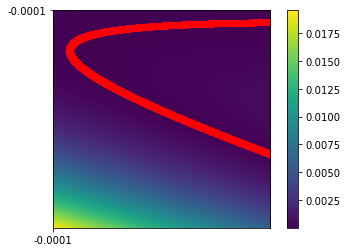

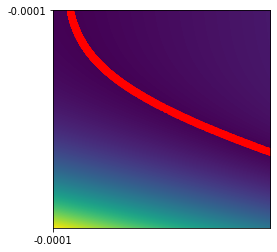

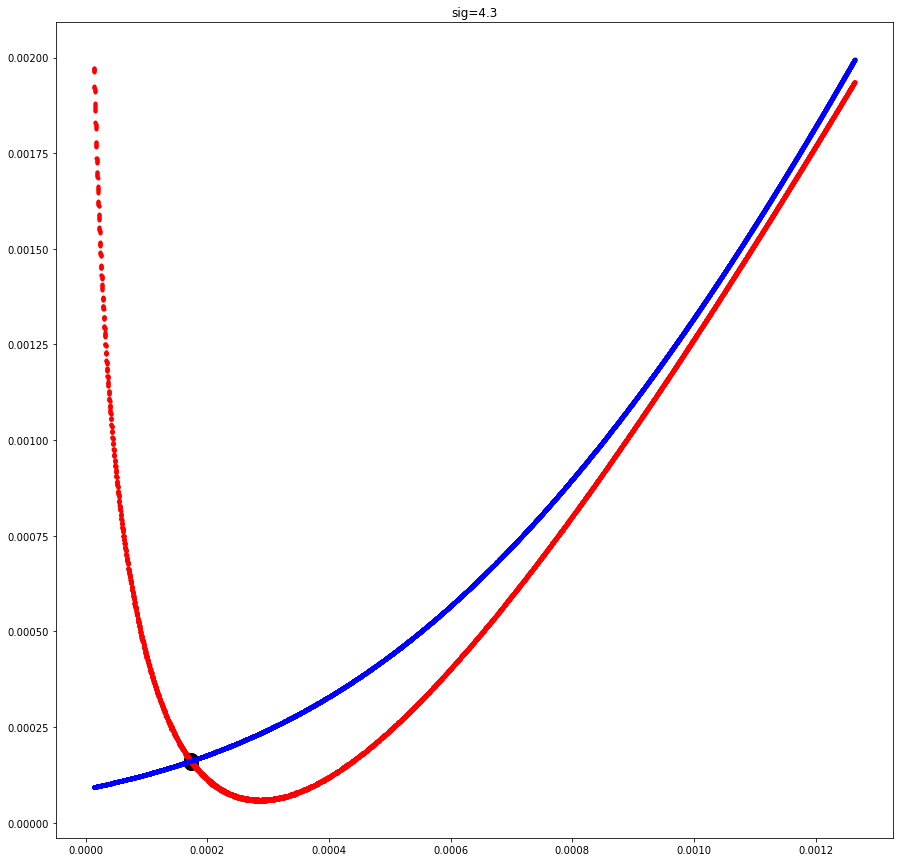

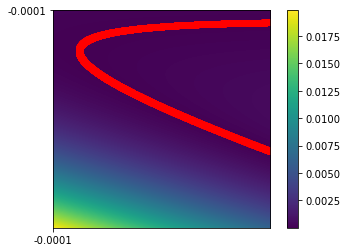

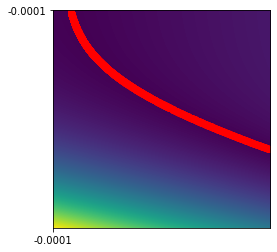

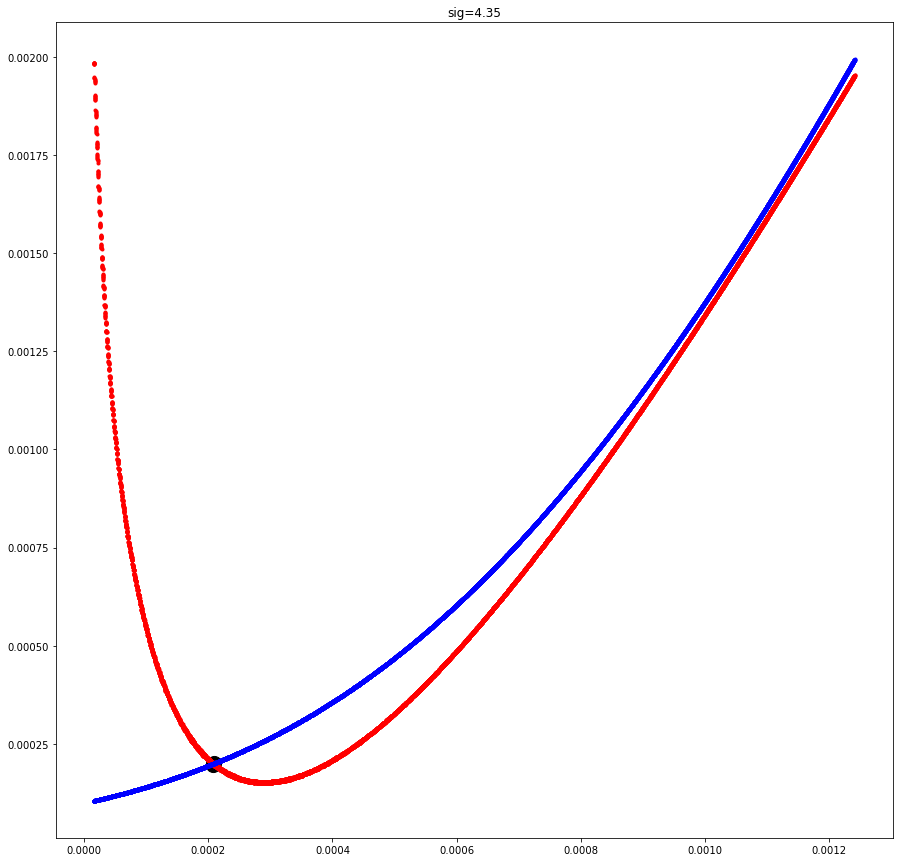

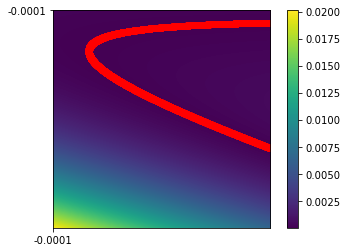

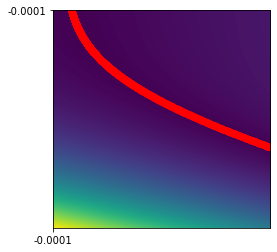

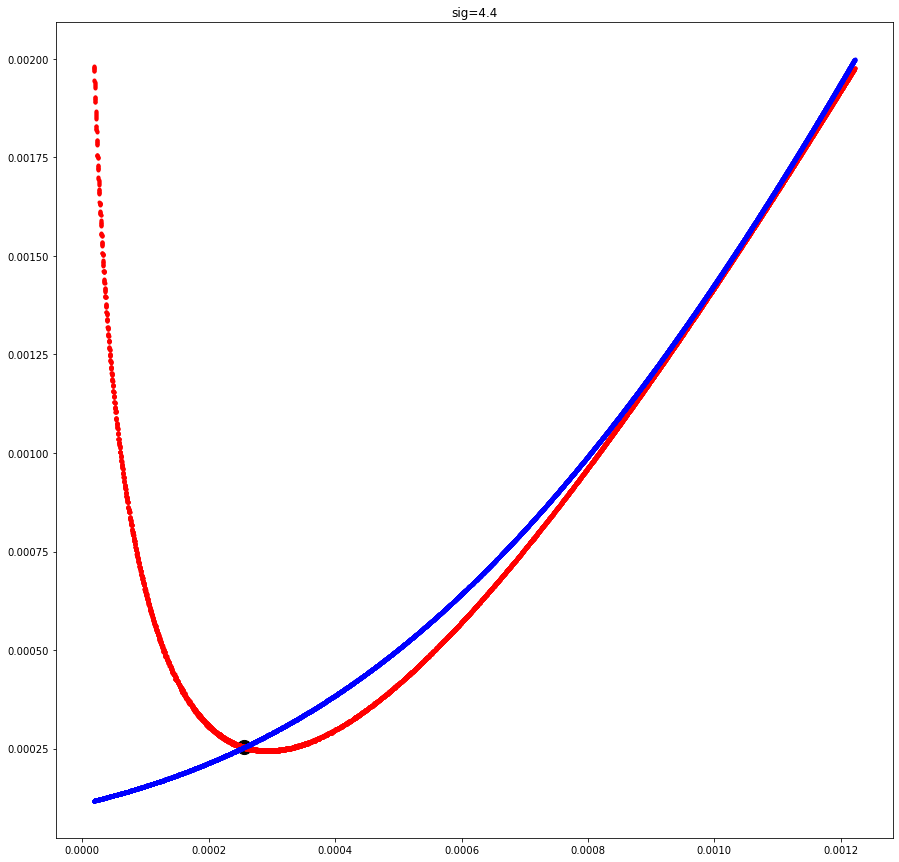

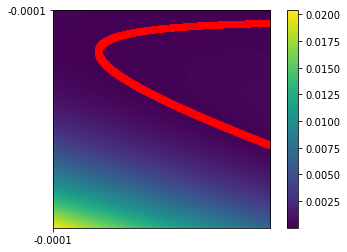

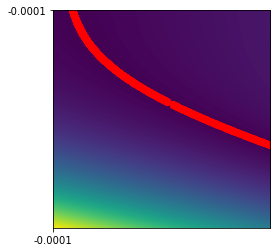

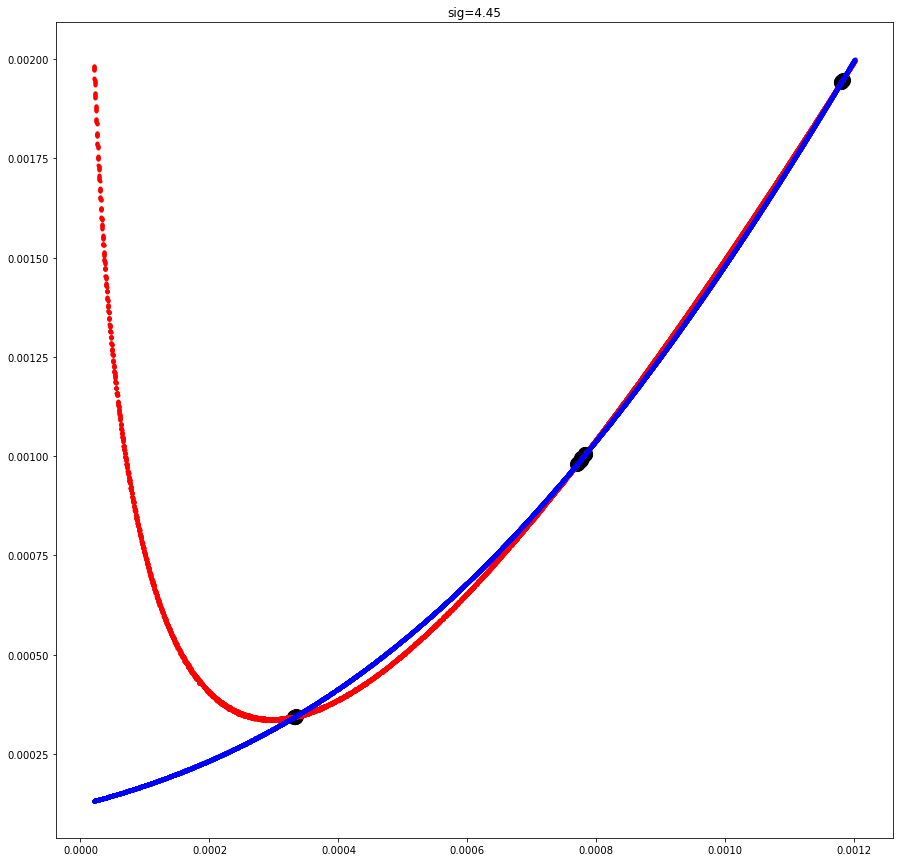

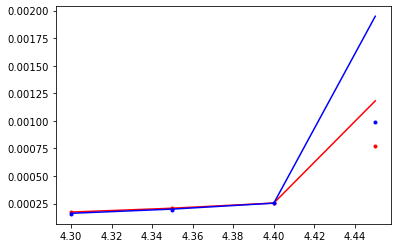

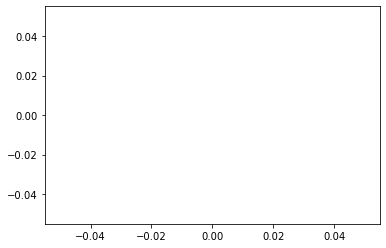

In [347]:
taue = 20; taui = 10
Ne=4000; Ni=1000;th = 20 ; taub = 1; taue=20; taui=10; Jee = 280/Ne*taue; Jei=-70/Ni*taue; Jie=500/Ne*taui; Jii=-100/Ni*taui;
Vli=6.5; Vle=7.6; Vr=14; the = th; thi = th; Nmax = 2
disp = 1; disp2=1

LEB = []; LIB = []; E0B=[]; E02B=[]; E1B=[]; I0B=[]; I02B=[];I1B=[]

LsigB = [4.3,4.35,4.4,4.45]#np.concatenate([np.arange(1.5,2.8,0.5),np.arange(2.8,4.5,0.5)])#0.1#,np.arange(4.415,4.417,0.0005),np.arange(4.417,4.486,0.01),np.arange(4.486,4.4875,0.0001),np.arange(4.9,6,0.1)])
beta = 1
epsilonI = 6e-7
epsilonE = 6e-7
epsilon2 = 1e-6
delta = 9e-7#6e-6
delta2 = 1e-7#delta
leng = 0.002
ini = -0.0001
du = 0.025
RE = np.arange(ini,leng,delta)
RI = np.arange(ini,leng,delta)
re = np.array([RE,]*math.ceil((leng-ini)/delta)).transpose()
ri = np.array([RI,]*math.ceil((leng-ini)/delta))
Ka = 600
LSeB = []
for sig in LsigB:
    print(sig)
    Se=0; Si = 0
    for u in np.arange(1e-200,Nmax,du):
            print(u)
            mue = Vle+Ne*Jee*re*taub+Ni*Jei*ri*taub - Ka*beta*re
            Se += du*np.exp(-u**2)/u*(np.exp((th-mue)*2*u/sig)-np.exp((Vr-mue)*2*u/sig))
            #LSe.append(np.min(Se))
            mui = Vli+Ne*Jie*re*taub+Ni*Jii*ri*taub 
            Si += du*np.exp(-u**2)/u*(np.exp((th-mui)*2*u/sig)-np.exp((Vr-mui)*2*u/sig))
        
    Ge = 1/(taue*Se)
    Gi = 1/(taui*Si)
    E = np.abs(re-Ge)
    I = np.abs(ri-Gi)
    idxe = np.nonzero(E<epsilonE)
    idxi = np.nonzero(I<epsilonI)

    if disp == 1:
        fig, ax = plt.subplots()
        pos = ax.imshow(E)
        ax.set_xticks([0,len(re)])
        ax.set_xticklabels([ini,leng])
        ax.set_yticks([0,len(re)])
        ax.set_yticklabels([ini,leng])
        fig.colorbar(pos,ax=ax)
        ax.scatter(idxe[1][:],idxe[0][:],color='r')

        fig, ax = plt.subplots()
        ax.imshow(I)
        ax.set_xticks([0,len(re)])
        ax.set_xticklabels([ini,leng])
        ax.set_yticks([0,len(re)])
        ax.set_yticklabels([ini,leng])
        ax.scatter(idxi[1][:],idxi[0][:],color='r')
    if disp2==1:        
        plt.figure(figsize=(15,15))
        fe = interpolate.interp1d(re[idxe], ri[idxe])
        Xre = np.arange(max(re[idxe][0],re[idxi][0]), min(re[idxe][-1],re[idxi][-1]), delta2)
        YriE = fe(Xre)
        plt.plot(Xre,YriE,'.r')
        
        fi = interpolate.interp1d(re[idxi], ri[idxi])
        YriI = fi(Xre)
        plt.plot(Xre,YriI,'.b')
        
        #L2 = np.nonzero(np.abs(YriE-YriI)<epsilon2)
        
        L = np.argwhere(np.diff(np.sign(YriE-YriI))).flatten()
        #LB = np.concatenate([L,L2[0]])
        plt.scatter(Xre[L],YriE[L],color='k',s=200)
        print(Xre[L],YriE[L])
        plt.title('sig='+str(sig))
        
        if len(Xre[L])==1:
            E02B.append(Xre[L][-1])
            I02B.append(YriE[L][-1])
            E1B.append(Xre[L][-1])
            I1B.append(YriE[L][-1])
            E0B.append(Xre[L][-1])
            I0B.append(YriE[L][-1])
            
        elif len(Xre[L])>=2:
            E02B.append(Xre[L][-1])
            E1B.append(Xre[L][int(len(Xre[L])/2)]) 
            I02B.append(YriE[L][-1])
            I1B.append(YriE[L][int(len(Xre[L])/2)])
            E0B.append(Xre[L][0])
            I0B.append(YriE[L][0])
            
        else:
            E02B.append(0)
            E1B.append(0)
            I02B.append(0)
            I1B.append(0)
            E0B.append(0)
            I0B.append(0)

plt.figure()
plt.plot(LsigB,E02B,'r')
plt.plot(LsigB,E1B,'.r')

plt.plot(LsigB,I02B,'b')
plt.plot(LsigB,I1B,'.b')


plt.figure()
plt.plot(LSeB)


1.5
[] []
2.0
[] []
2.5
[] []
2.8
[] []
2.9
[1.12e-06] [5.2e-07]
3.0
[1.86e-06] [2.26e-06]
3.1
[2.66e-06] [2.12e-06]
3.2
[4.02e-06] [2.14e-06]
3.3000000000000003
[6.05e-06] [4.1e-06]
3.4000000000000004
[8.99e-06] [6.5e-06]
3.5000000000000004
[1.281e-05] [8.84e-06]
3.6000000000000005
[1.84e-05] [1.28e-05]
3.7000000000000006
[2.59e-05] [1.86e-05]
3.8000000000000007
[3.511e-05] [2.757e-05]
3.900000000000001
[4.849e-05] [5.007e-05]
4.000000000000001
[6.574e-05 6.649e-05 6.699e-05] [5.462e-05 4.562e-05 5.459e-05]
4.100000000000001
[9.049e-05] [8.156e-05]
4.200000000000001
[0.00012312 0.00012349 0.00012439] [0.00011004 0.00010708 0.00011094]
4.300000000000001
[0.000173] [0.000164]
4.400000000000001
[0.0002555] [0.000254]


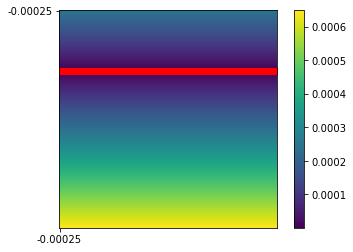

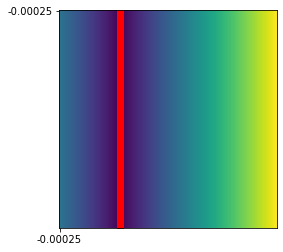

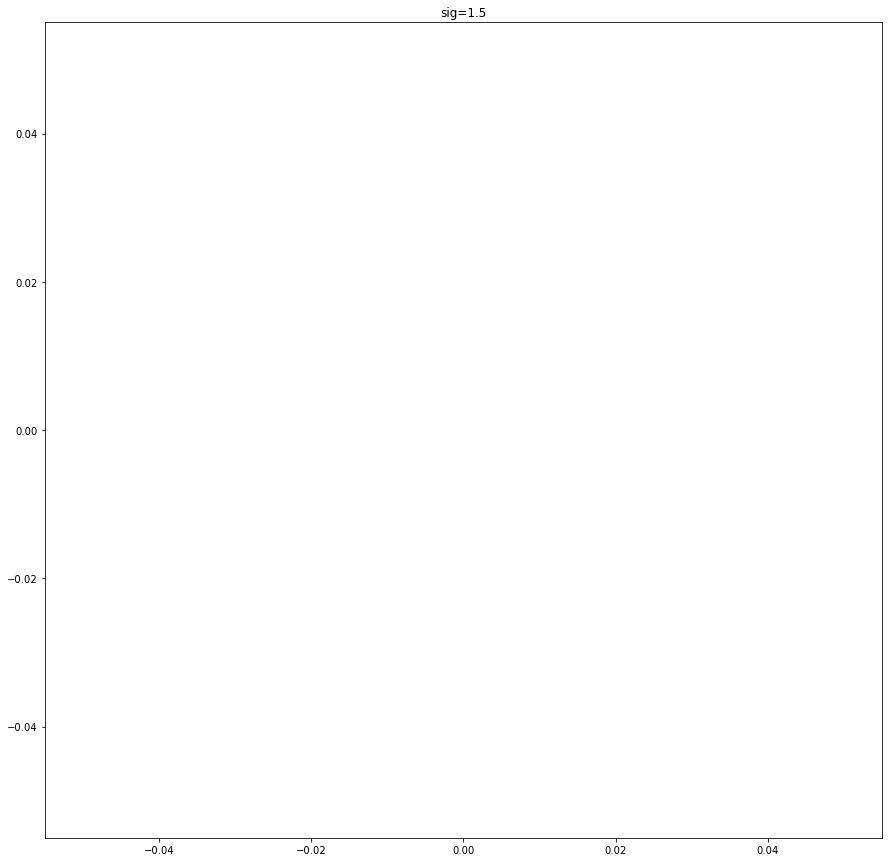

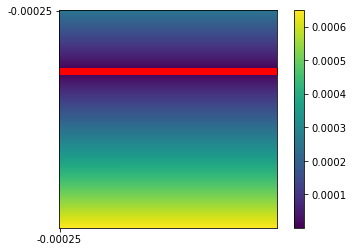

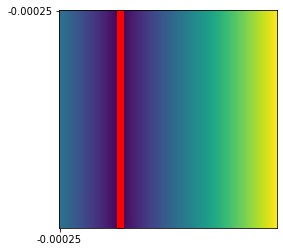

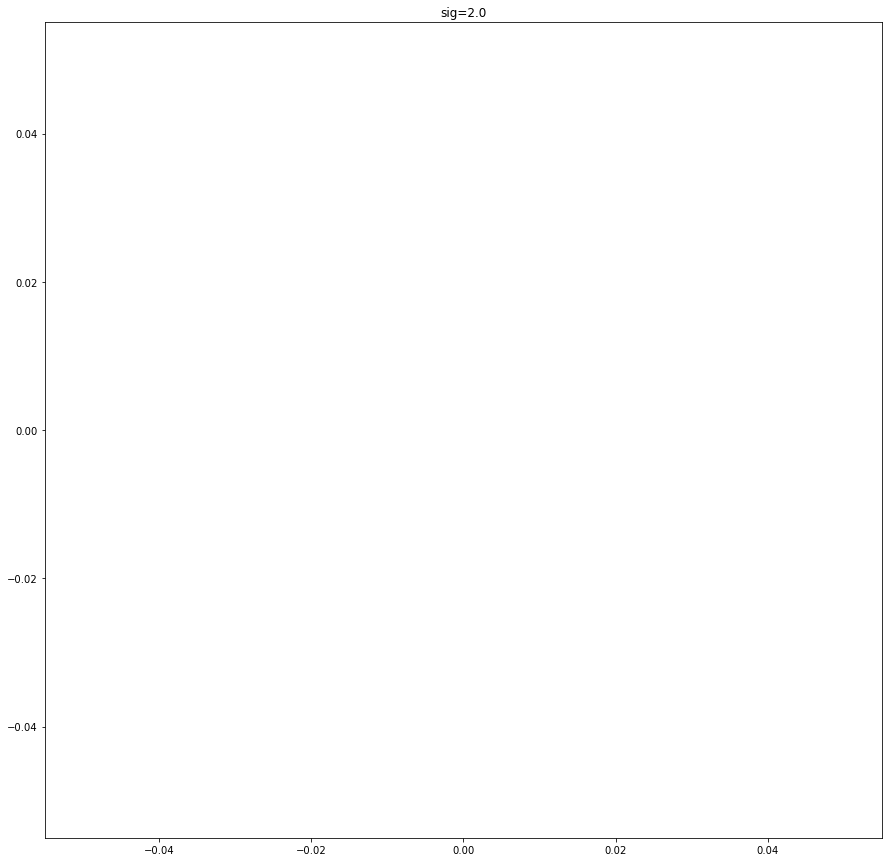

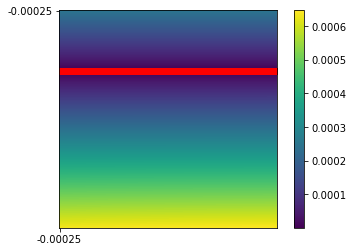

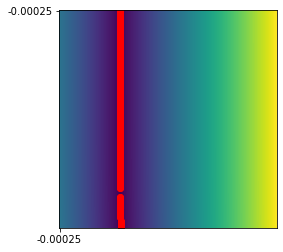

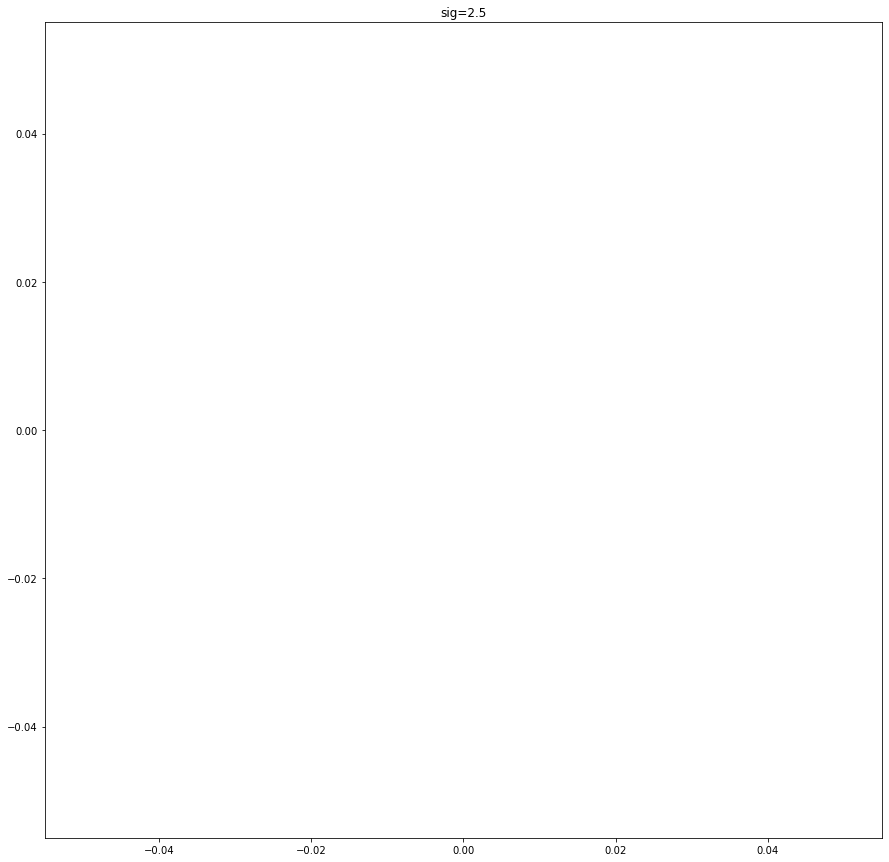

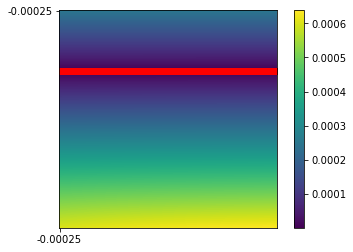

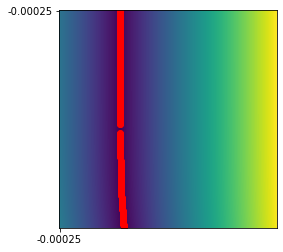

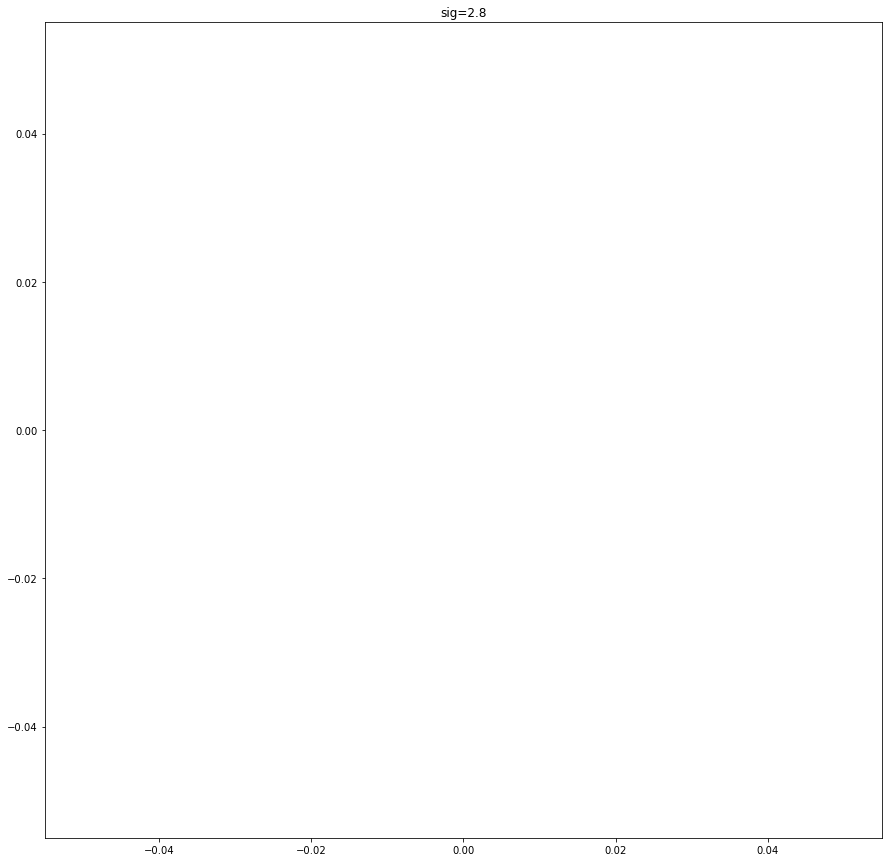

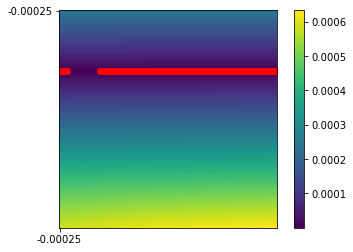

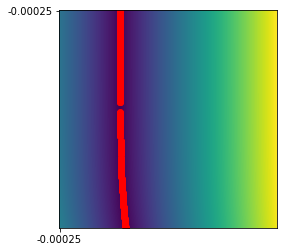

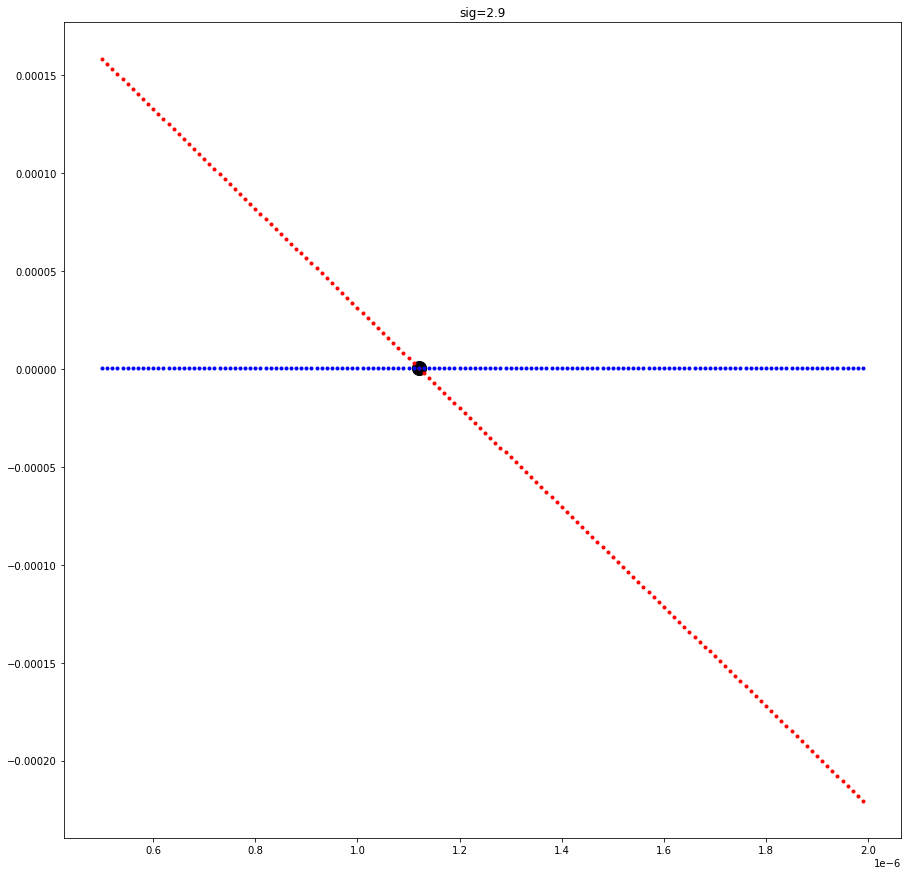

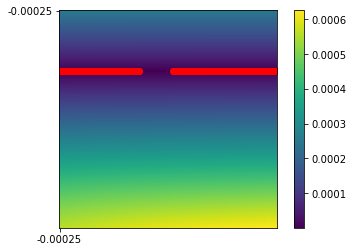

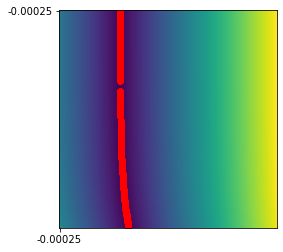

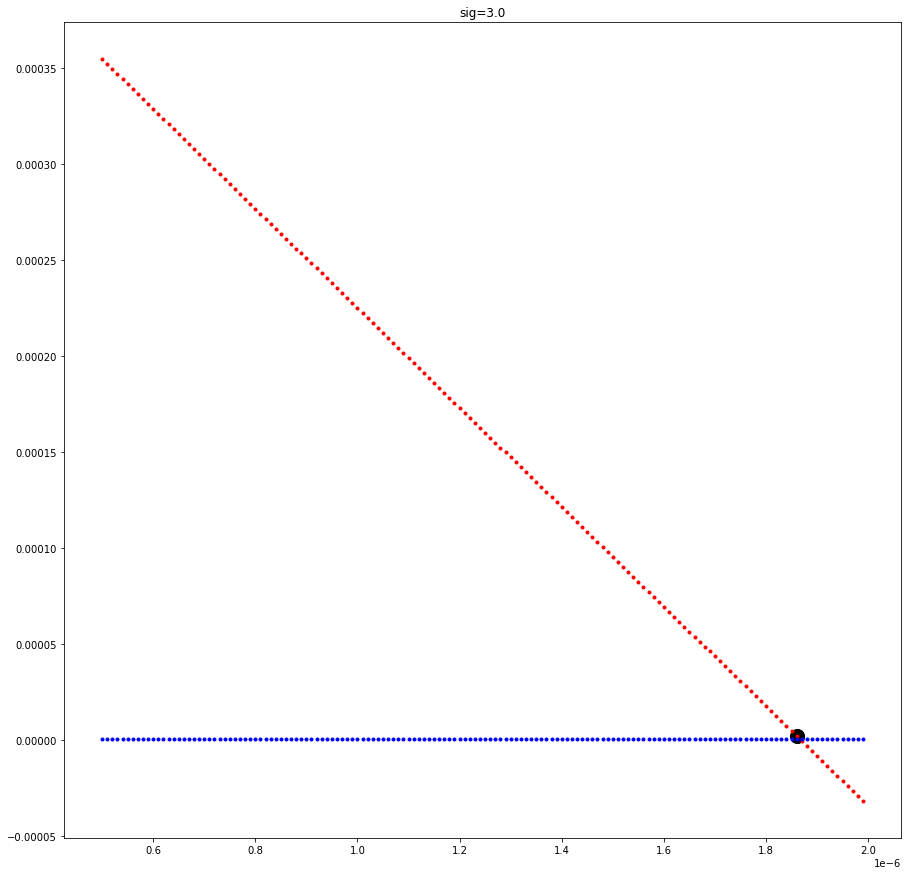

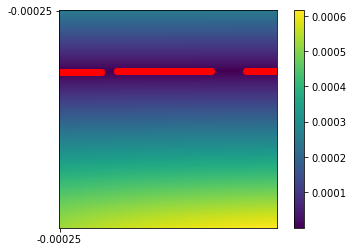

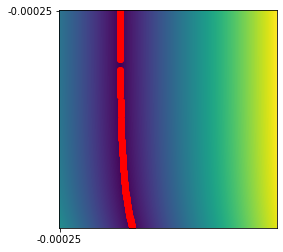

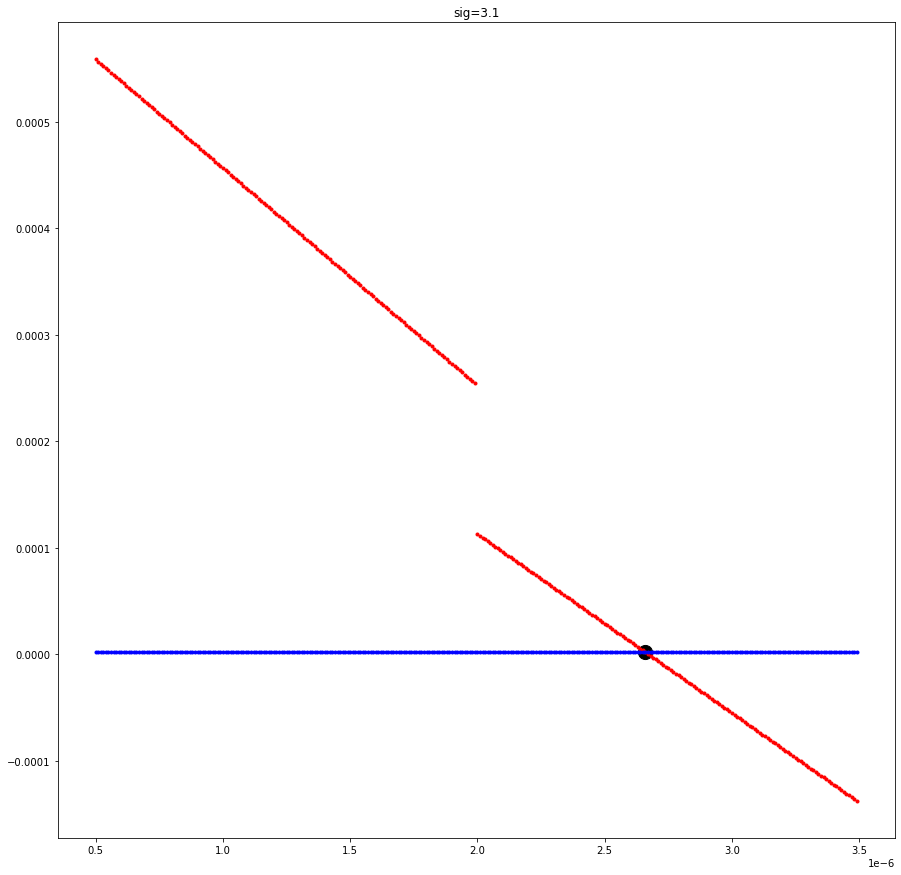

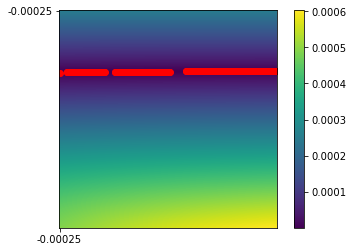

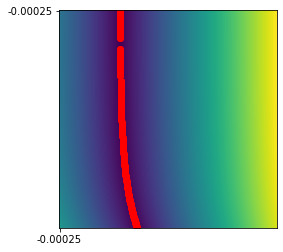

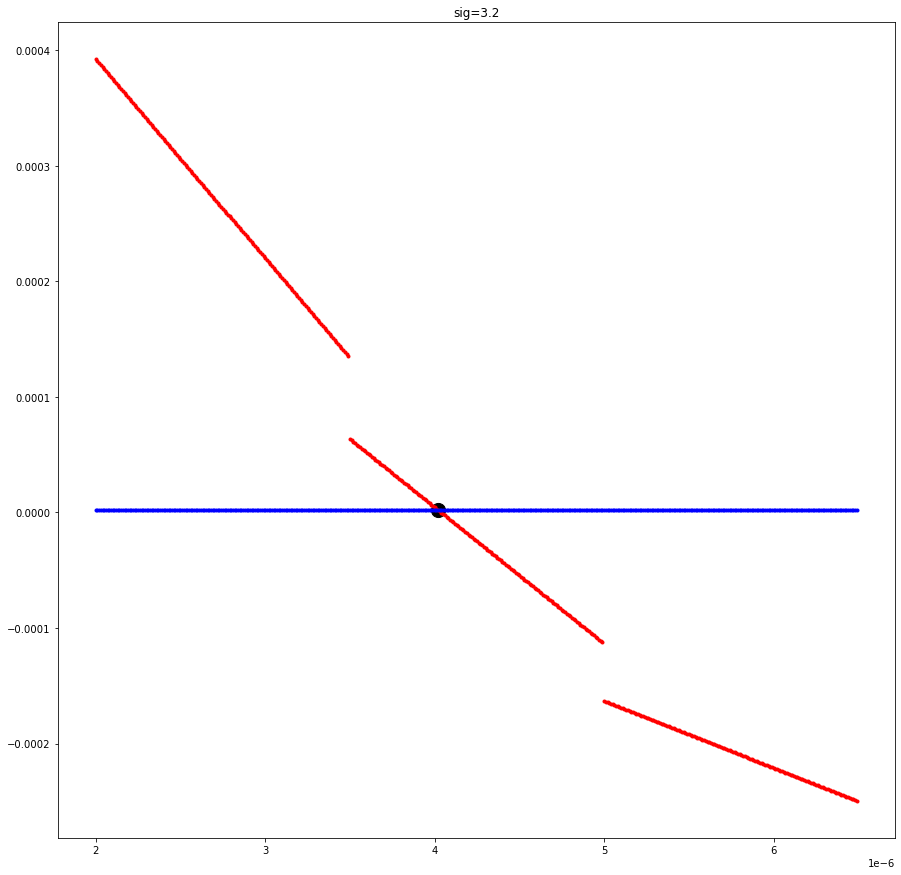

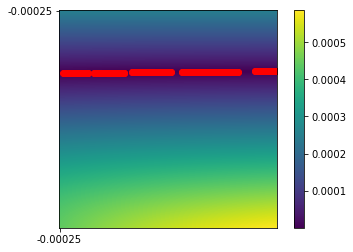

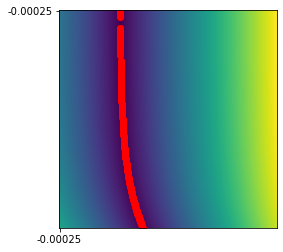

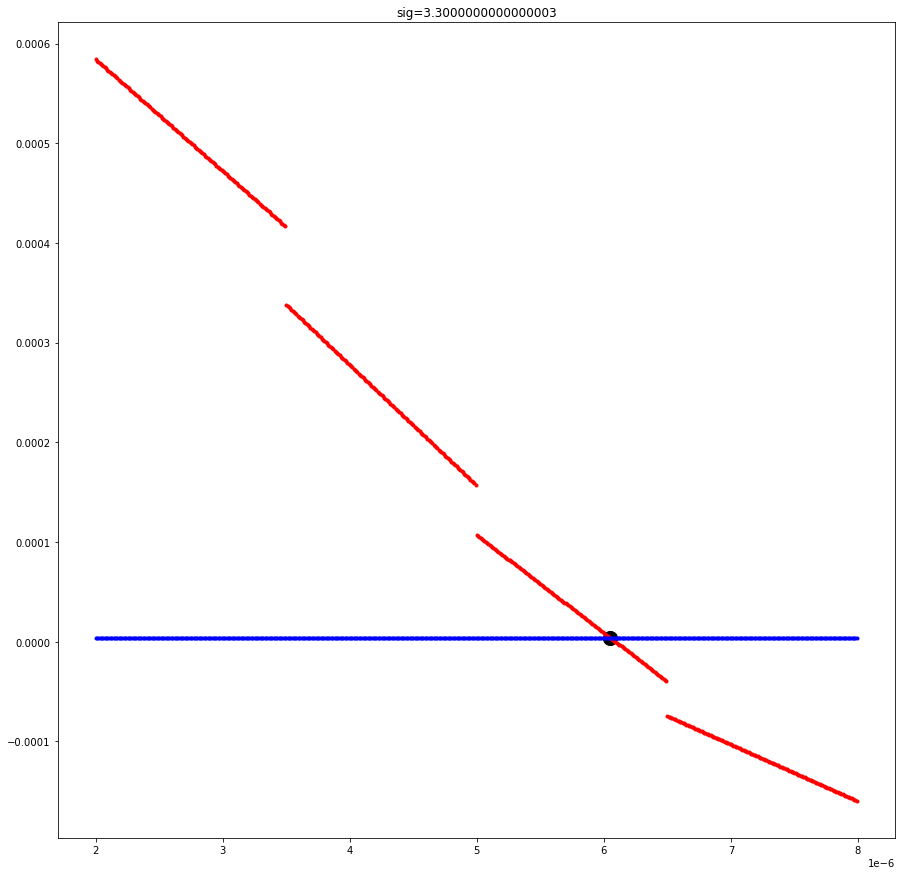

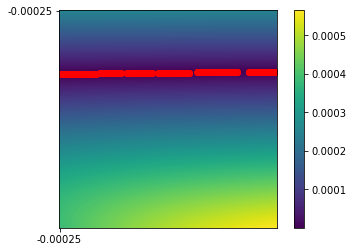

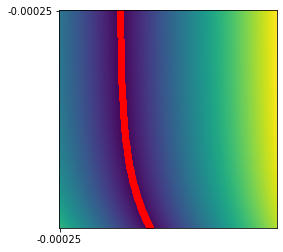

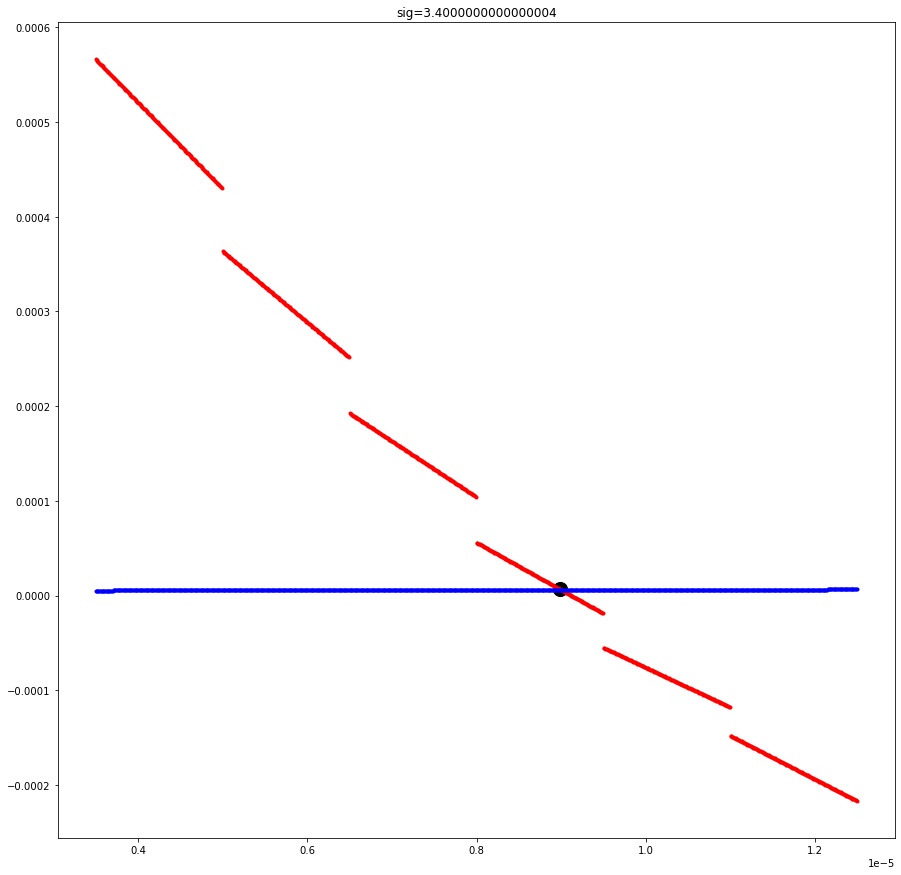

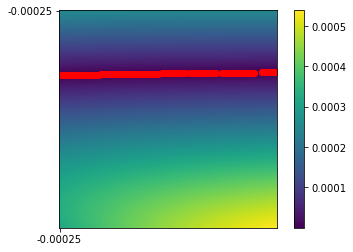

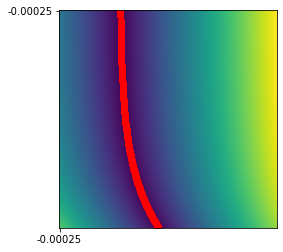

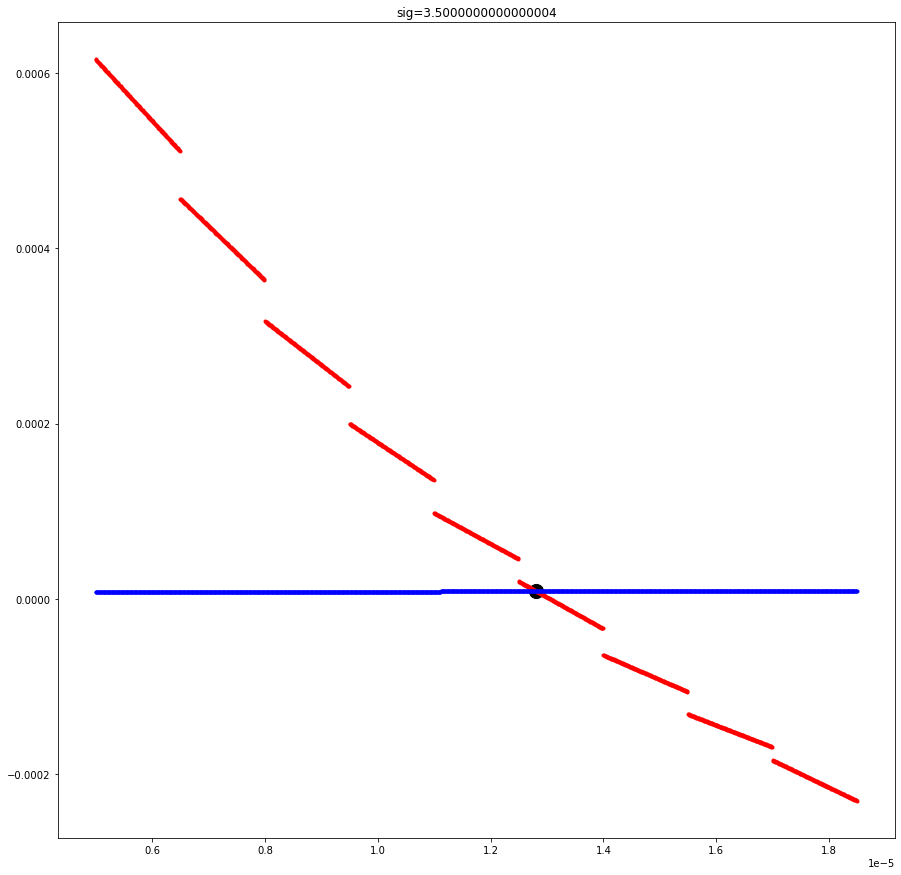

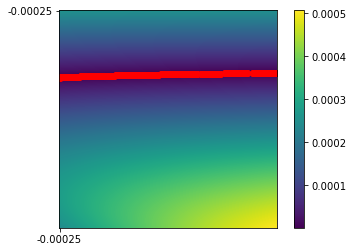

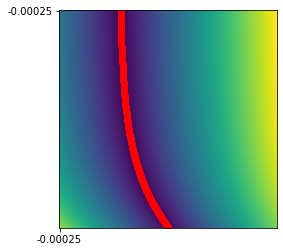

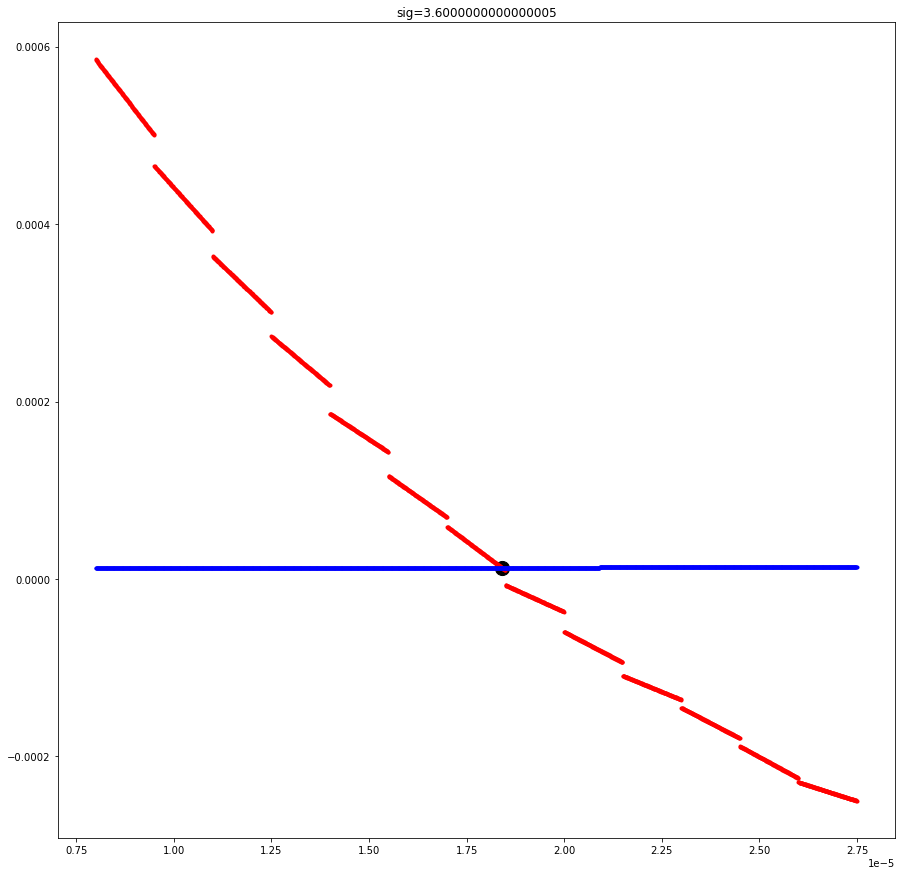

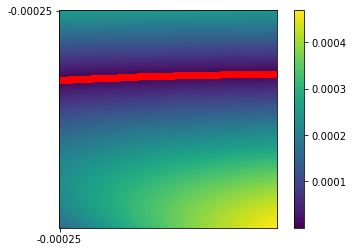

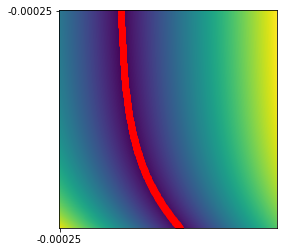

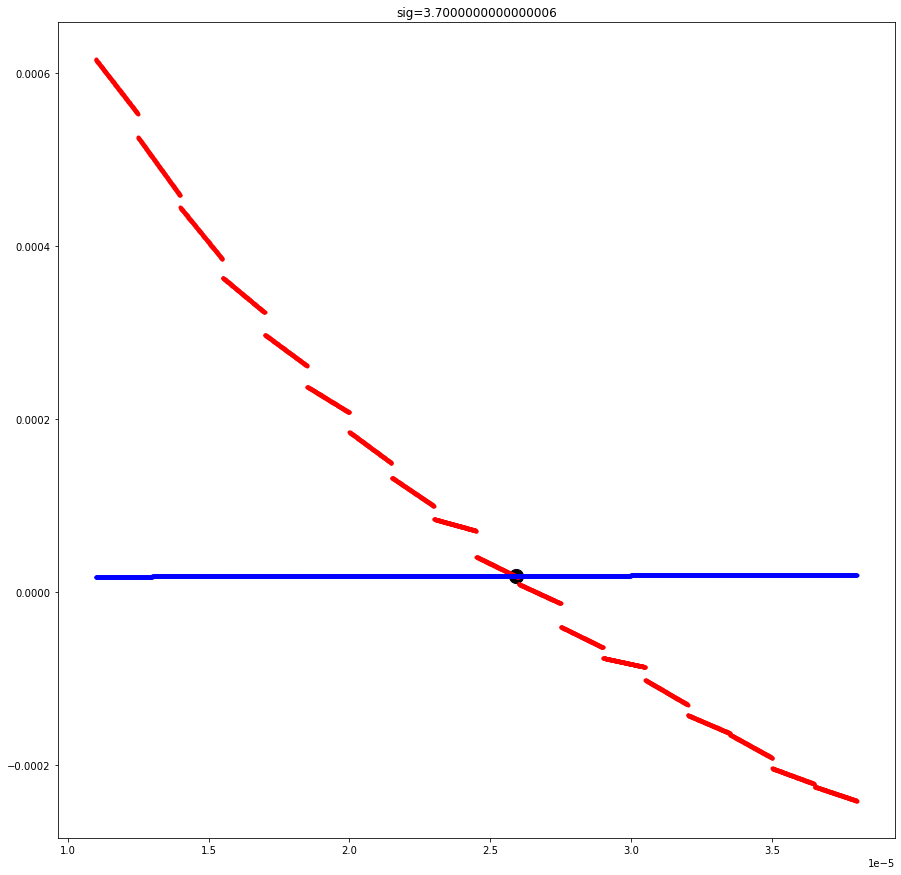

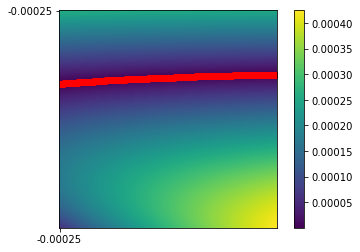

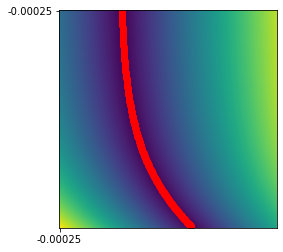

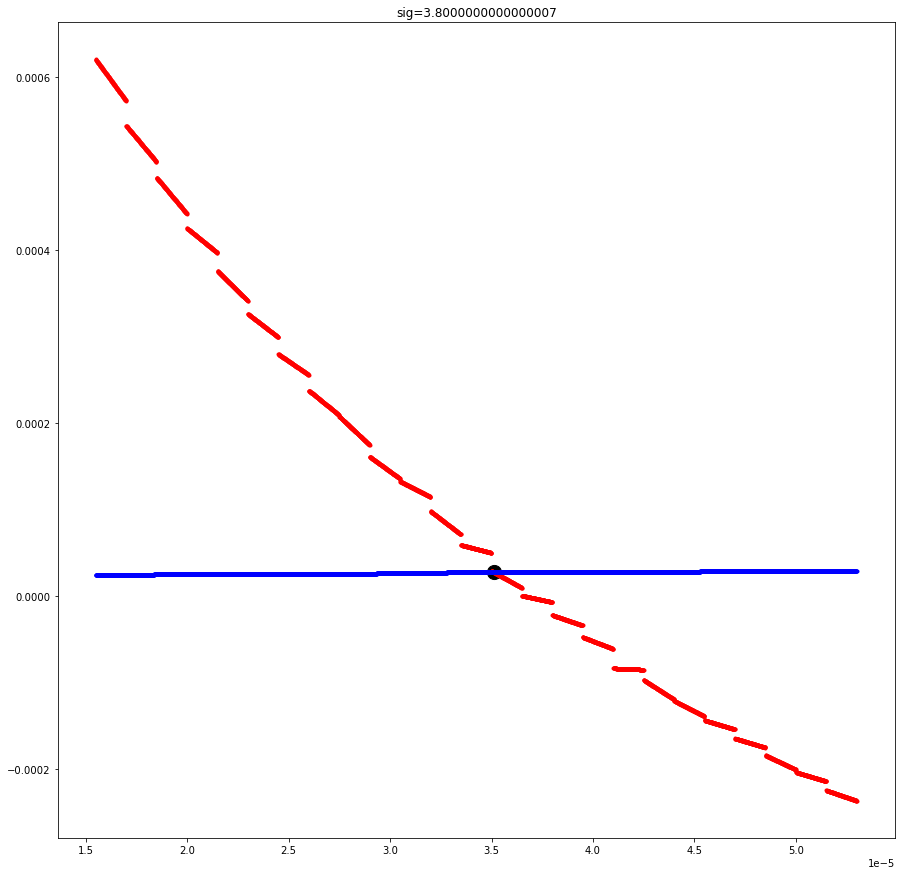

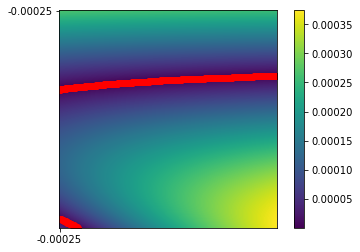

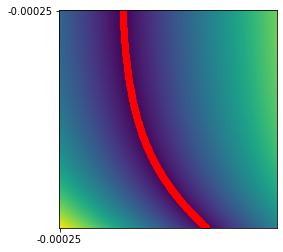

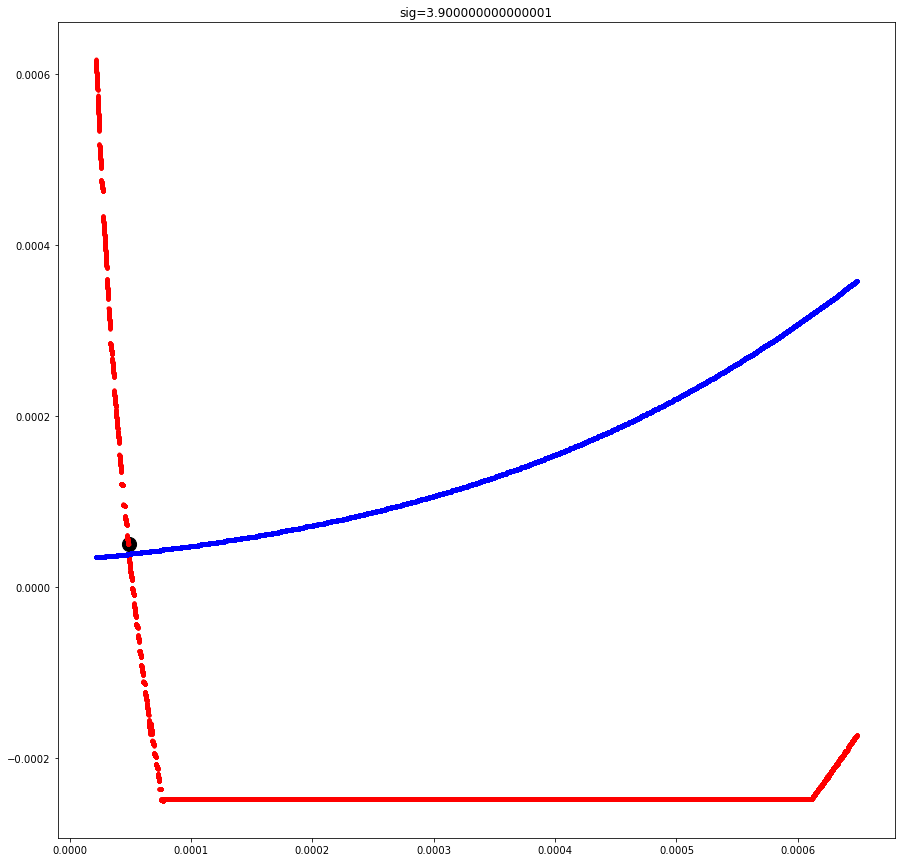

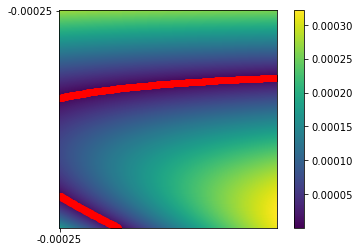

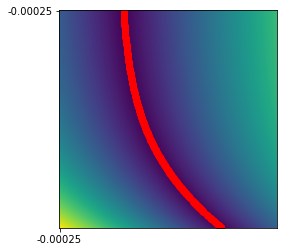

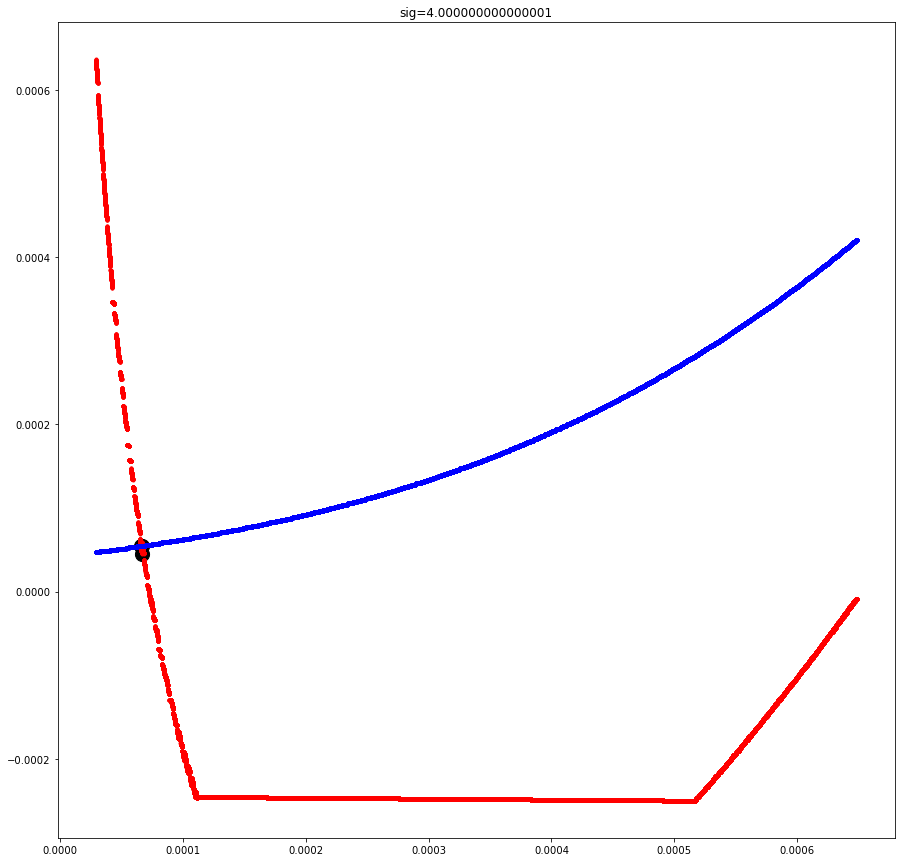

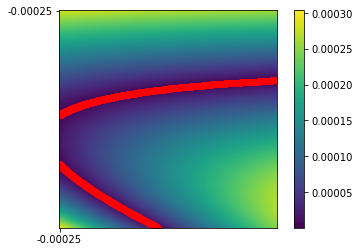

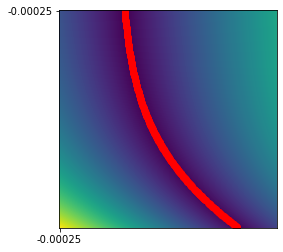

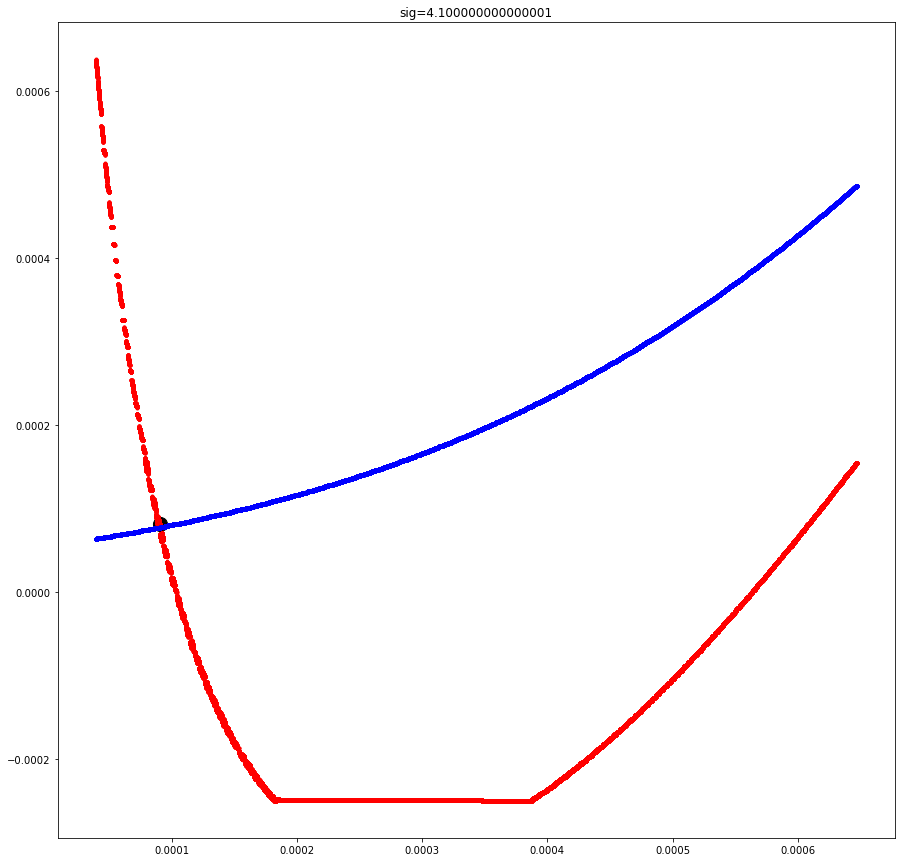

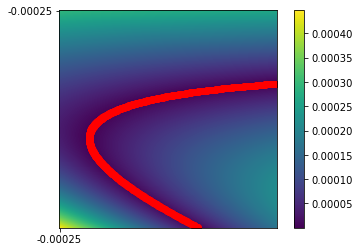

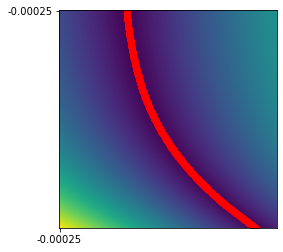

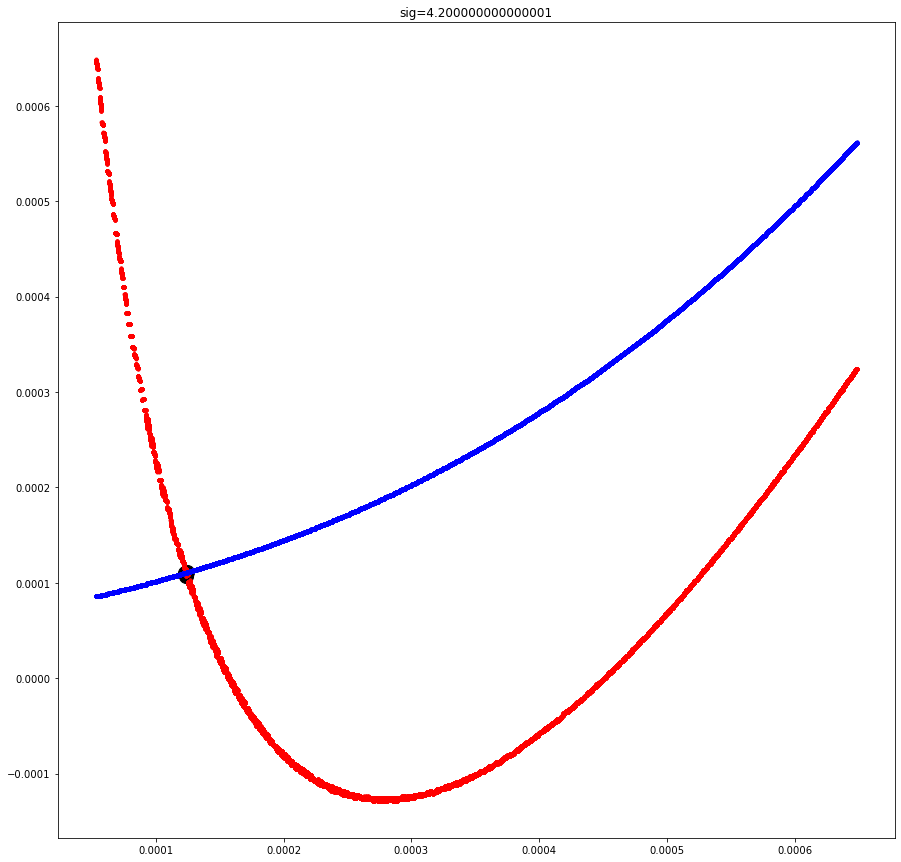

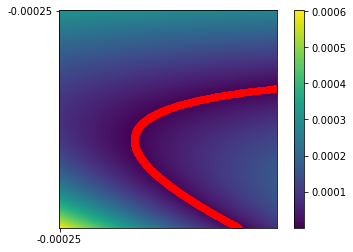

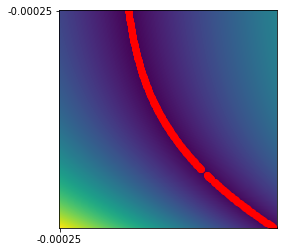

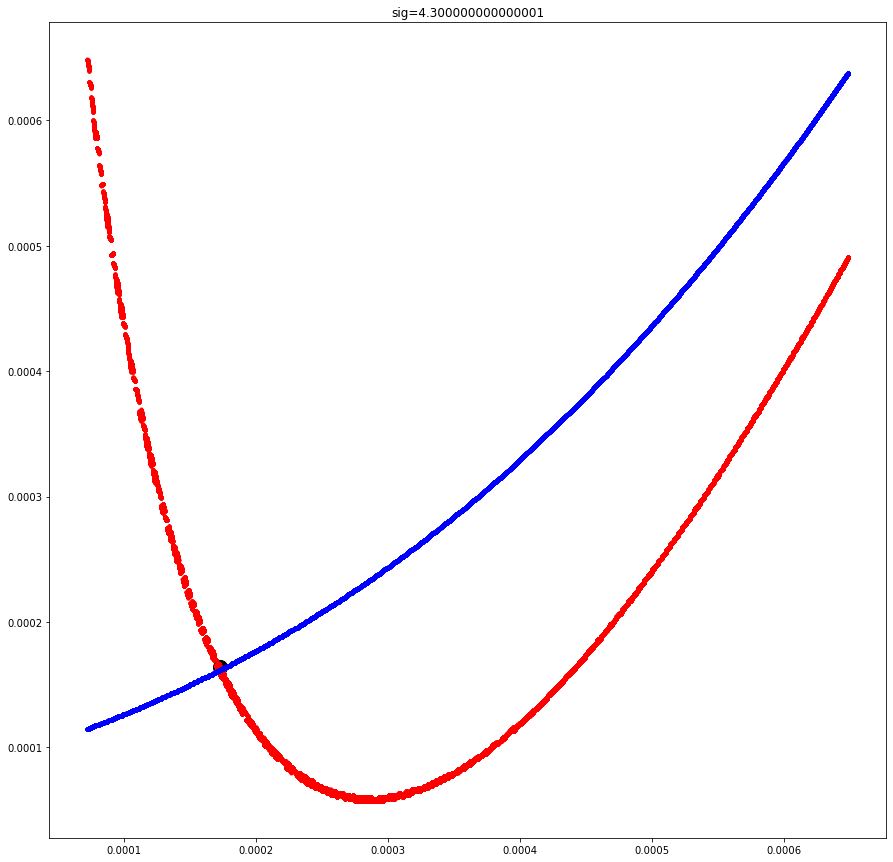

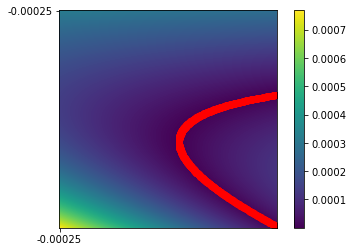

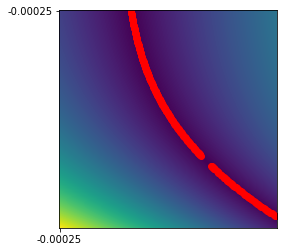

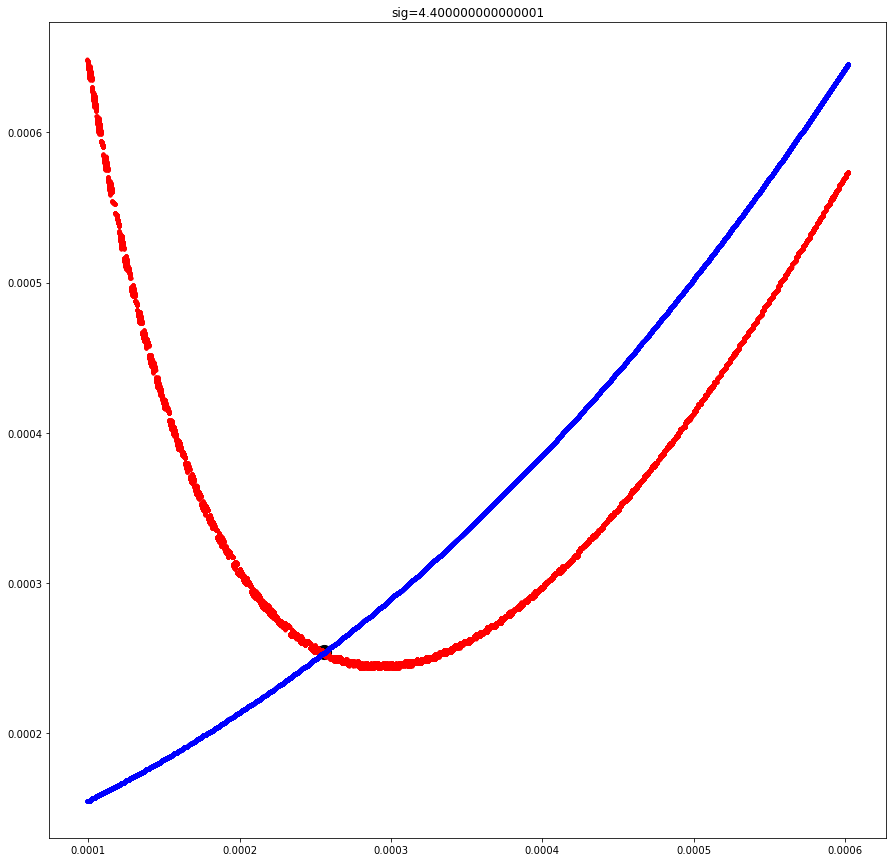

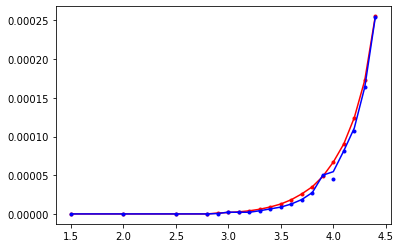

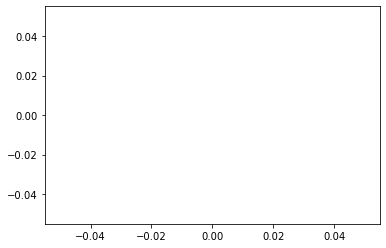

In [393]:
taue = 20; taui = 10
Ne=4000; Ni=1000;th = 20 ; taub = 1; taue=20; taui=10; Jee = 280/Ne*taue; Jei=-70/Ni*taue; Jie=500/Ne*taui; Jii=-100/Ni*taui;
Vli=6.5; Vle=7.6; Vr=14; the = th; thi = th; Nmax = 2
disp = 1; disp2=1

LEb = []; LIb = []; E0b=[]; E02b=[]; E1b=[]; I0b=[]; I02b=[];I1b=[]

Lsigb = np.concatenate([np.arange(1.5,2.8,0.5),np.arange(2.8,4.5,0.1)])#0.1#,np.arange(4.415,4.417,0.0005),np.arange(4.417,4.486,0.01),np.arange(4.486,4.4875,0.0001),np.arange(4.9,6,0.1)])
beta = 1
epsilonI = 6e-7
epsilonE = 6e-7
epsilon2 = 1e-6
delta = 15e-7#6e-6
delta2 = 1e-8#delta
leng = 0.00065
ini = -0.00025
du = 0.025
RE = np.arange(ini,leng,delta)
RI = np.arange(ini,leng,delta)
re = np.array([RE,]*math.ceil((leng-ini)/delta)).transpose()
ri = np.array([RI,]*math.ceil((leng-ini)/delta))
Ka = 600
LSeb = []
for sig in Lsigb:
    print(sig)
    Se=0; Si = 0
    for u in np.arange(1e-200,Nmax,du):
            #print(u)
            mue = Vle+Ne*Jee*re*taub+Ni*Jei*ri*taub - Ka*beta*re
            Se += du*np.exp(-u**2)/u*(np.exp((th-mue)*2*u/sig)-np.exp((Vr-mue)*2*u/sig))
            #LSe.append(np.min(Se))
            mui = Vli+Ne*Jie*re*taub+Ni*Jii*ri*taub 
            Si += du*np.exp(-u**2)/u*(np.exp((th-mui)*2*u/sig)-np.exp((Vr-mui)*2*u/sig))
        
    Ge = 1/(taue*Se)
    Gi = 1/(taui*Si)
    E = np.abs(re-Ge)
    I = np.abs(ri-Gi)
    idxe = np.nonzero(E<epsilonE)
    idxi = np.nonzero(I<epsilonI)

    if disp == 1:
        fig, ax = plt.subplots()
        pos = ax.imshow(E)
        ax.set_xticks([0,len(re)])
        ax.set_xticklabels([ini,leng])
        ax.set_yticks([0,len(re)])
        ax.set_yticklabels([ini,leng])
        fig.colorbar(pos,ax=ax)
        ax.scatter(idxe[1][:],idxe[0][:],color='r')

        fig, ax = plt.subplots()
        ax.imshow(I)
        ax.set_xticks([0,len(re)])
        ax.set_xticklabels([ini,leng])
        ax.set_yticks([0,len(re)])
        ax.set_yticklabels([ini,leng])
        ax.scatter(idxi[1][:],idxi[0][:],color='r')
    if disp2==1:        
        plt.figure(figsize=(15,15))
        fe = interpolate.interp1d(re[idxe], ri[idxe])
        Xre = np.arange(max(re[idxe][0],re[idxi][0]), min(re[idxe][-1],re[idxi][-1]), delta2)
        YriE = fe(Xre)
        plt.plot(Xre,YriE,'.r')
        
        fi = interpolate.interp1d(re[idxi], ri[idxi])
        YriI = fi(Xre)
        plt.plot(Xre,YriI,'.b')
        
        #L2 = np.nonzero(np.abs(YriE-YriI)<epsilon2)
        
        L = np.argwhere(np.diff(np.sign(YriE-YriI))).flatten()
        #LB = np.concatenate([L,L2[0]])
        plt.scatter(Xre[L],YriE[L],color='k',s=200)
        print(Xre[L],YriE[L])
        plt.title('sig='+str(sig))
        
        if len(Xre[L])==1:
            E02b.append(Xre[L][-1])
            I02b.append(YriE[L][-1])
            E1b.append(Xre[L][-1])
            I1b.append(YriE[L][-1])
            E0b.append(Xre[L][-1])
            I0b.append(YriE[L][-1])
            
        elif len(Xre[L])>=2:
            E02b.append(Xre[L][-1])
            E1b.append(Xre[L][int(len(Xre[L])/2)]) 
            I02b.append(YriE[L][-1])
            I1b.append(YriE[L][int(len(Xre[L])/2)])
            E0b.append(Xre[L][0])
            I0b.append(YriE[L][0])
            
        else:
            E02b.append(0)
            E1b.append(0)
            I02b.append(0)
            I1b.append(0)
            E0b.append(0)
            I0b.append(0)

plt.figure()
plt.plot(Lsigb,E02b,'r')
plt.plot(Lsigb,E1b,'.r')

plt.plot(Lsigb,I02b,'b')
plt.plot(Lsigb,I1b,'.b')


plt.figure()
plt.plot(LSeb)


1.5
[] []
2.0
[-2.03830008e-16] [0.000305]
2.5
[-2.03830008e-16] [0.00133]
2.8
[-2.03830008e-16] [0.001925]
2.9
[-2.03830008e-16] [0.002135]
3.0
[-2.03830008e-16] [0.002335]
3.1
[-2.03830008e-16] [0.002535]
3.2
[-2.03830008e-16] [0.002745]
3.3000000000000003
[-2.03830008e-16] [0.002965]
3.4000000000000004
[6.e-06] [0.000268]
3.5000000000000004
[1.2e-05] [6.9e-05]
3.6000000000000005
[1.8e-05] [2.6e-05]
3.7000000000000006
[2.4e-05] [9.1e-05]
3.8000000000000007
[3.6e-05] [3.9e-05]
3.900000000000001
[4.8e-05] [6.2e-05]
4.000000000000001
[6.6e-05] [6.9e-05]
4.100000000000001
[9.e-05] [8.5e-05]
4.415
[0.00027] [0.000275]
4.4155
[0.00027] [0.00028]
4.4159999999999995
[0.000276 0.00102  0.001032] [0.000279  0.0014925 0.0015225]
4.416499999999999
[0.000276 0.001032 0.00105 ] [0.000279  0.0015225 0.0015675]
4.417
[0.000276 0.000984 0.00102  0.00105  0.001074] [0.000279   0.00140767 0.001495   0.0015675  0.0016275 ]
4.427
[0.000288 0.000894 0.001122] [0.000295  0.001213  0.0017625]
4.436999999999

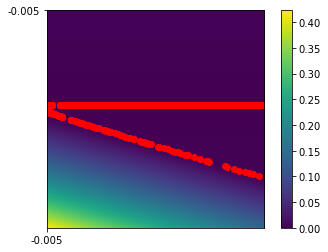

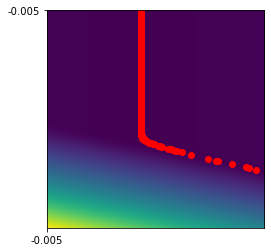

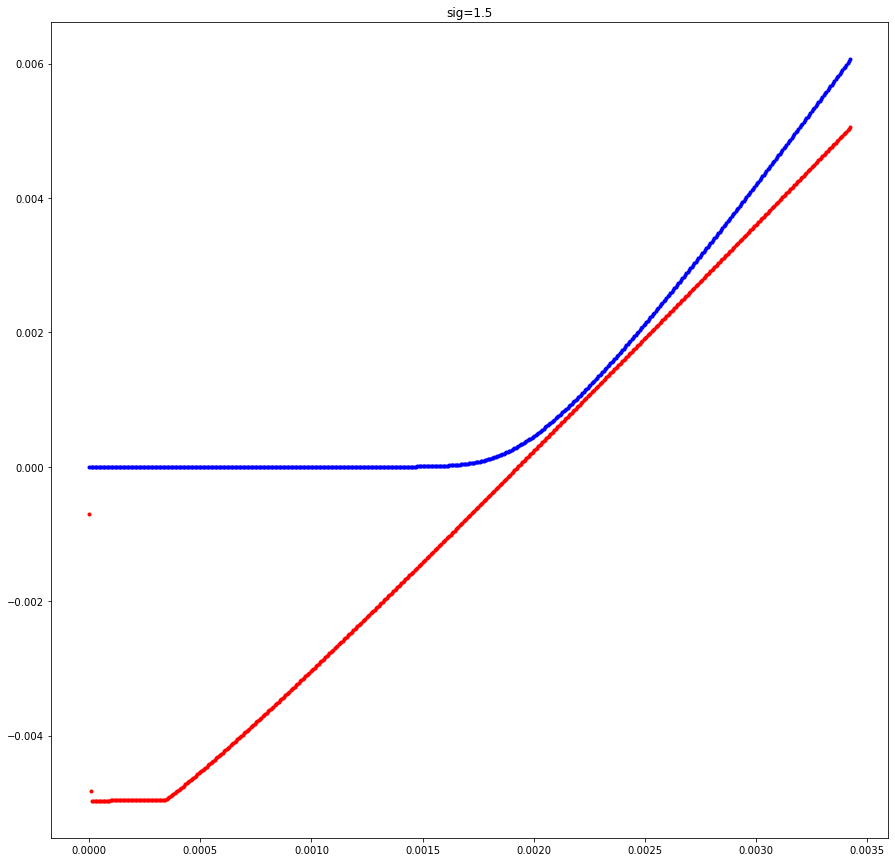

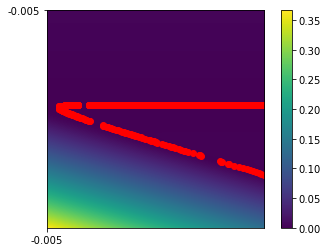

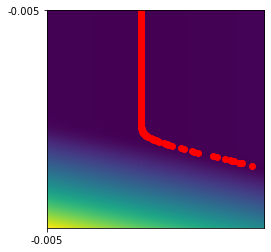

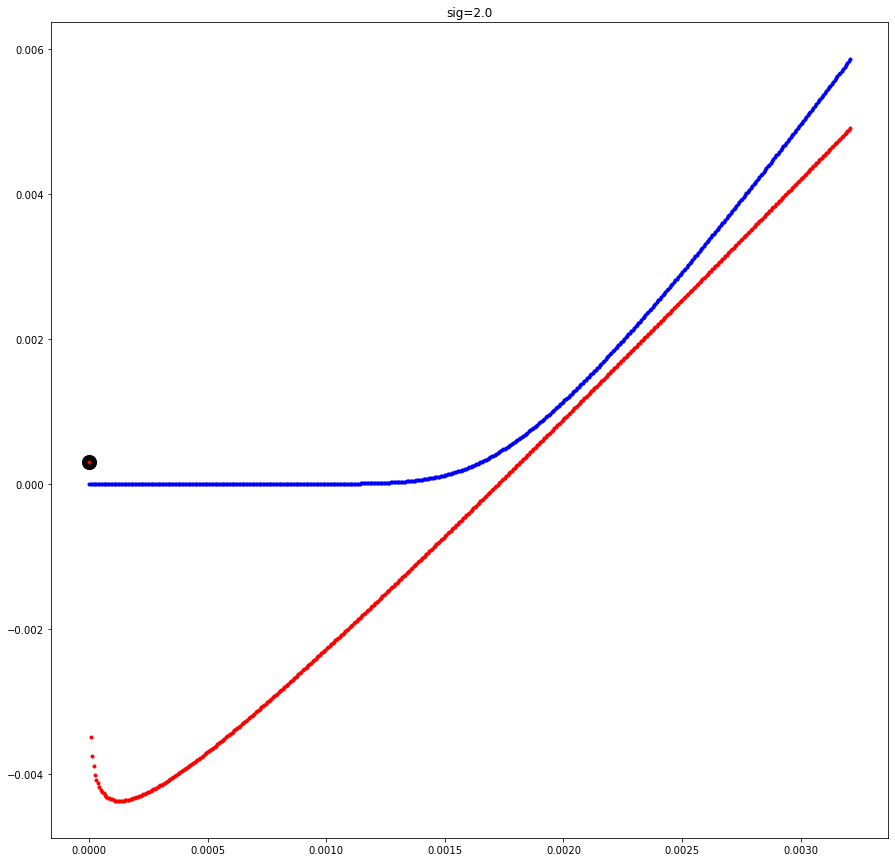

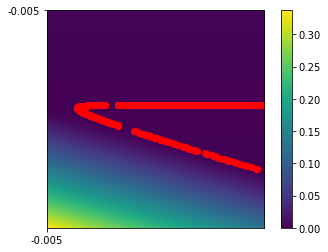

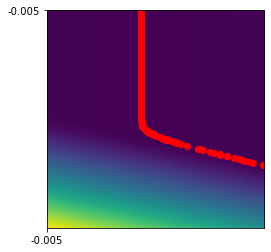

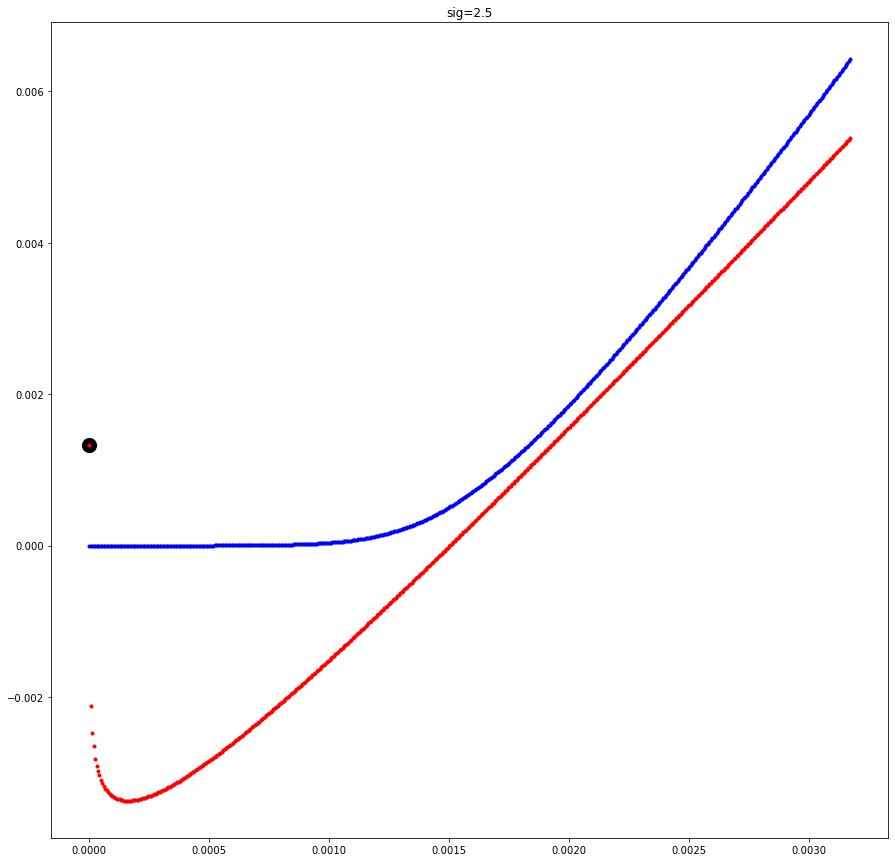

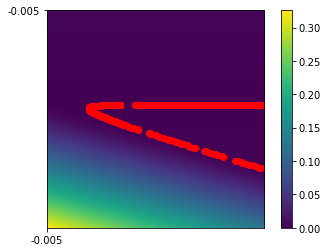

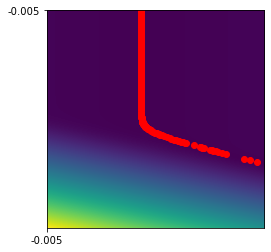

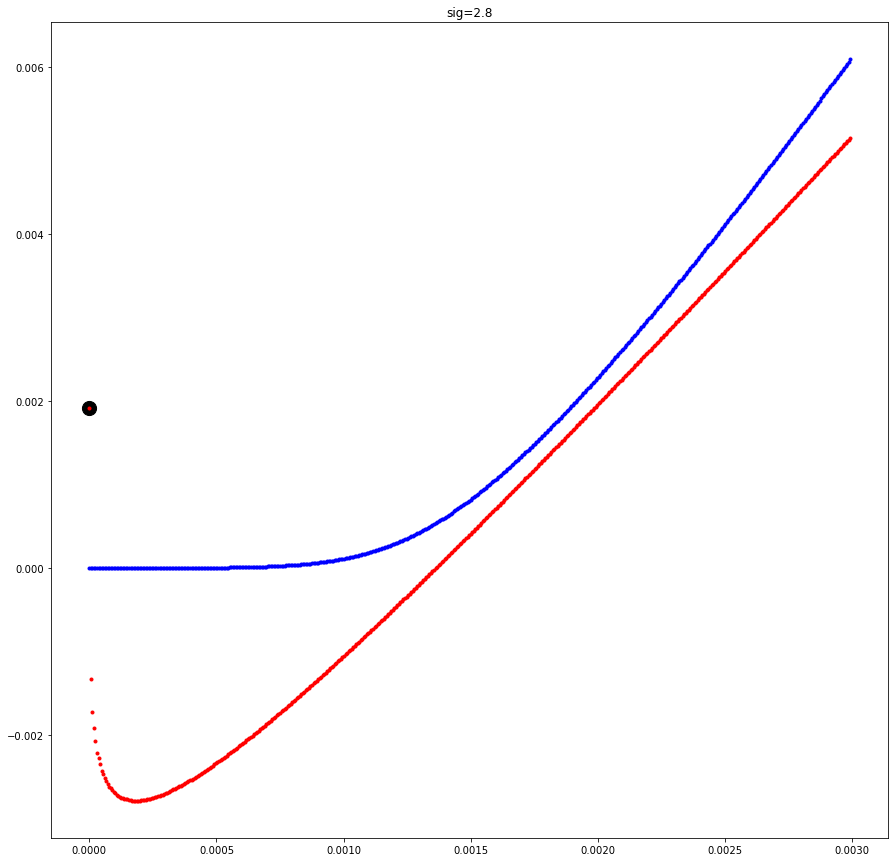

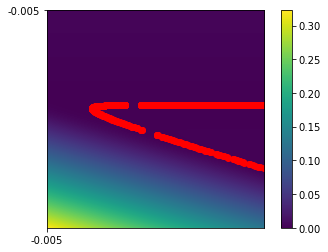

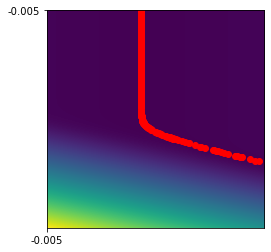

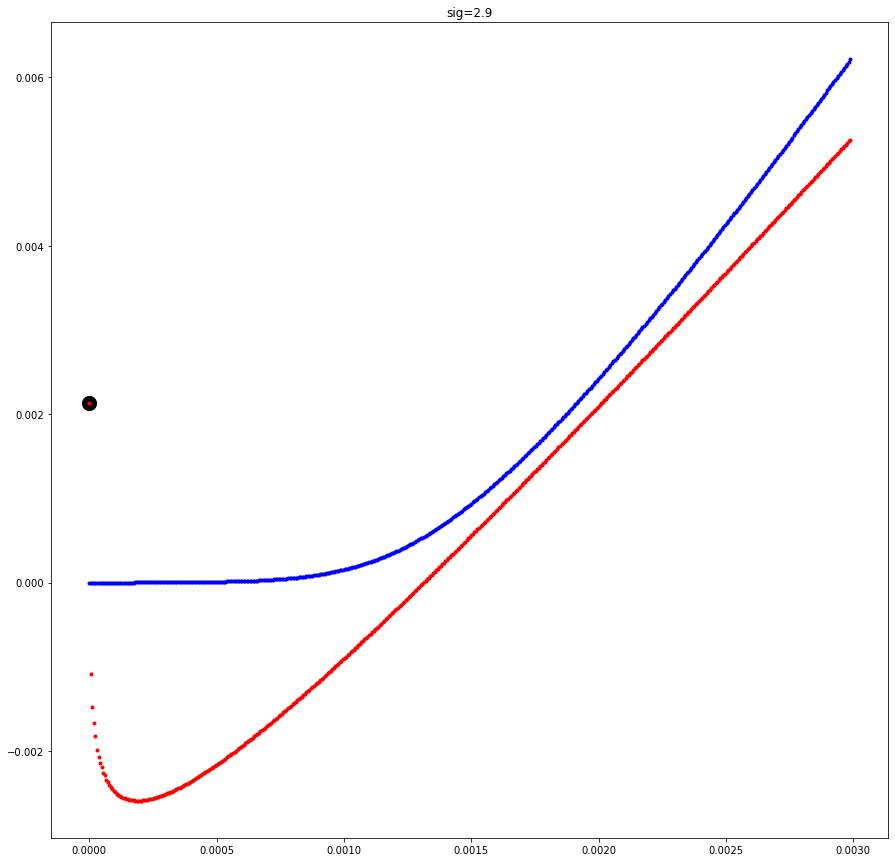

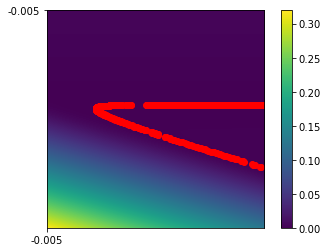

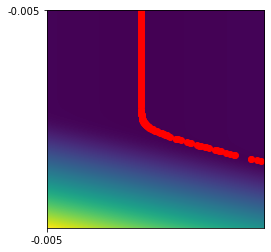

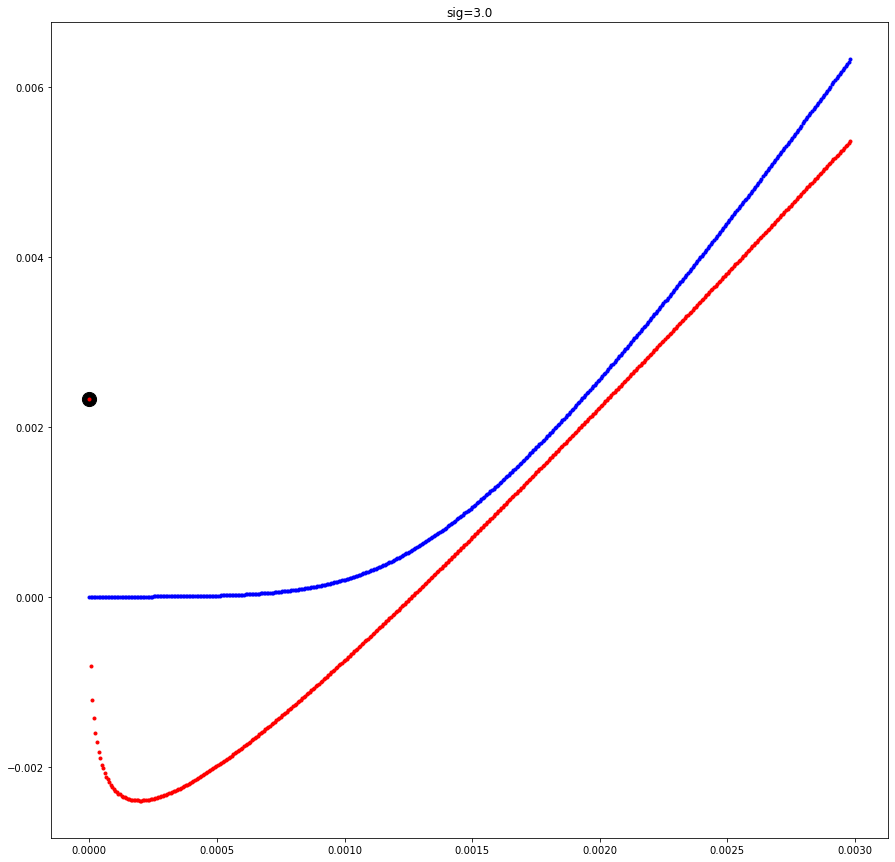

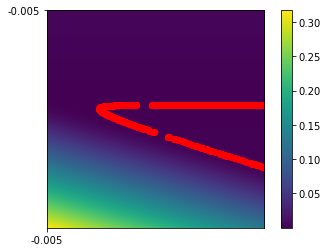

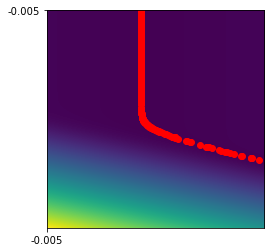

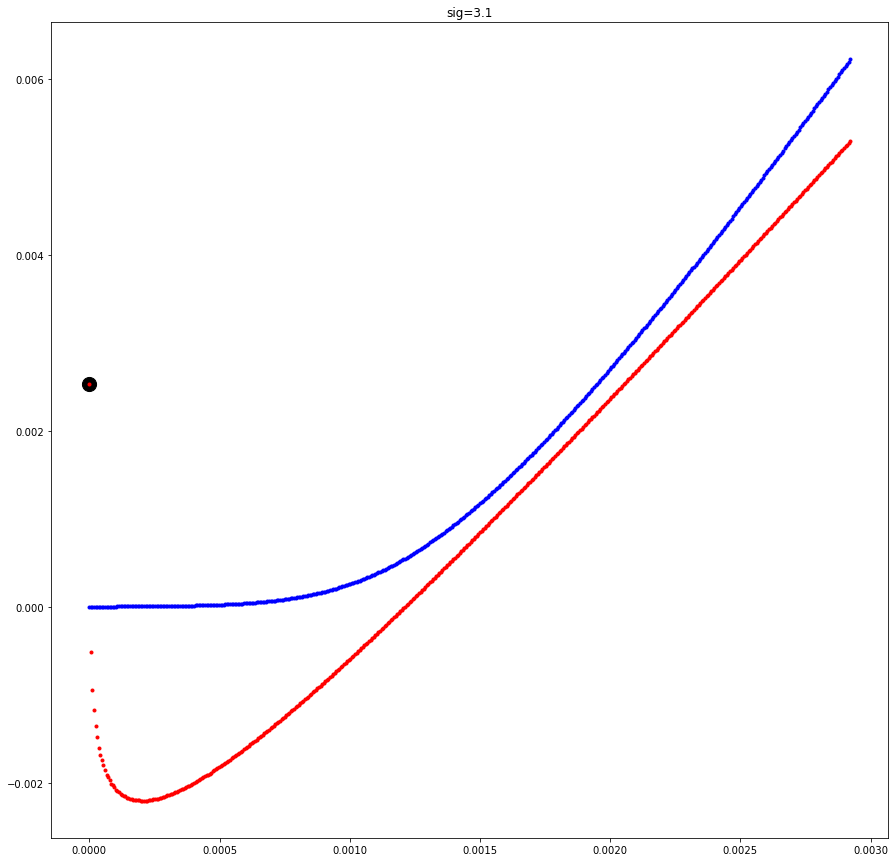

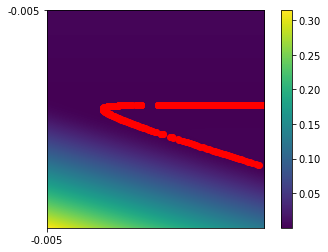

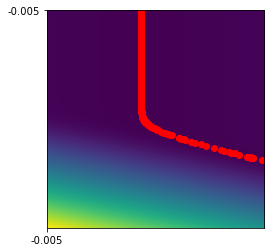

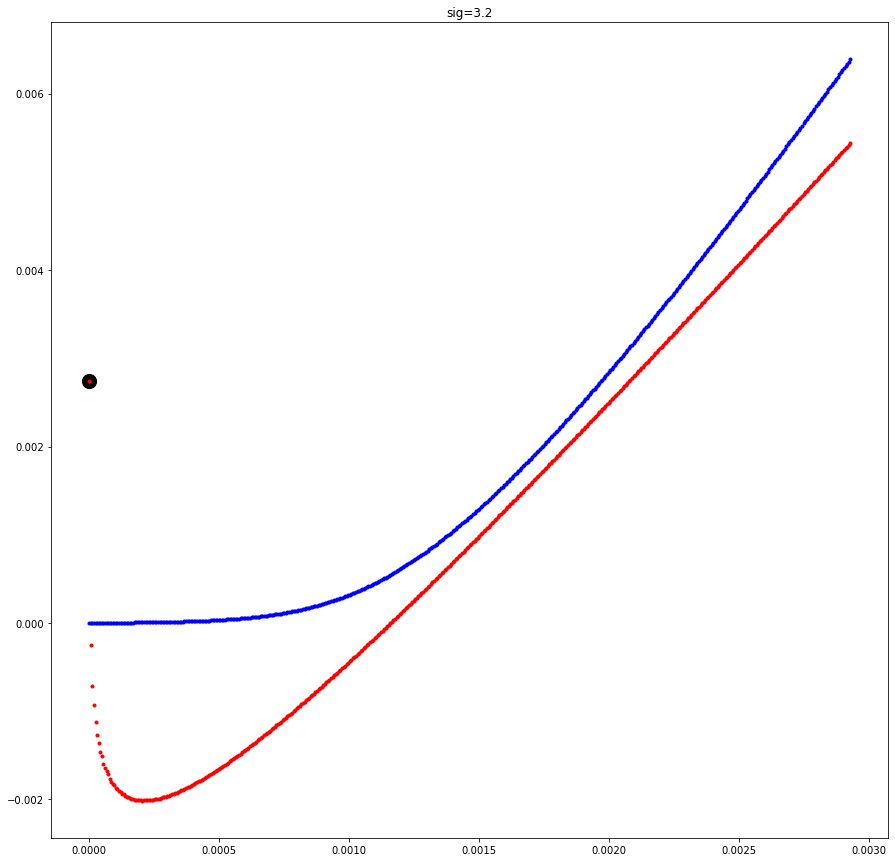

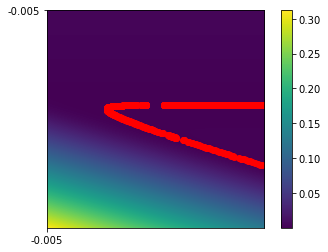

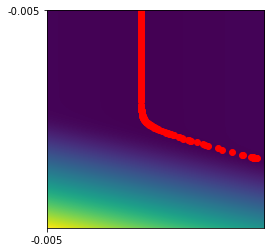

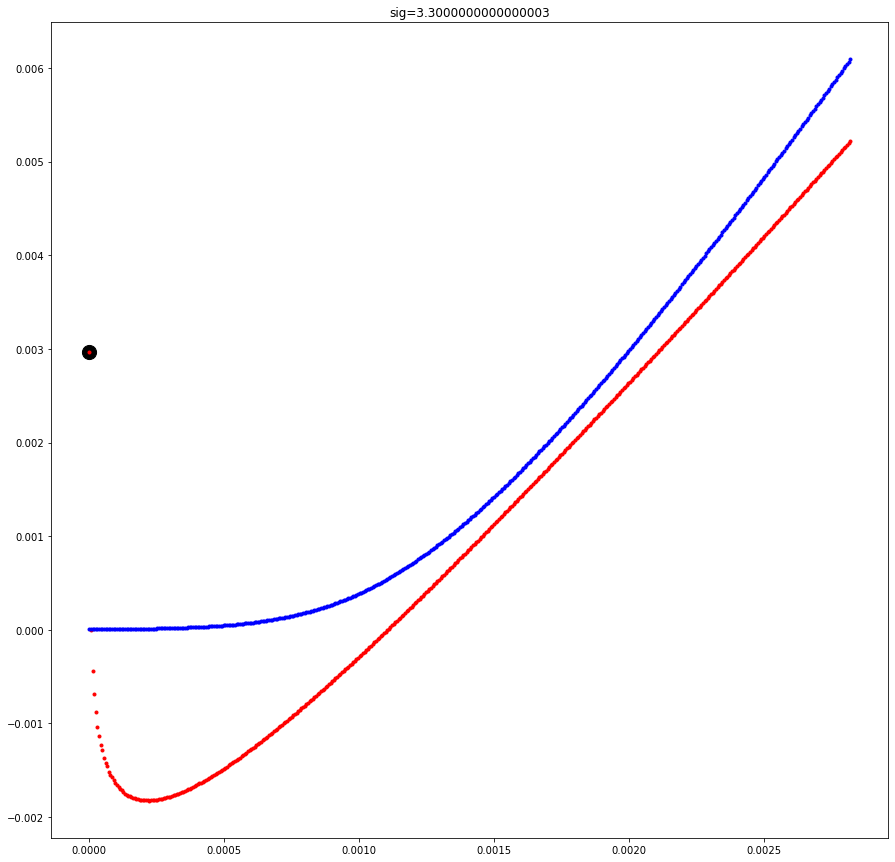

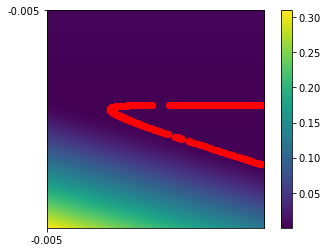

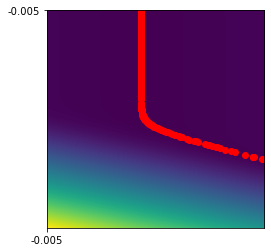

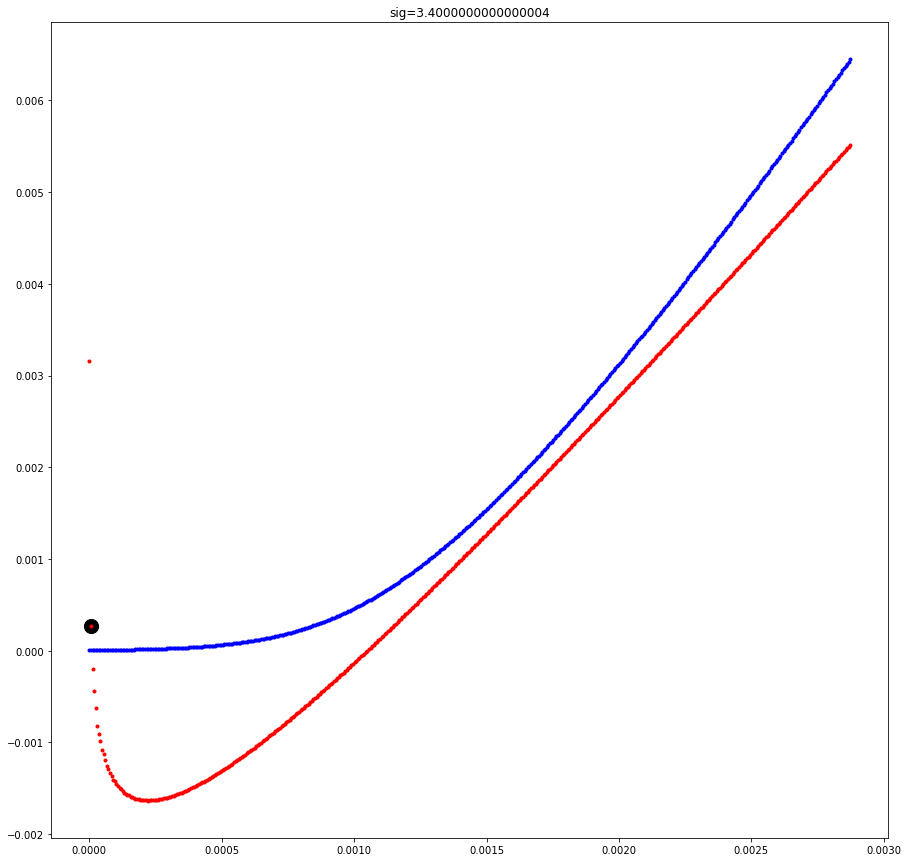

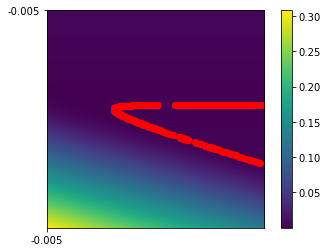

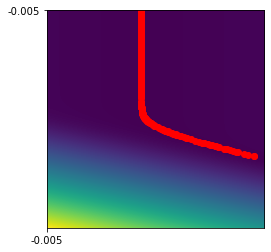

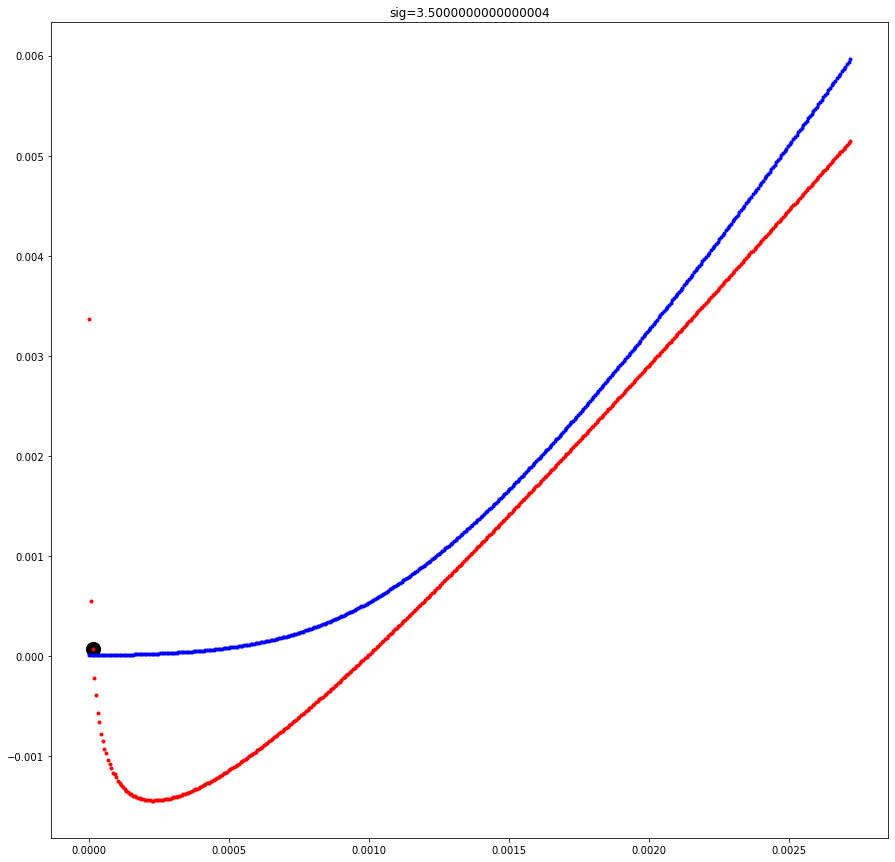

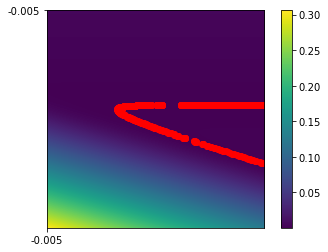

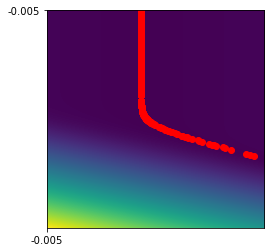

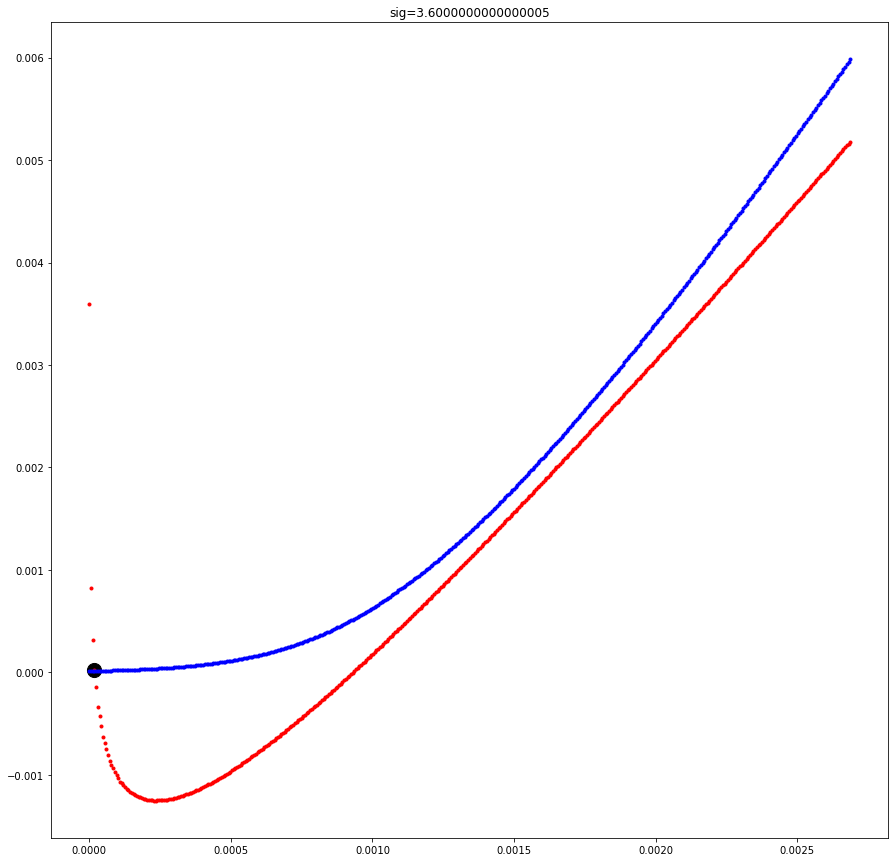

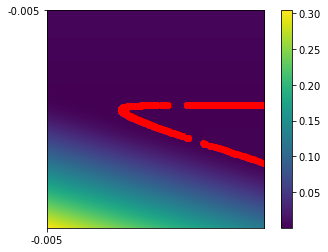

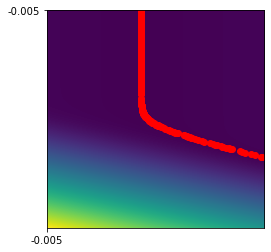

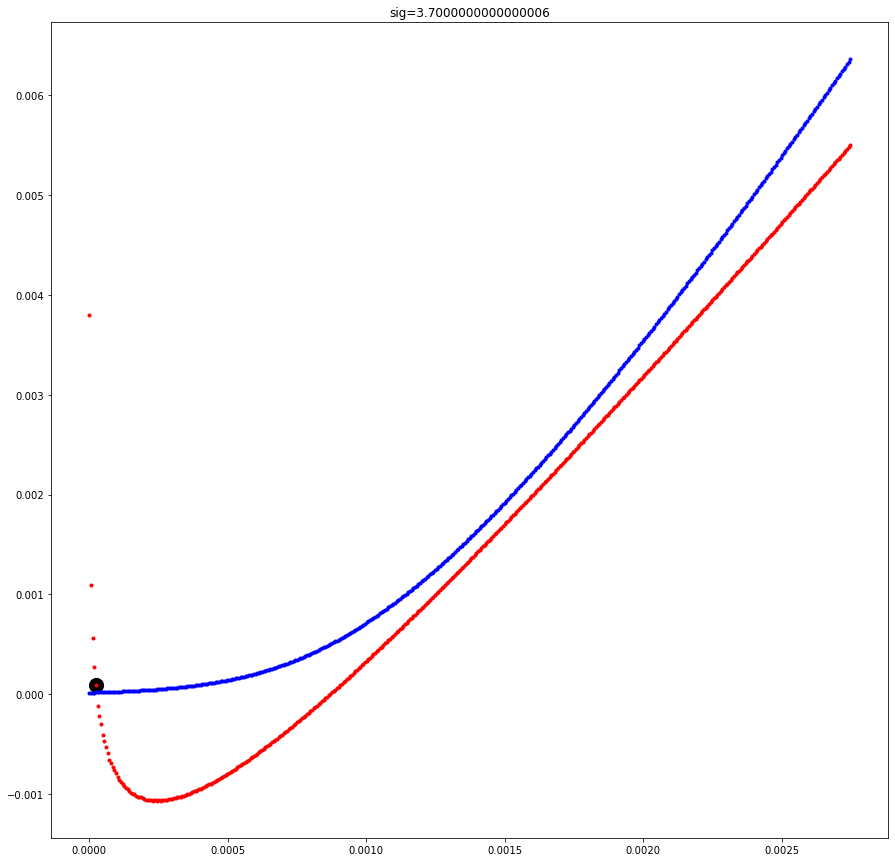

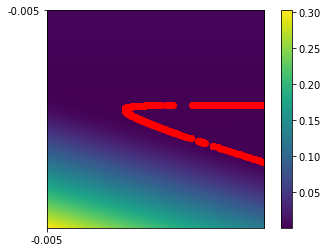

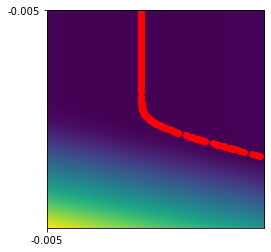

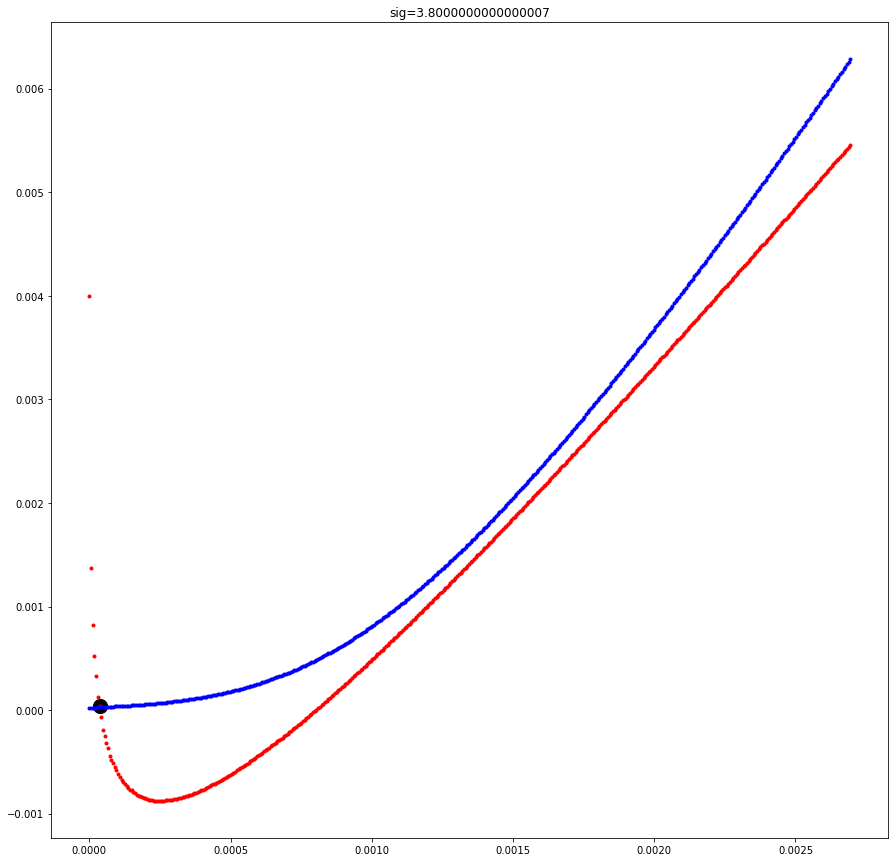

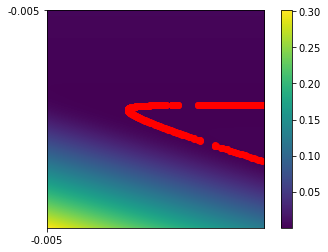

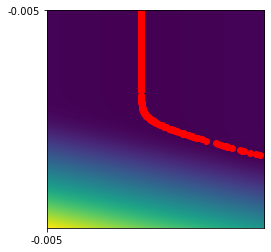

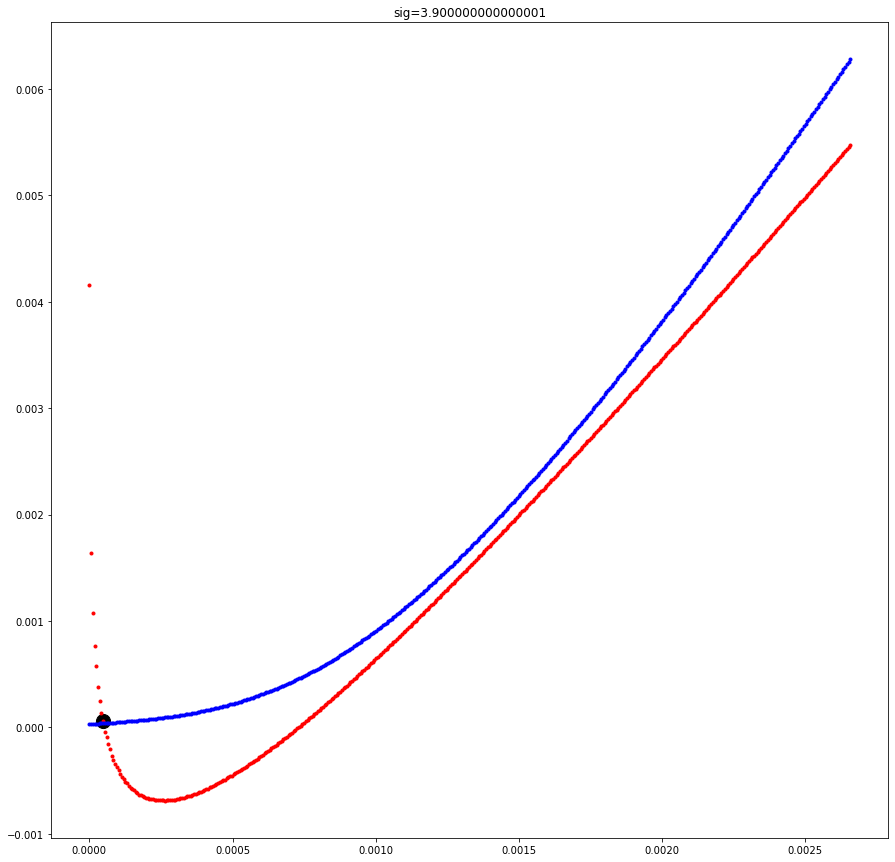

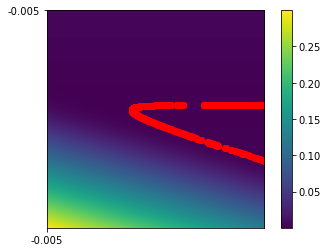

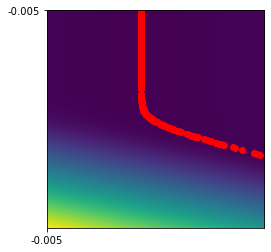

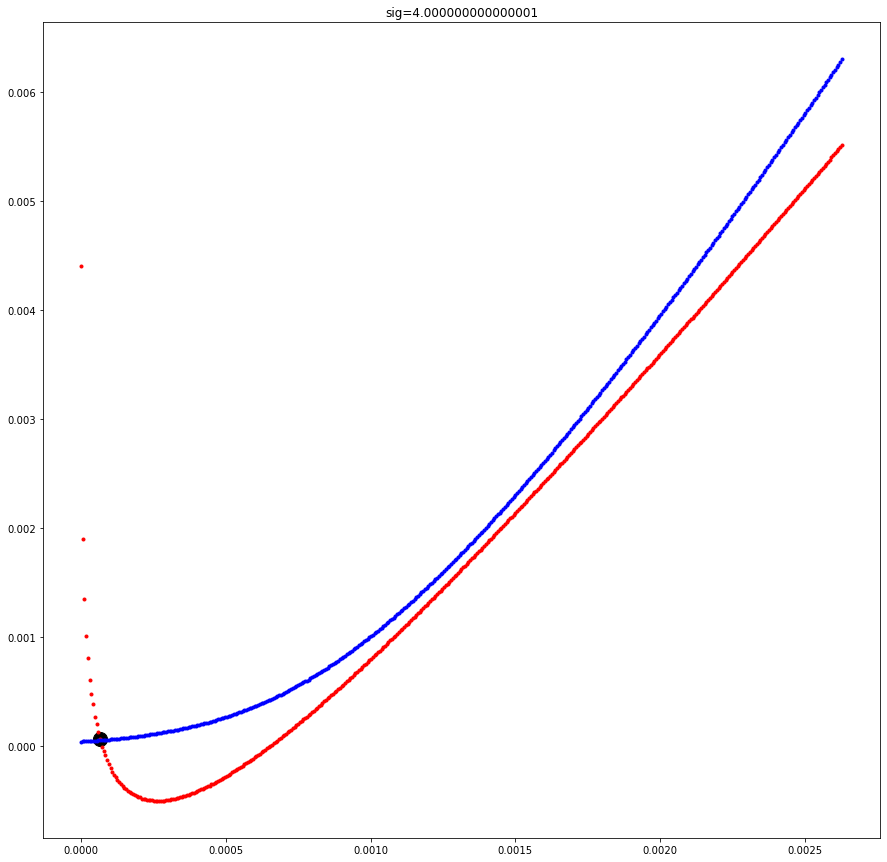

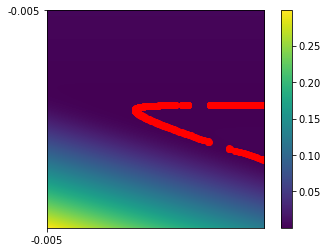

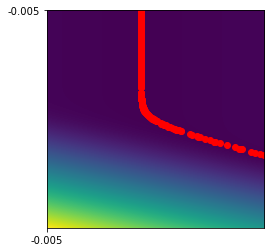

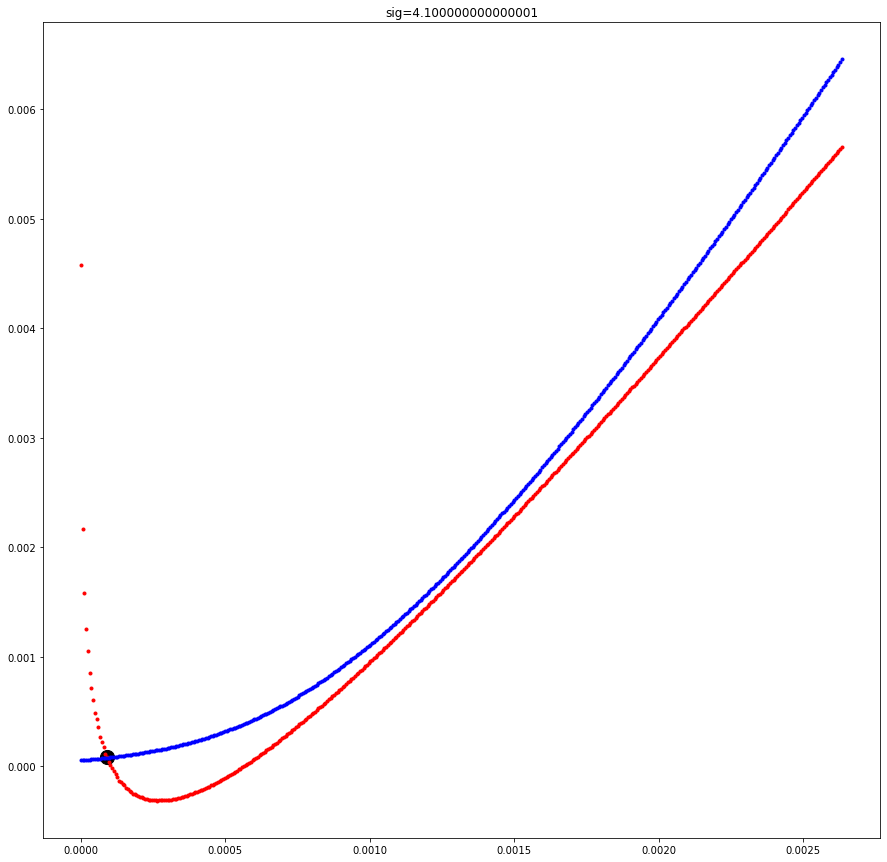

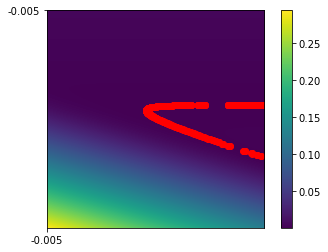

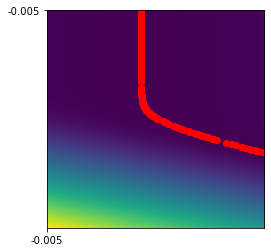

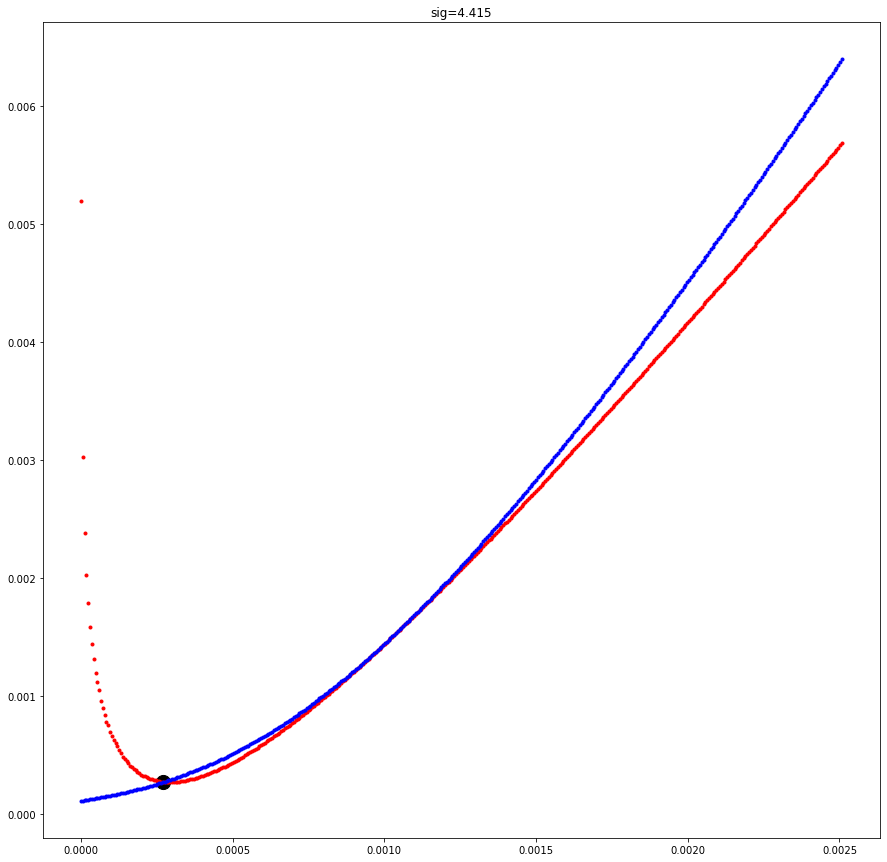

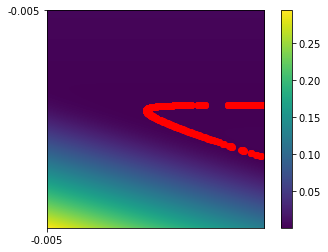

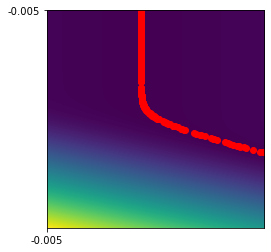

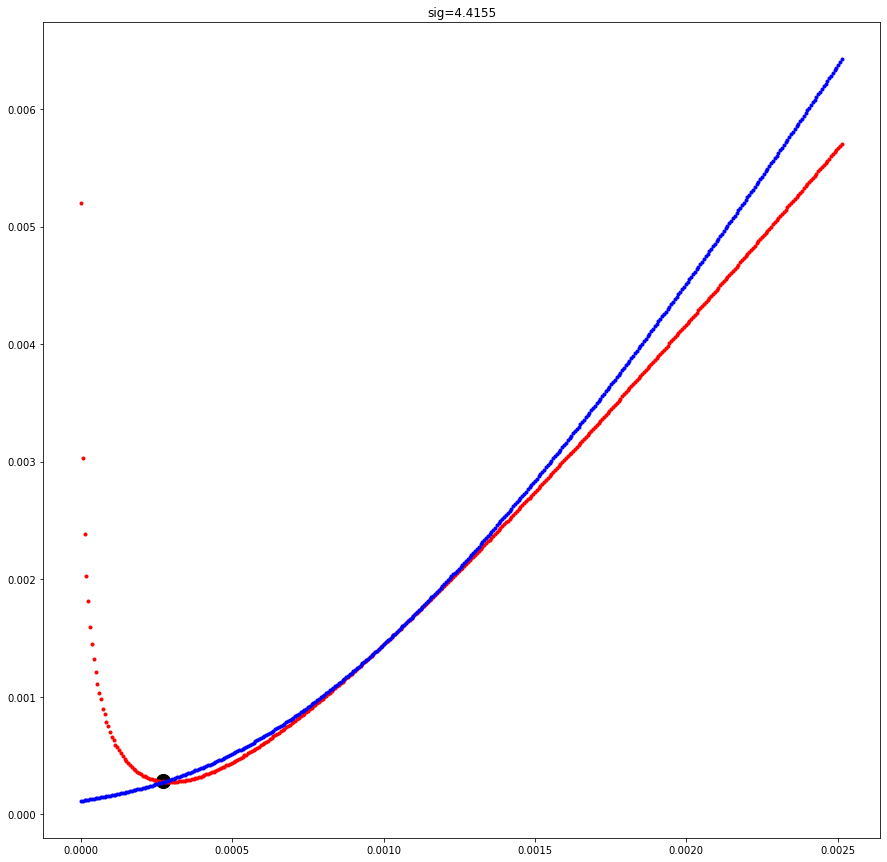

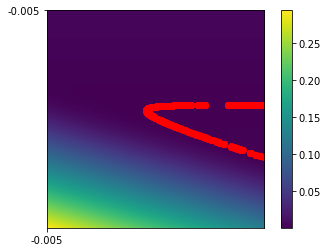

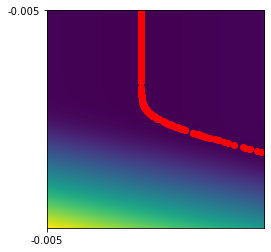

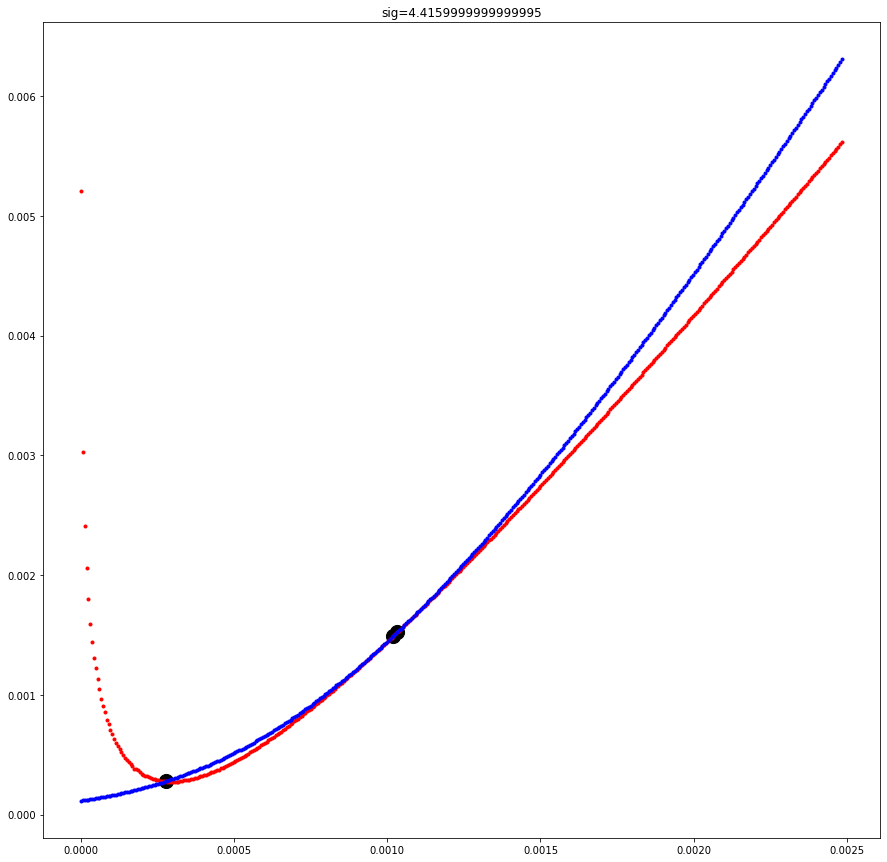

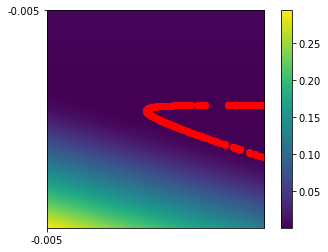

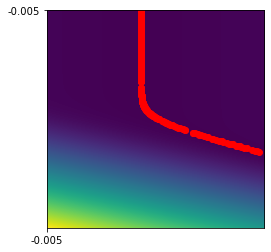

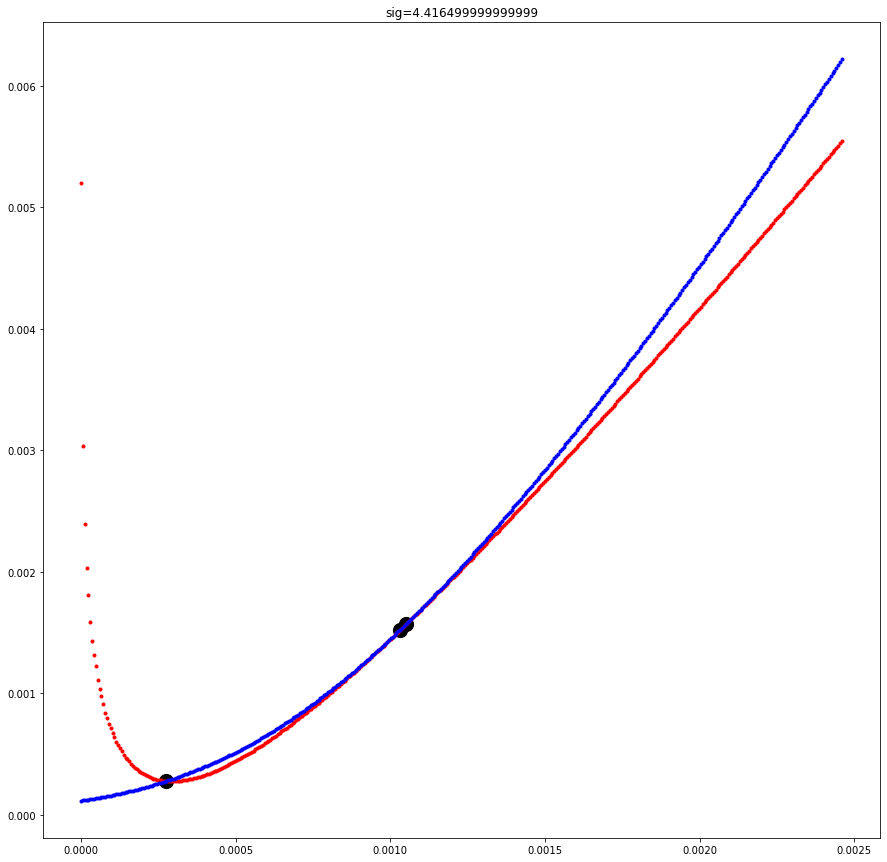

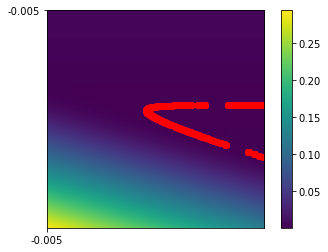

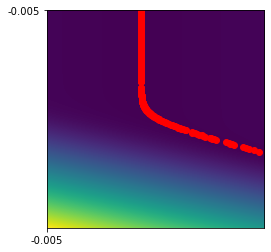

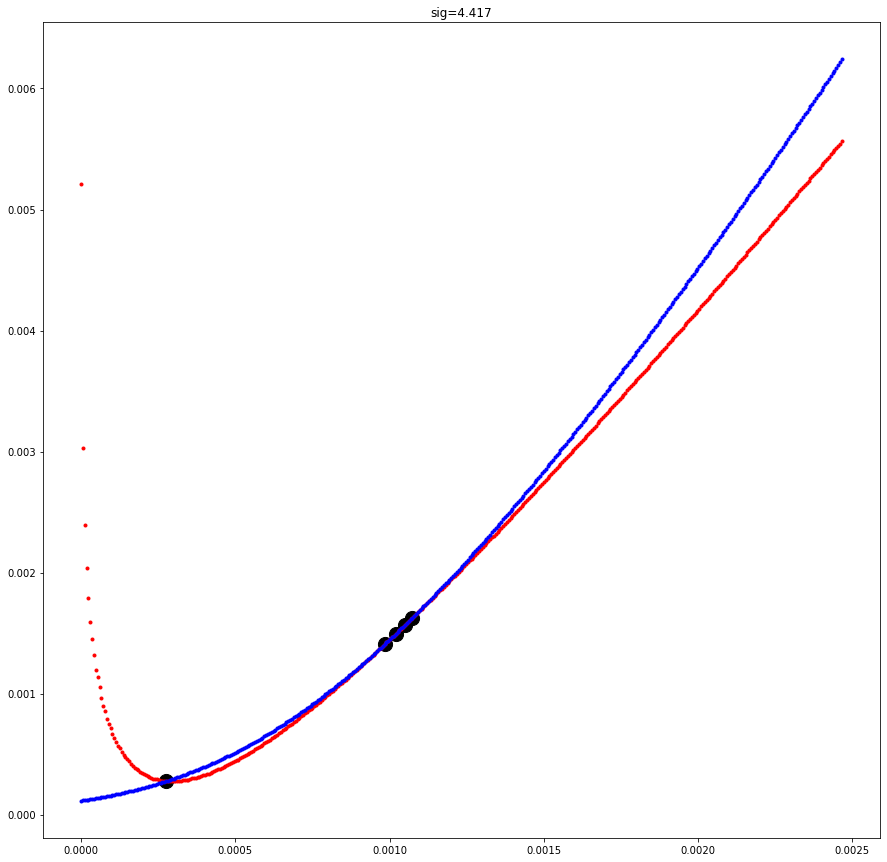

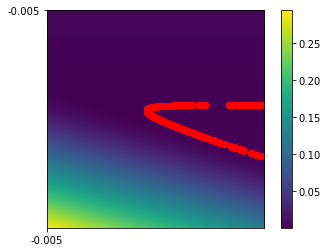

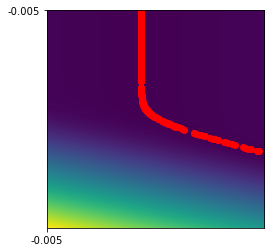

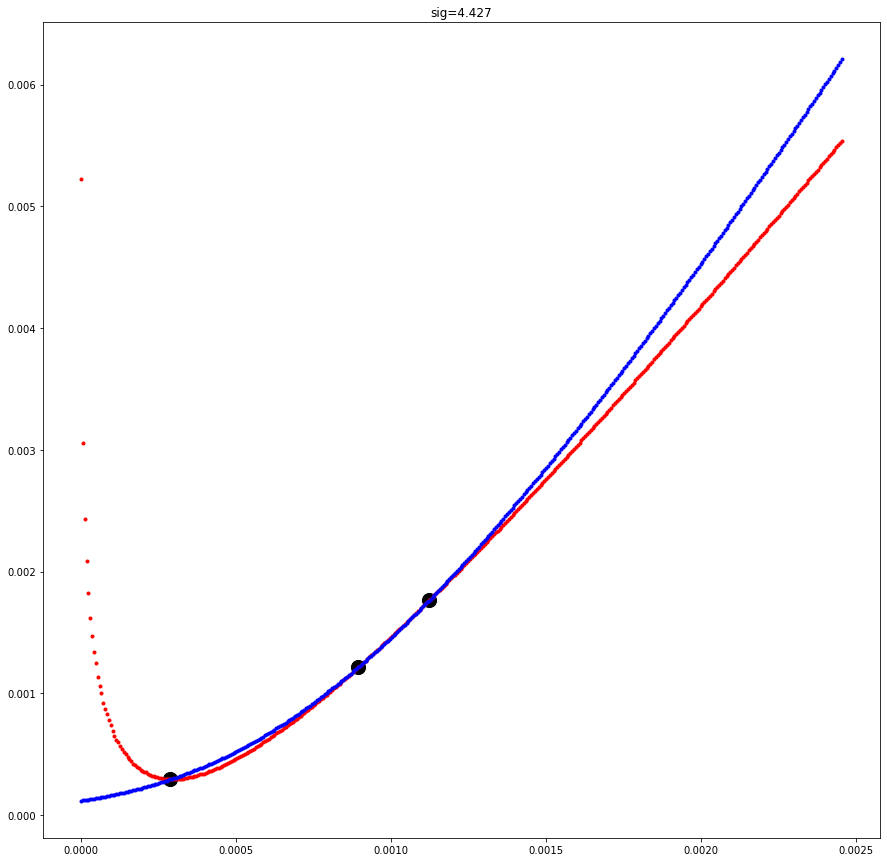

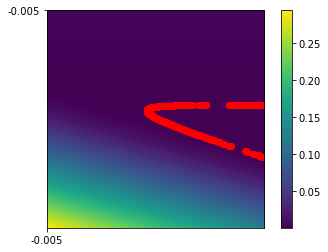

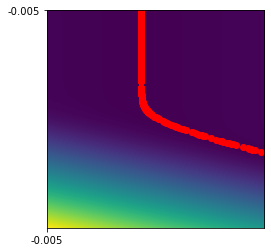

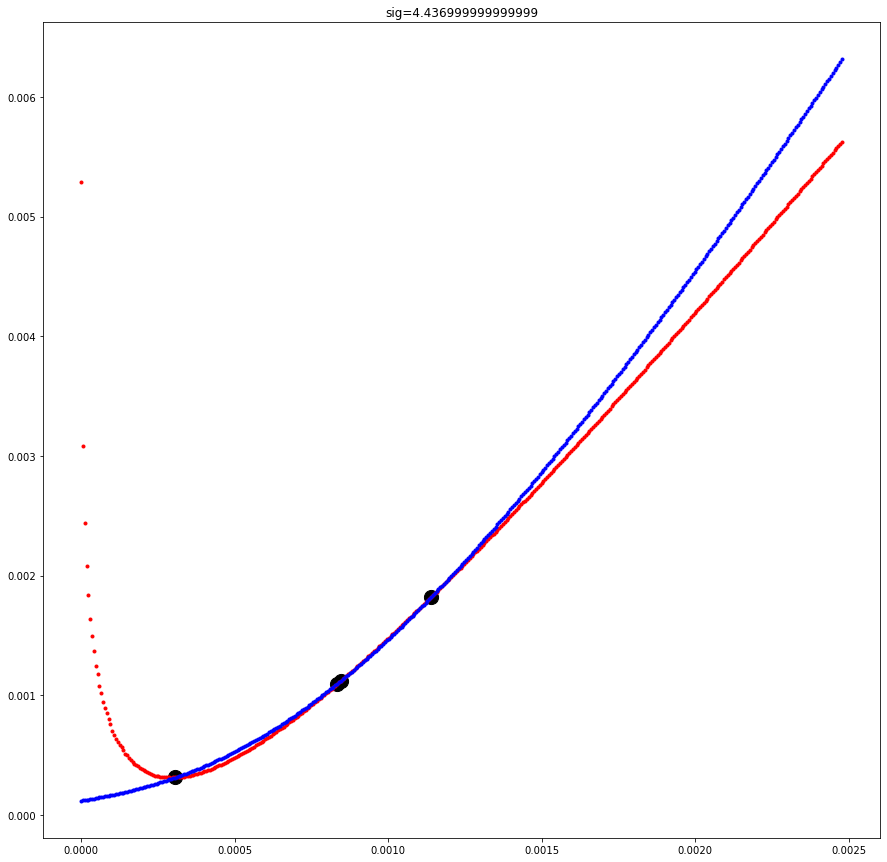

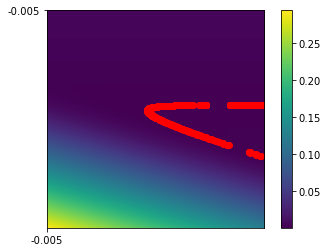

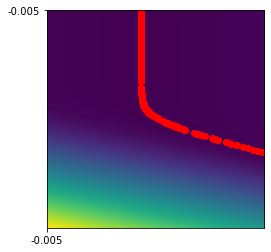

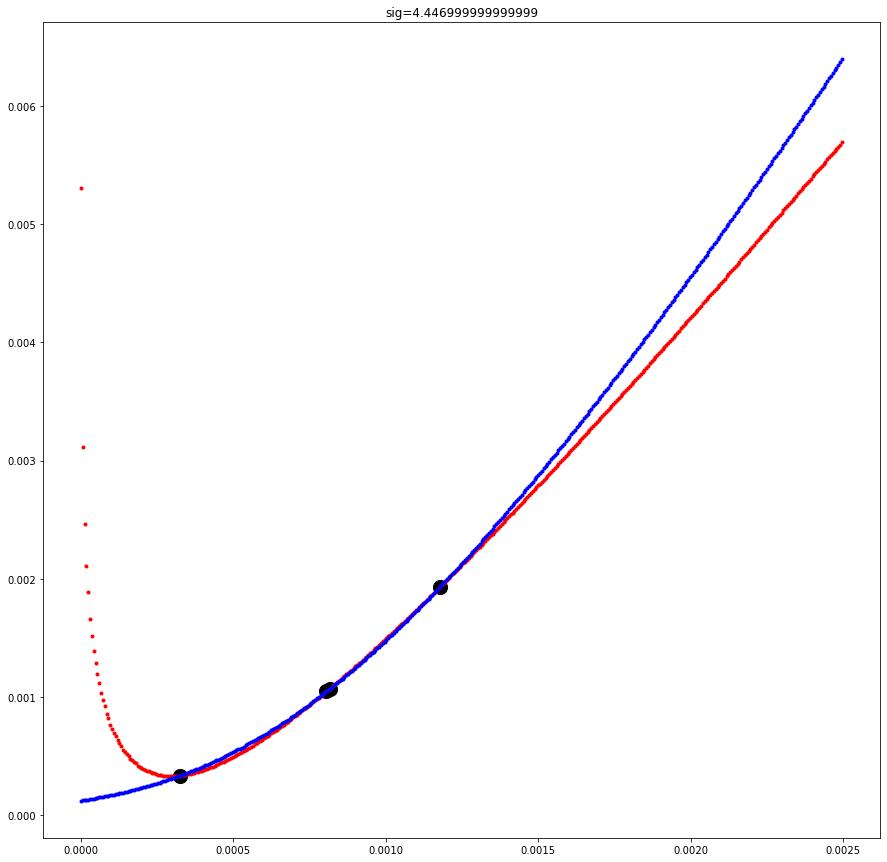

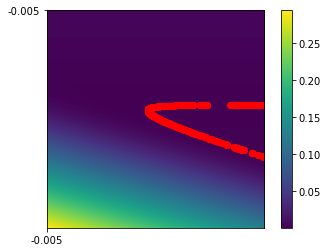

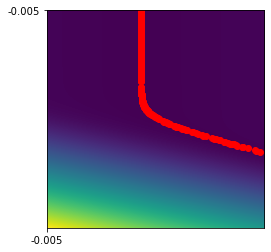

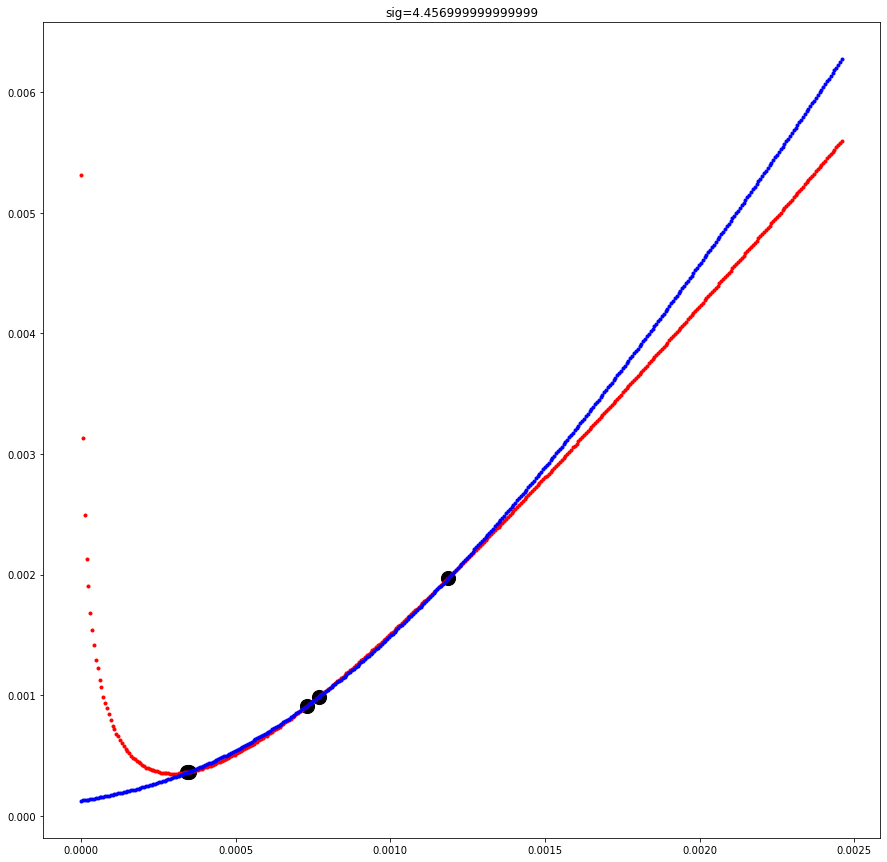

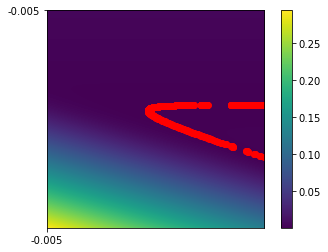

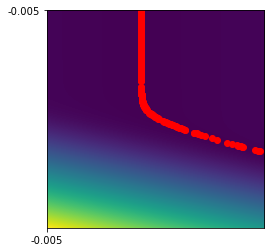

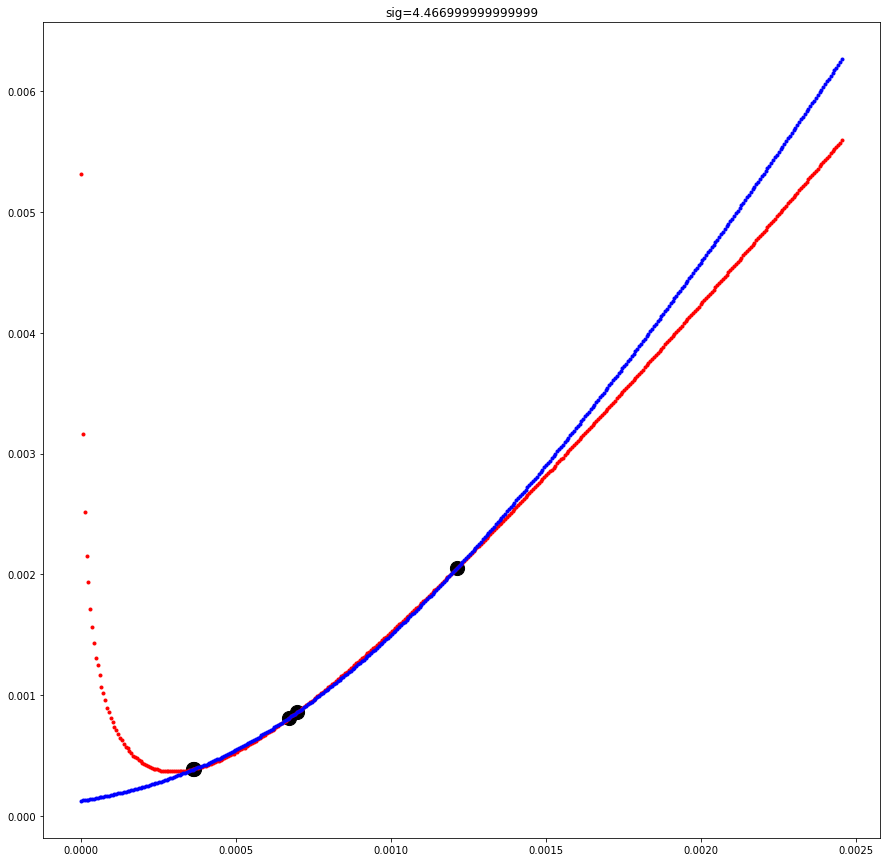

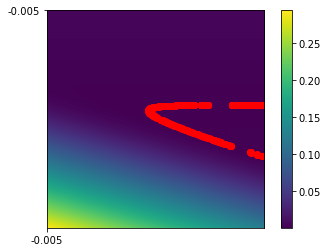

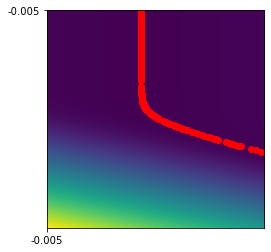

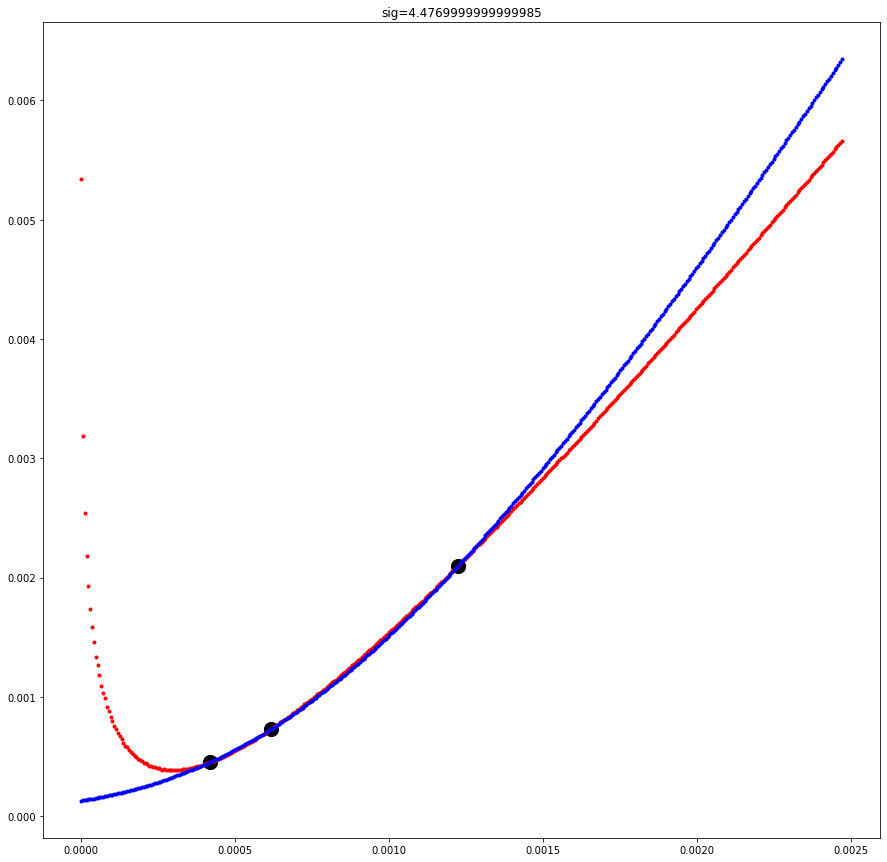

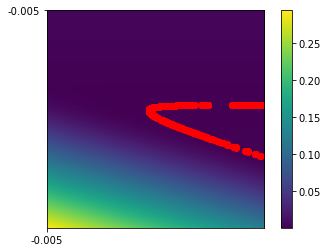

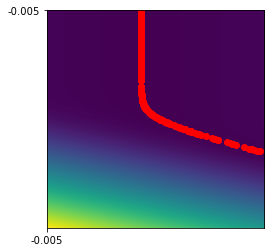

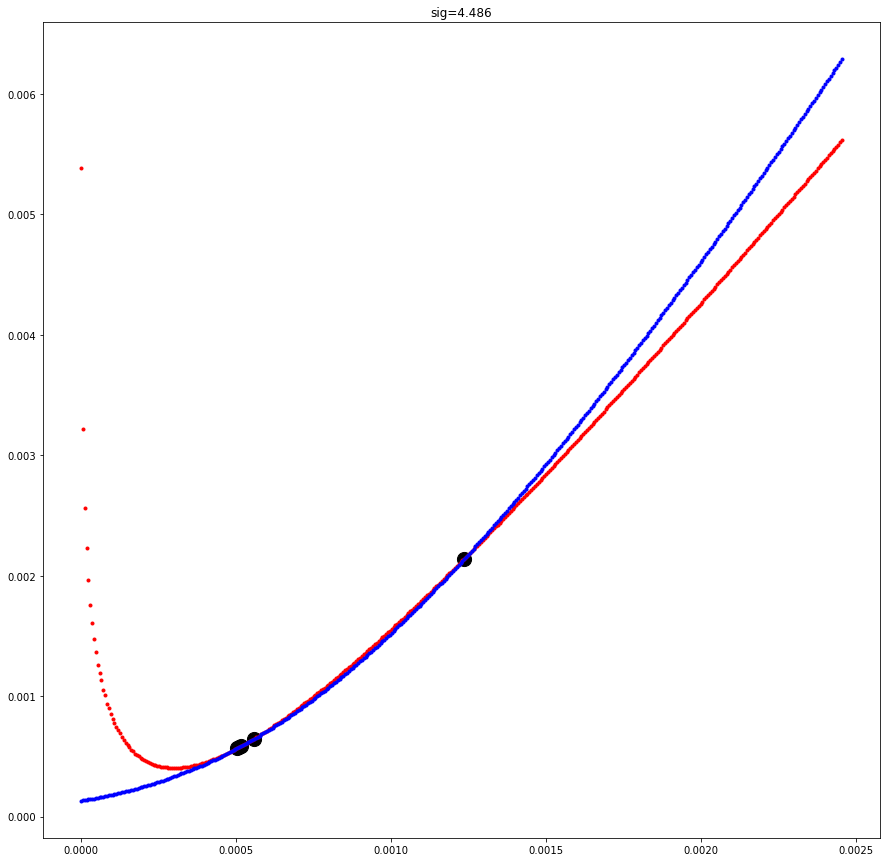

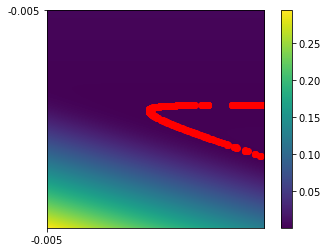

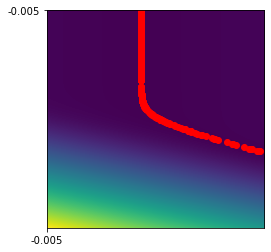

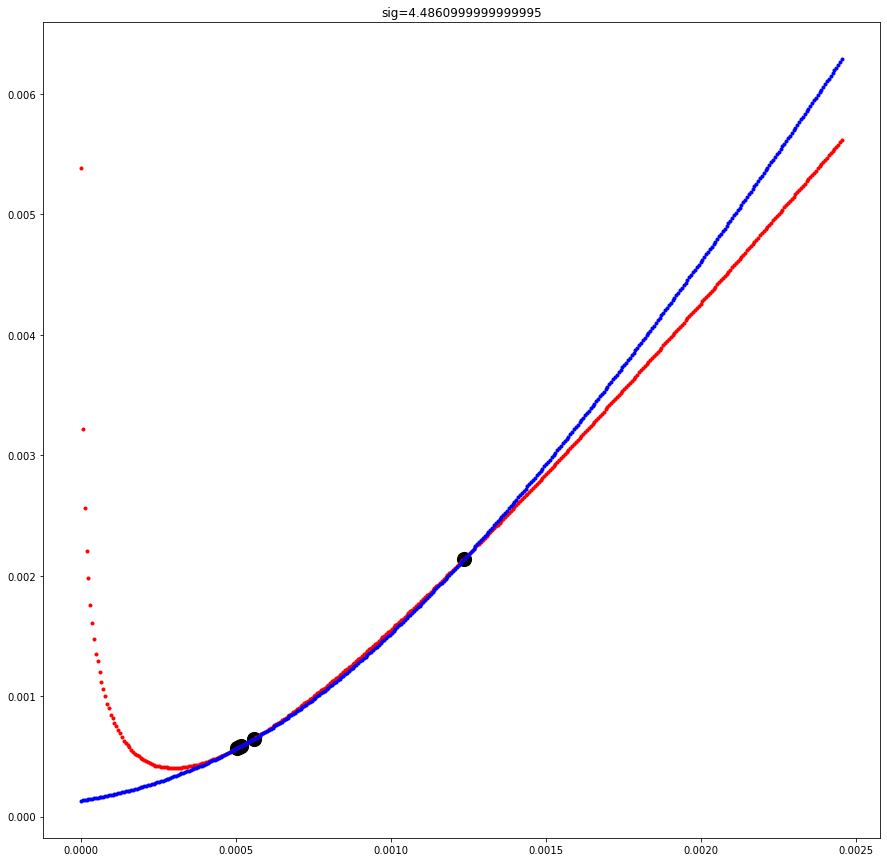

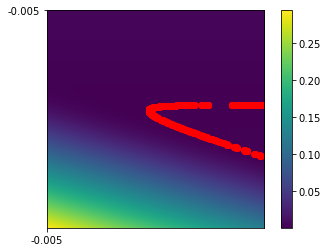

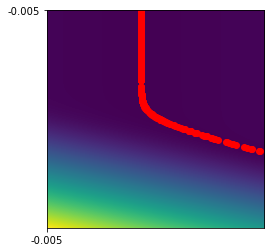

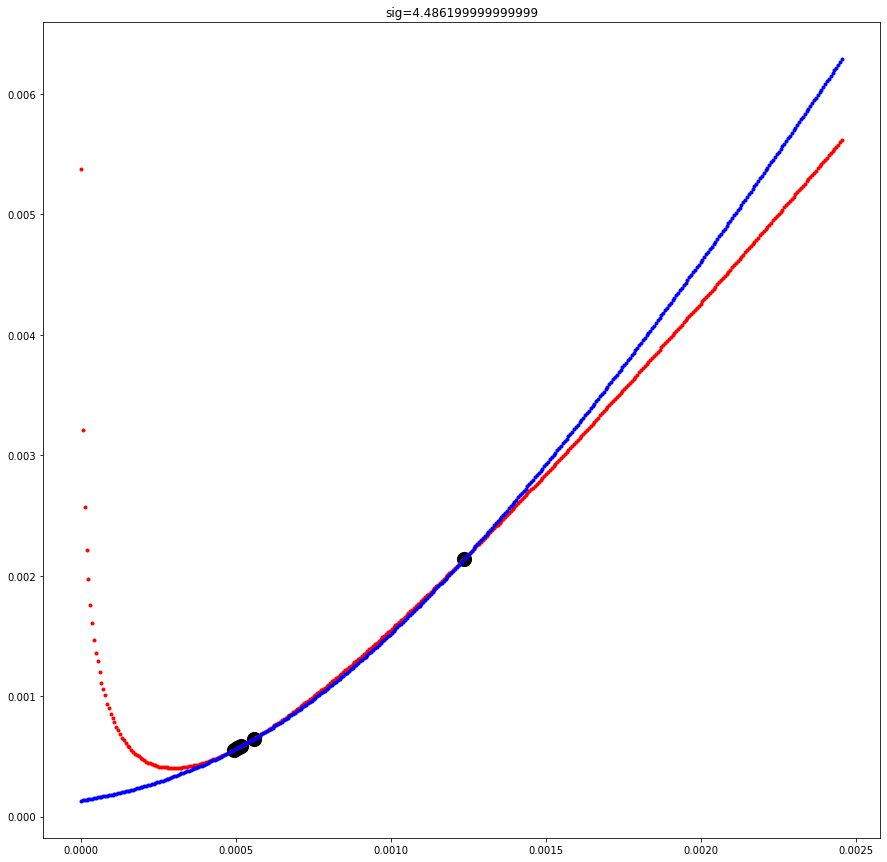

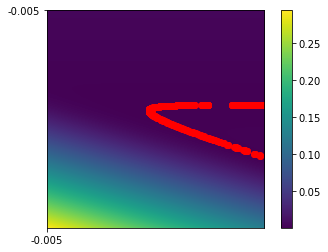

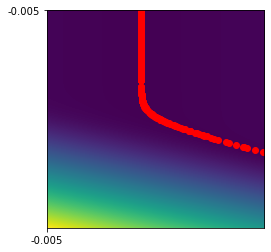

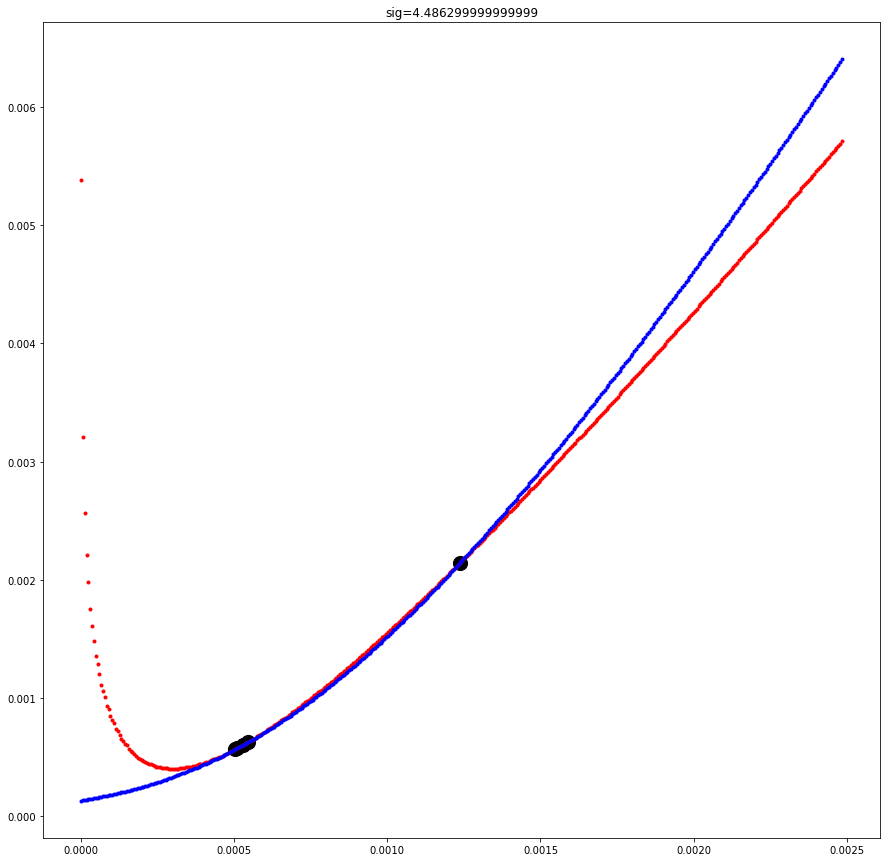

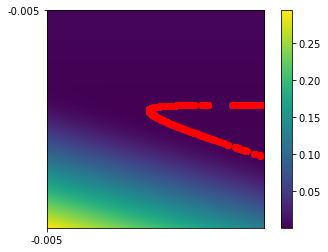

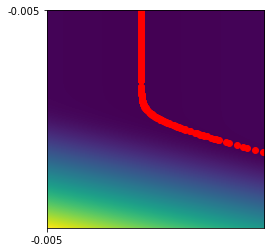

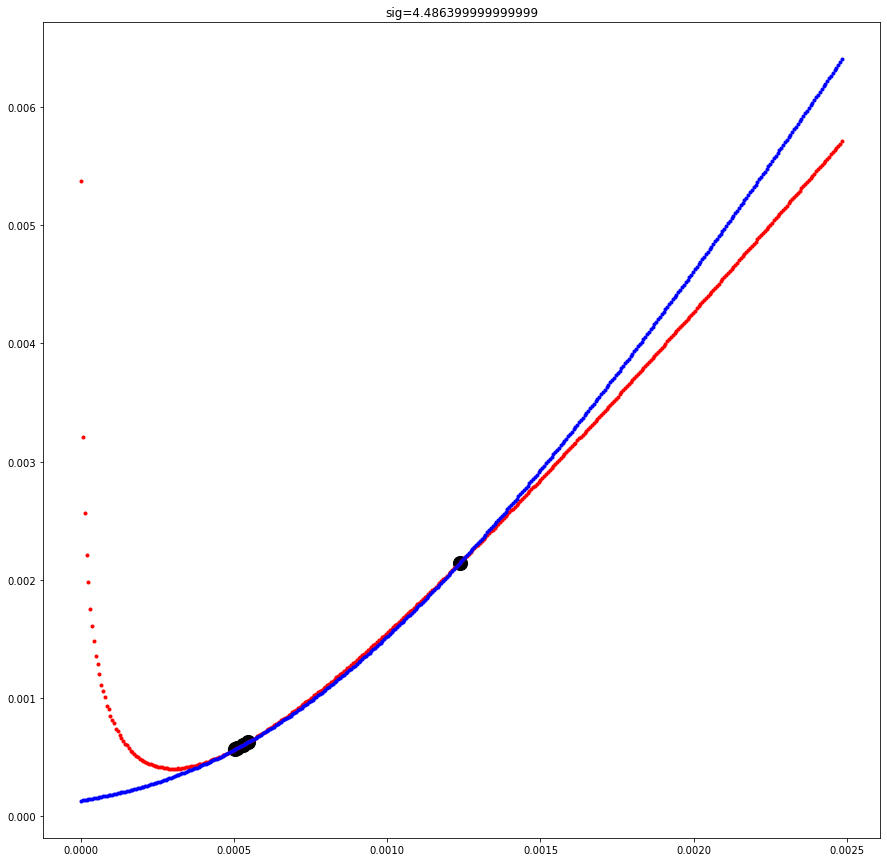

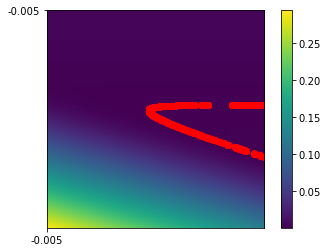

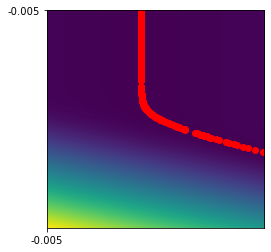

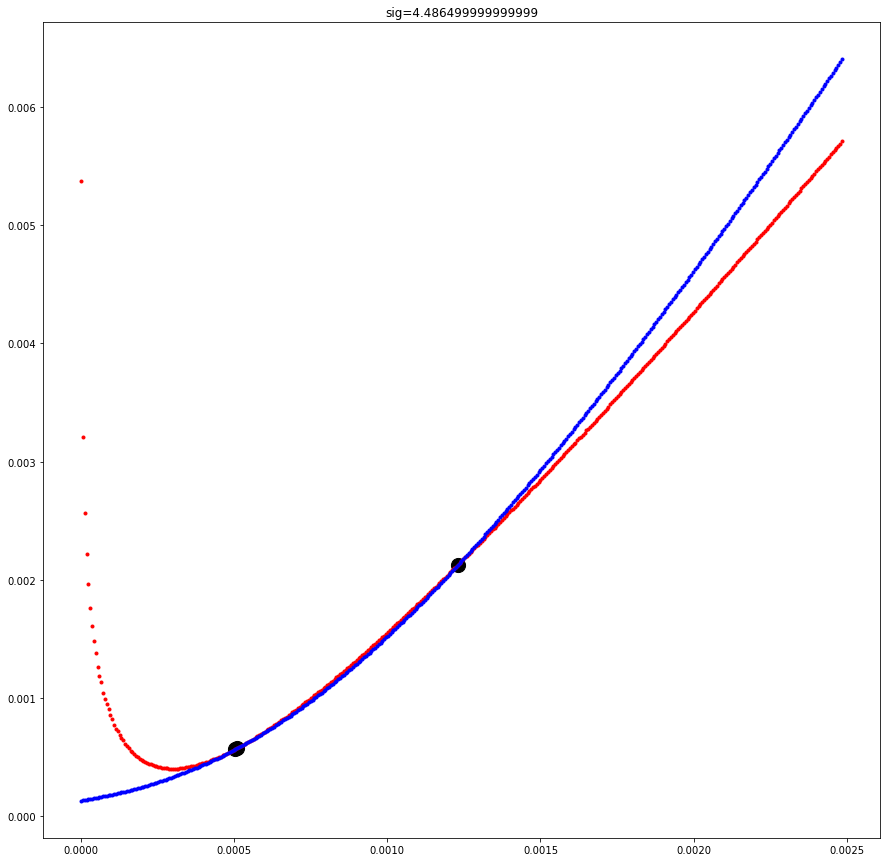

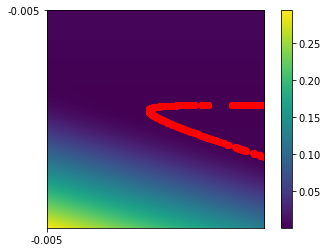

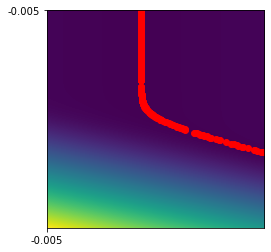

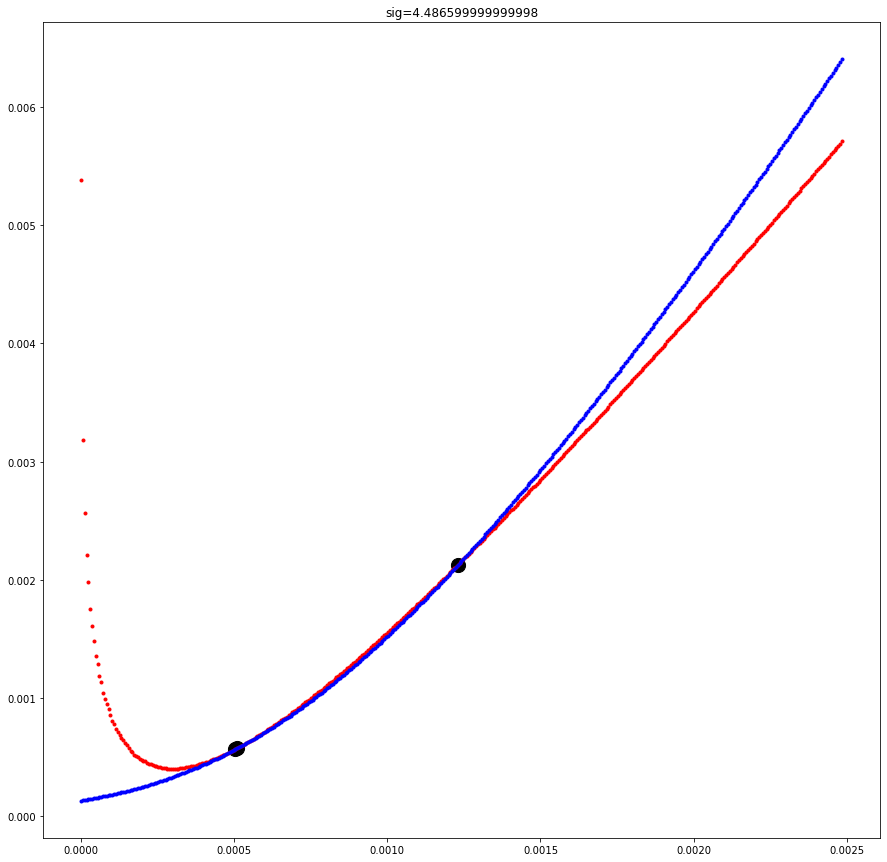

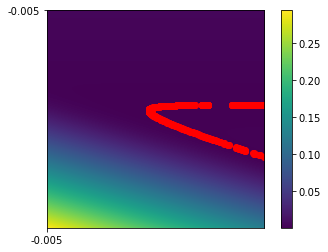

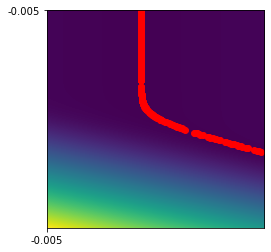

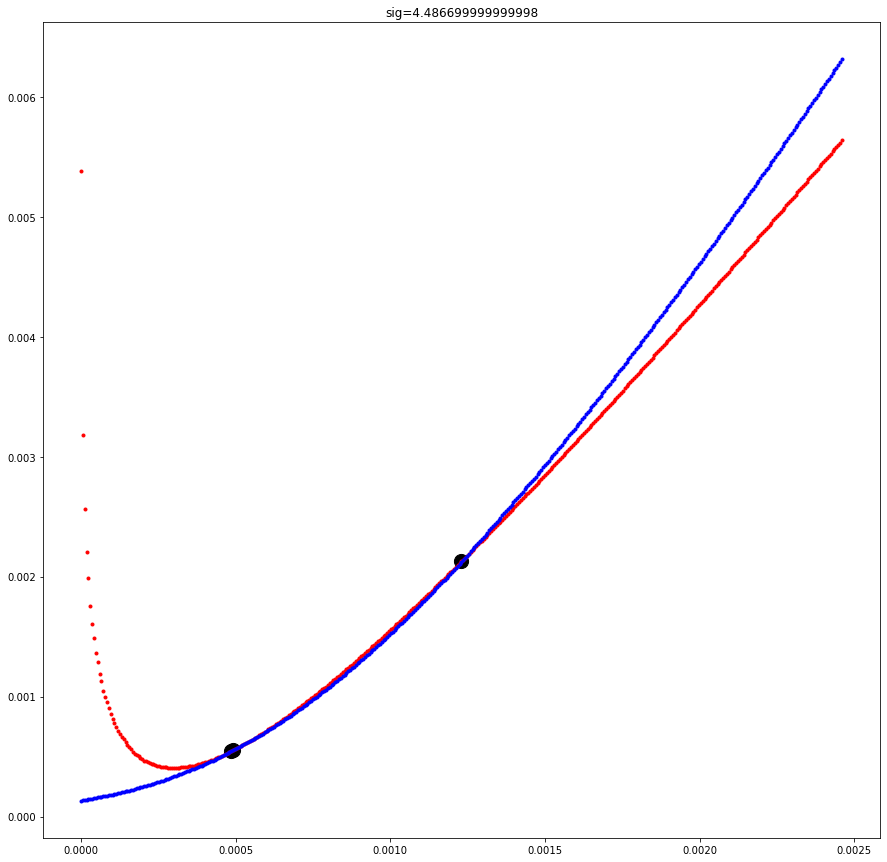

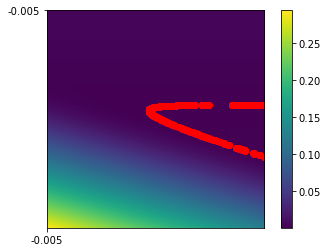

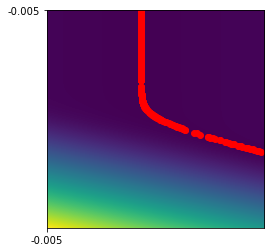

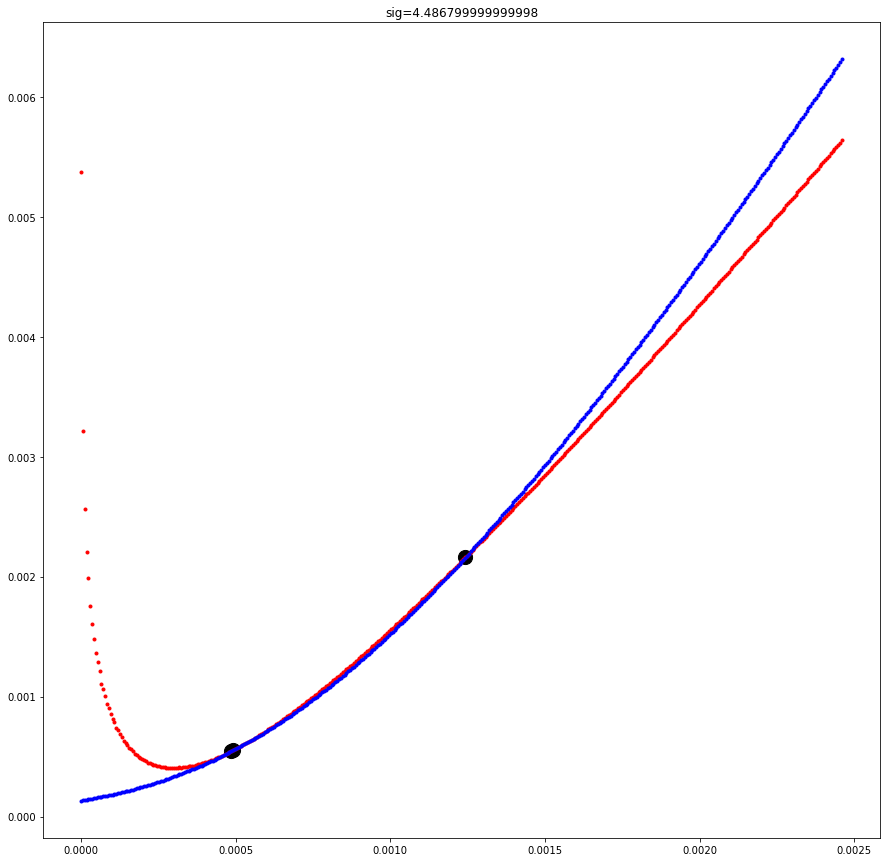

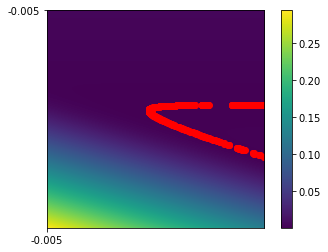

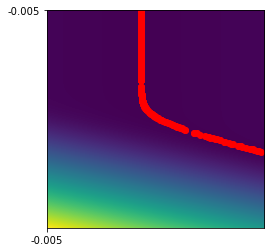

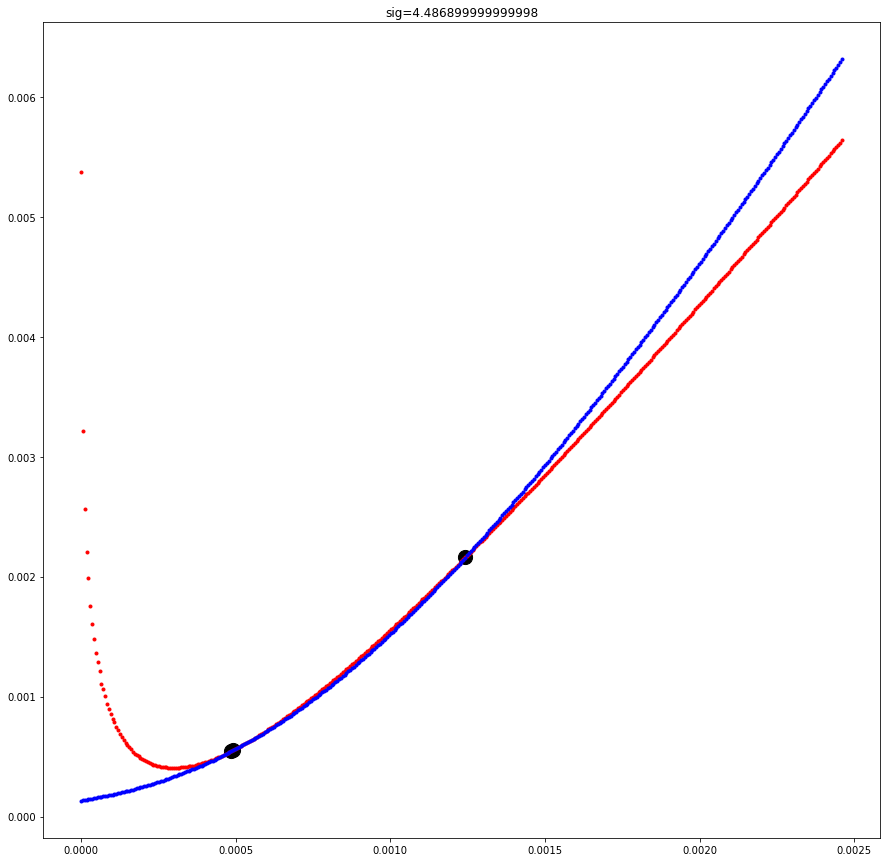

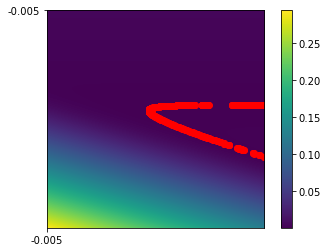

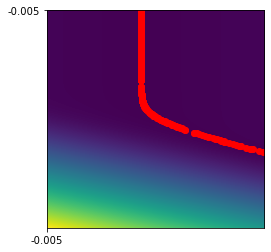

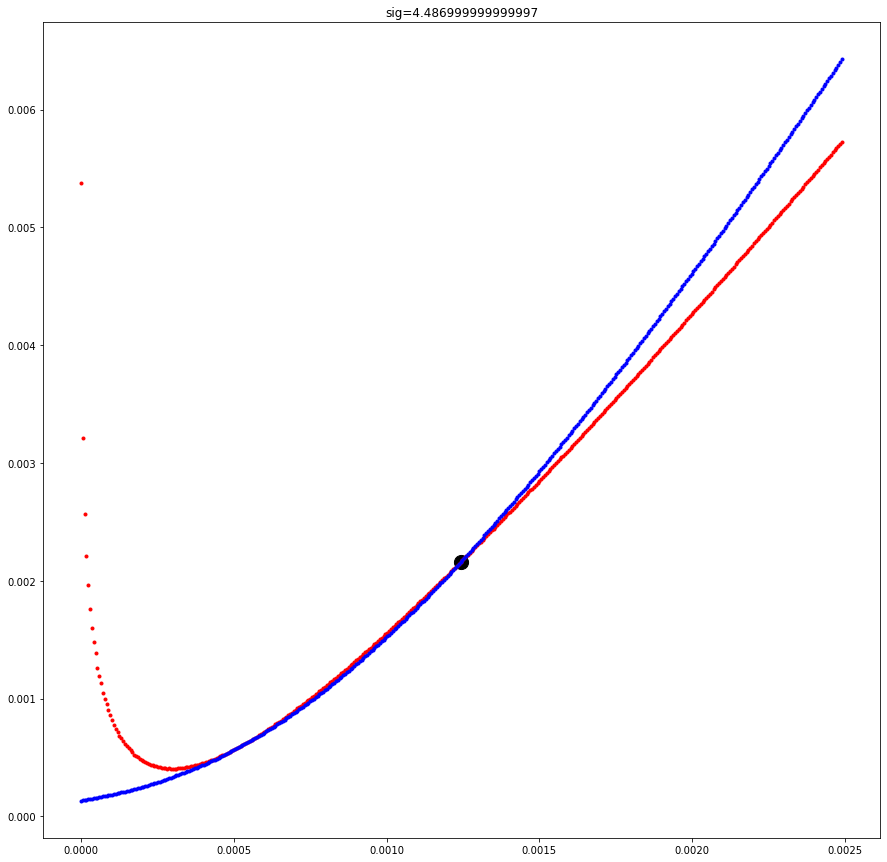

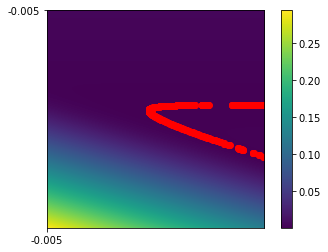

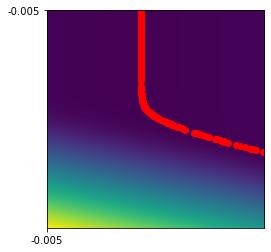

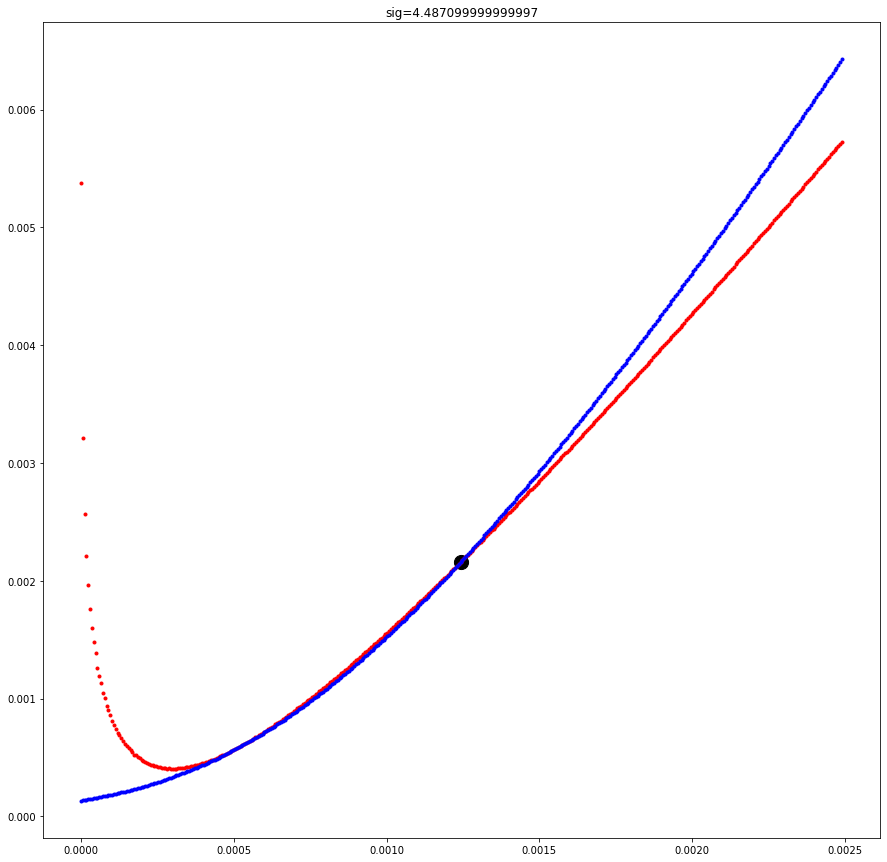

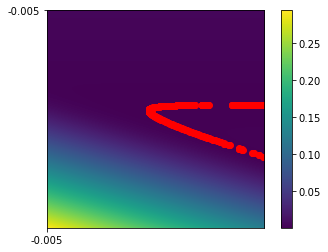

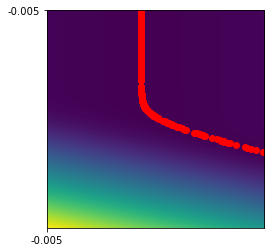

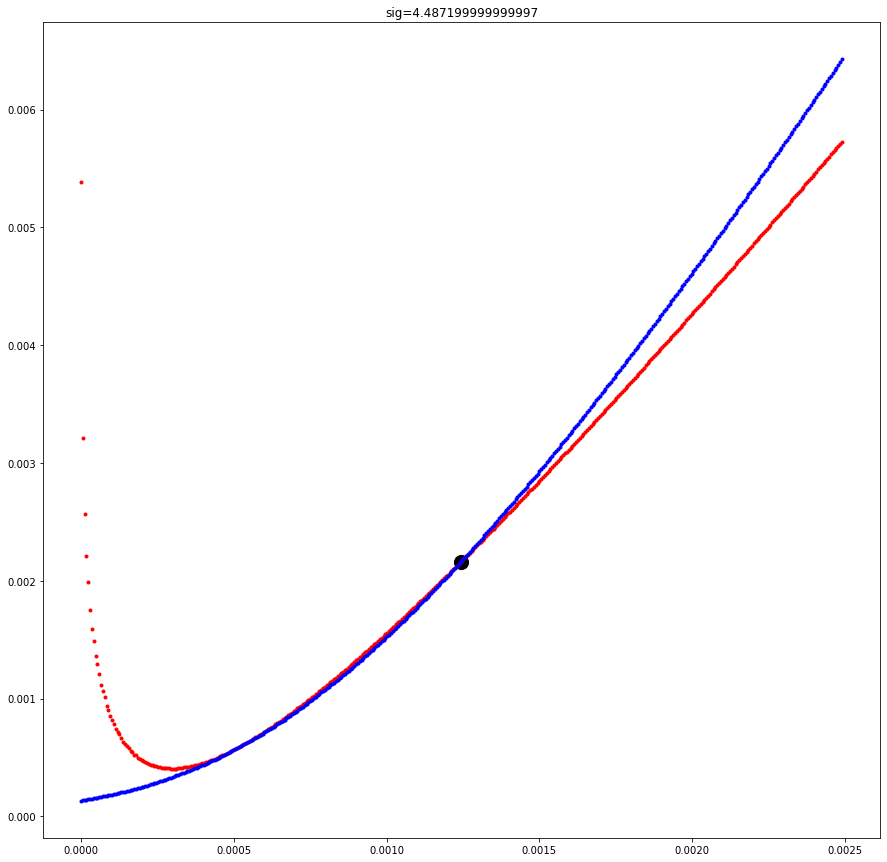

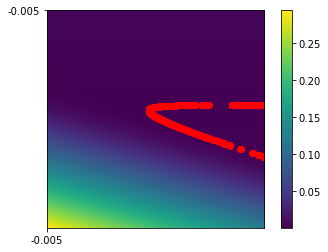

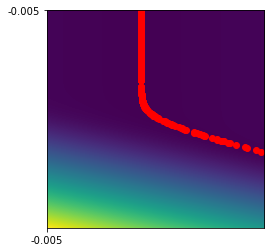

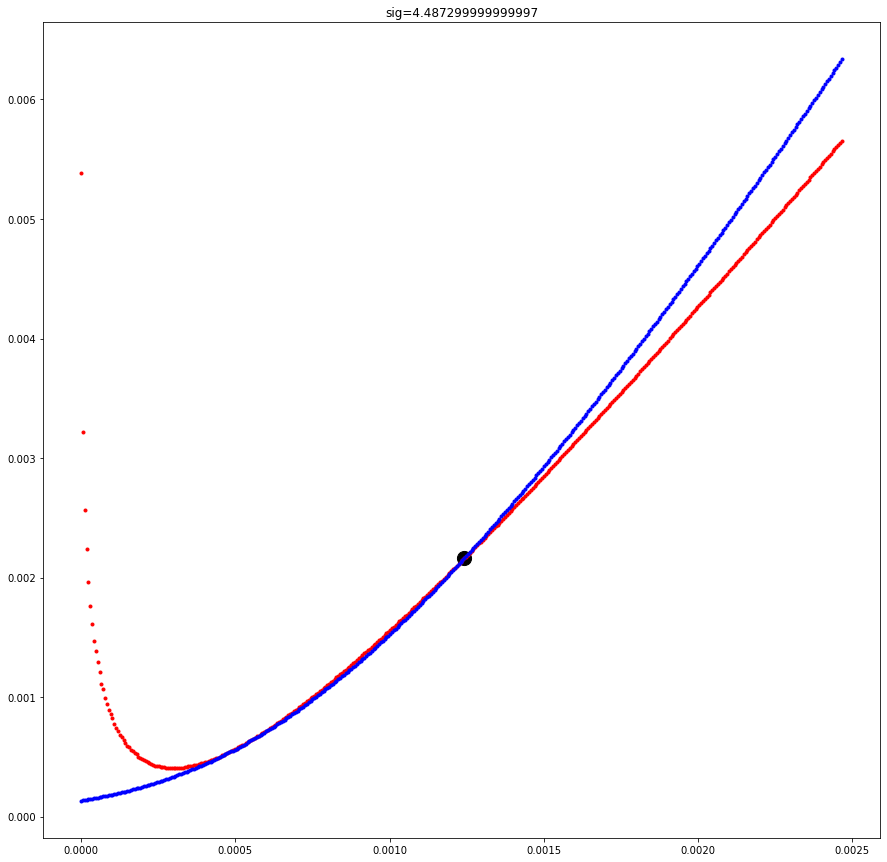

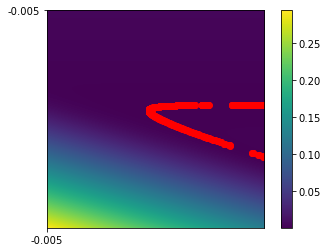

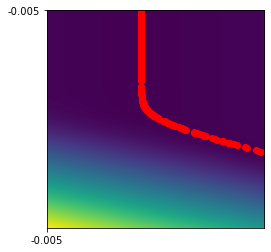

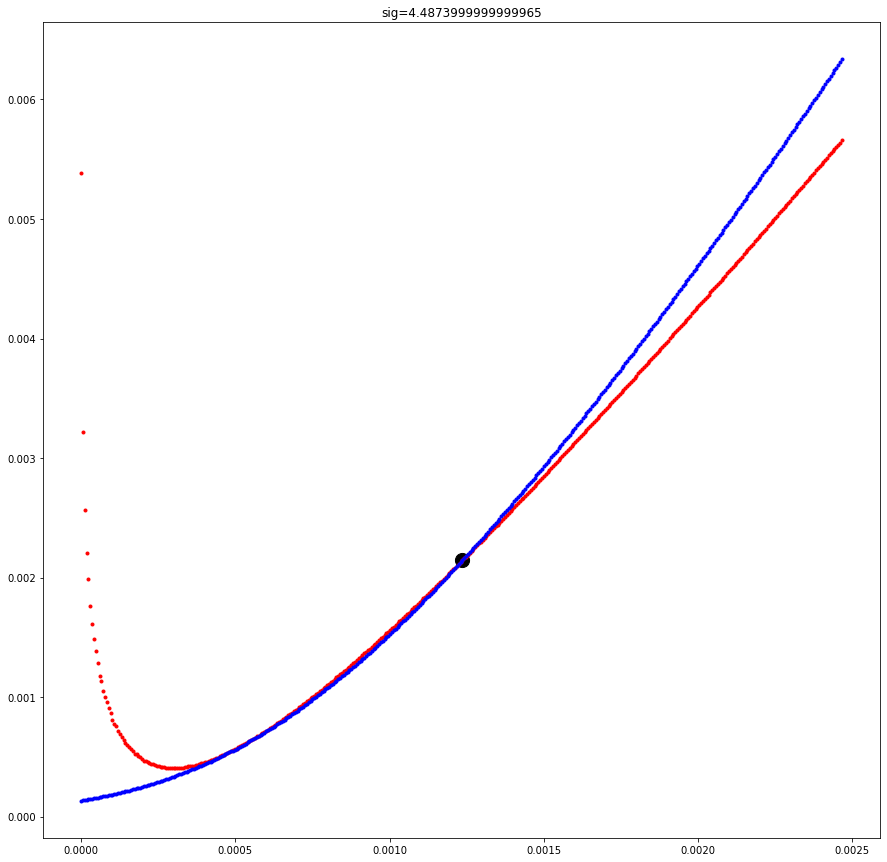

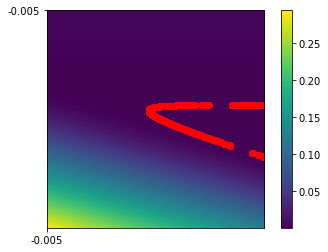

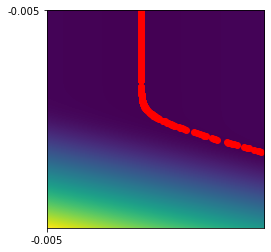

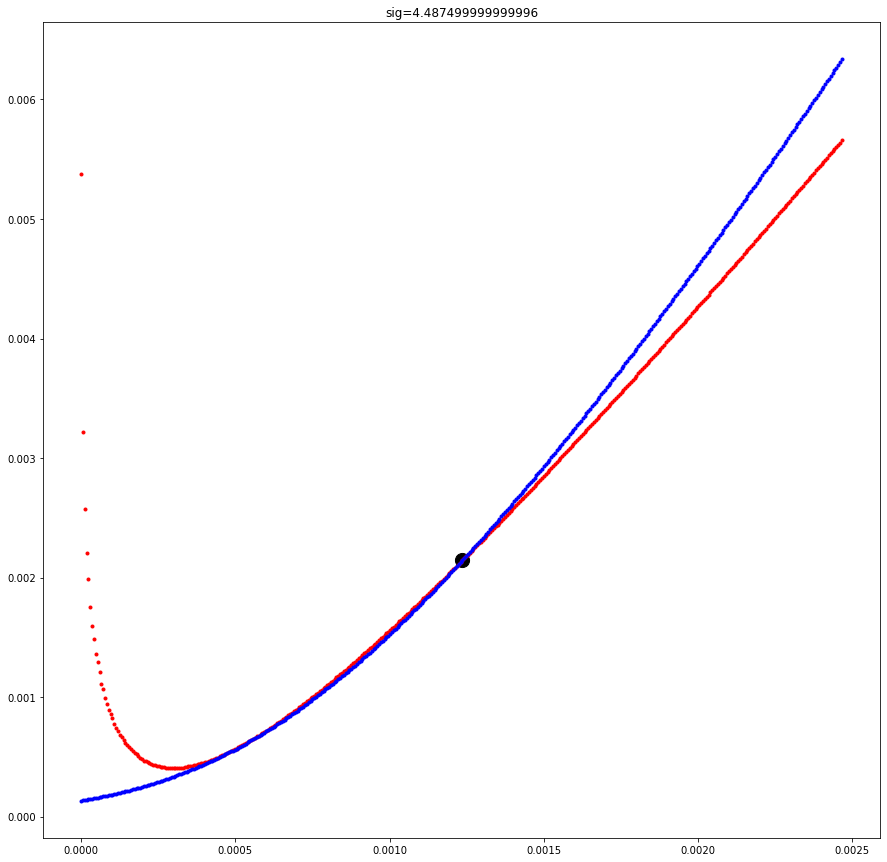

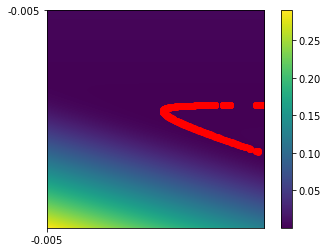

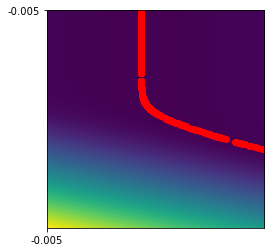

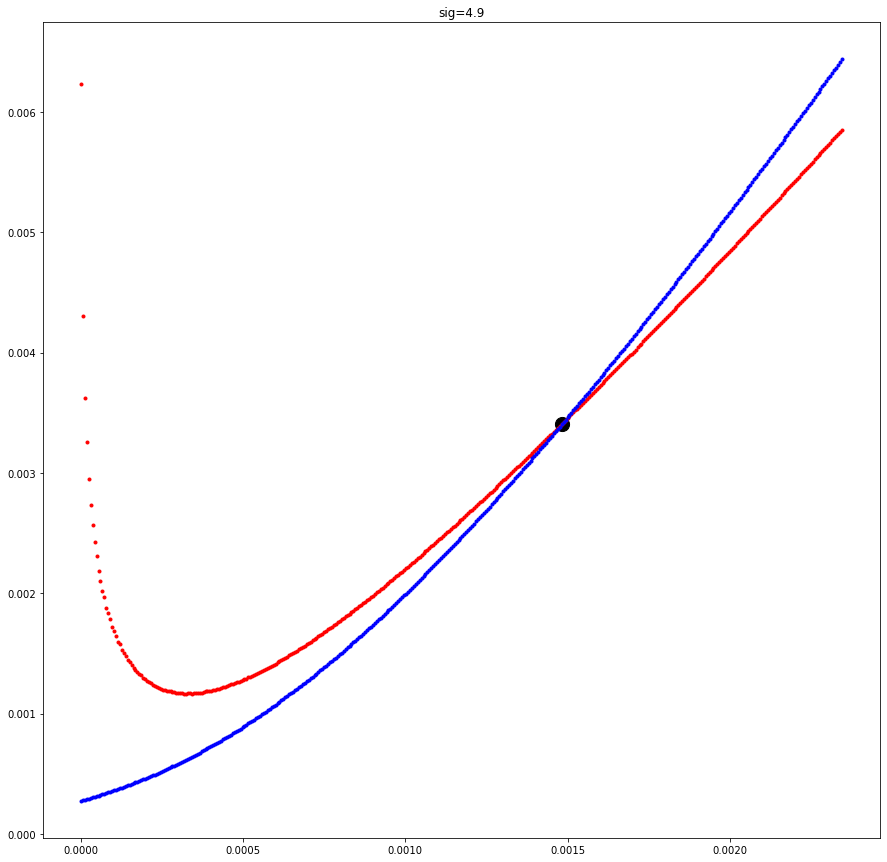

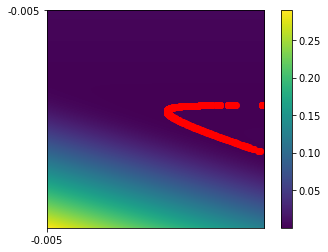

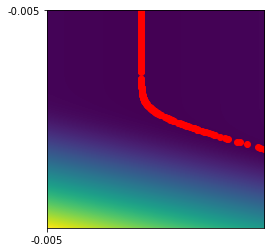

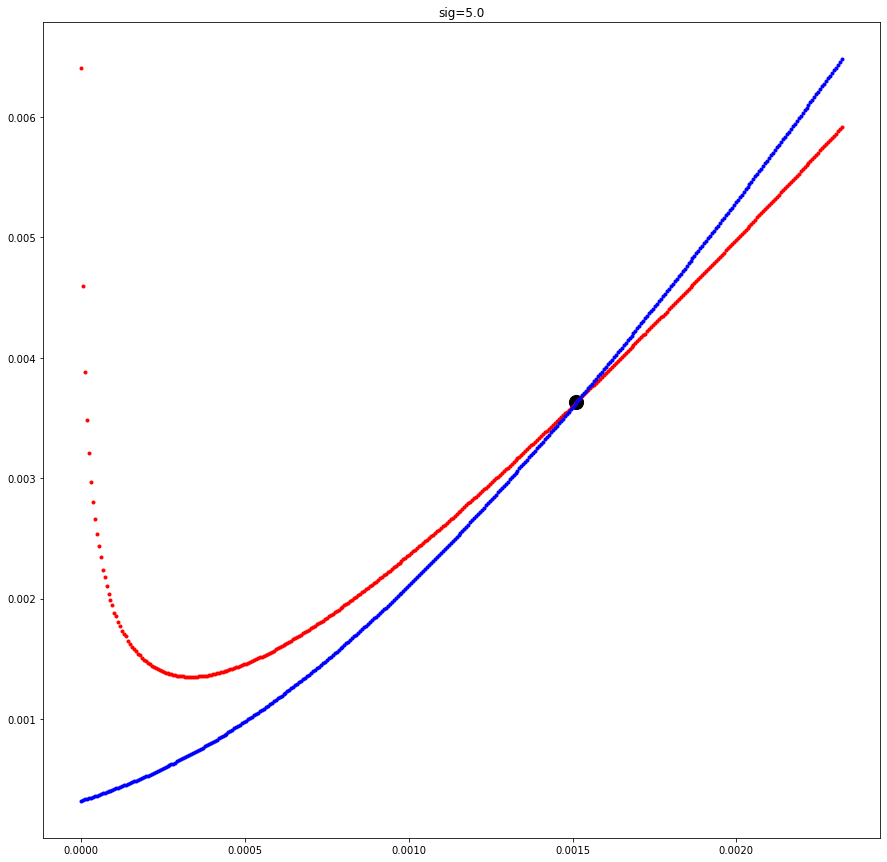

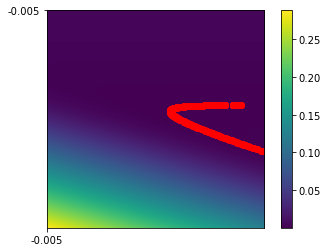

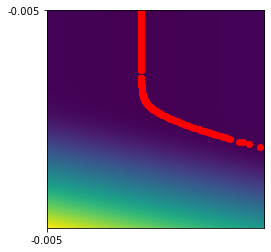

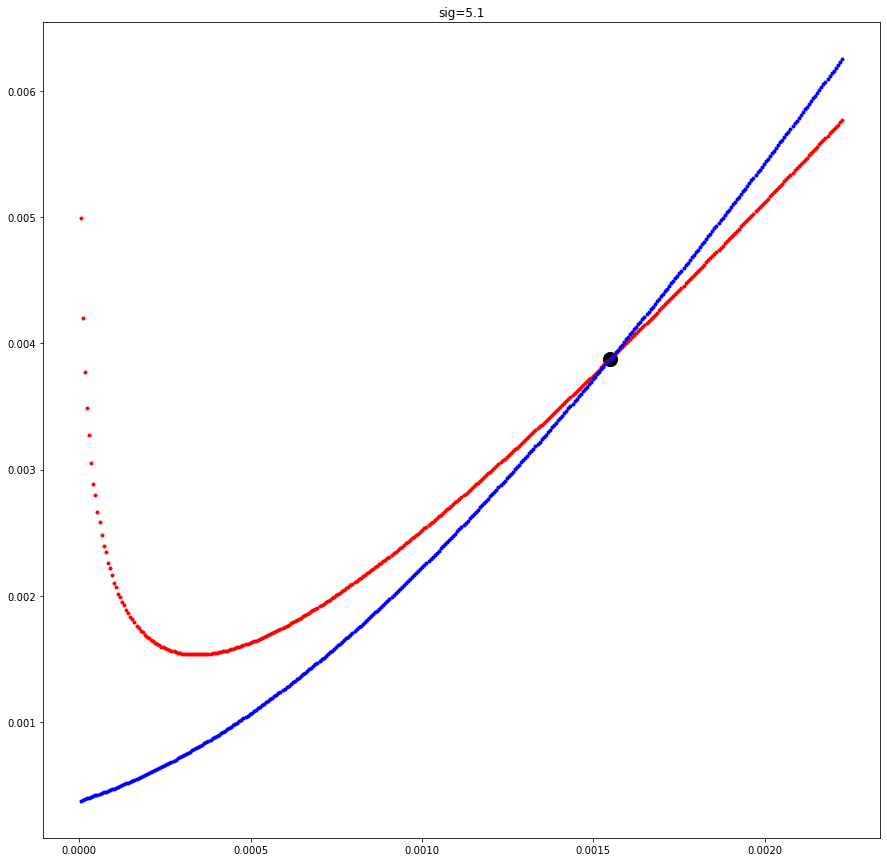

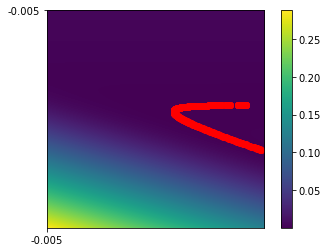

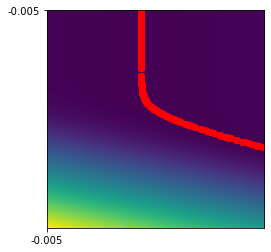

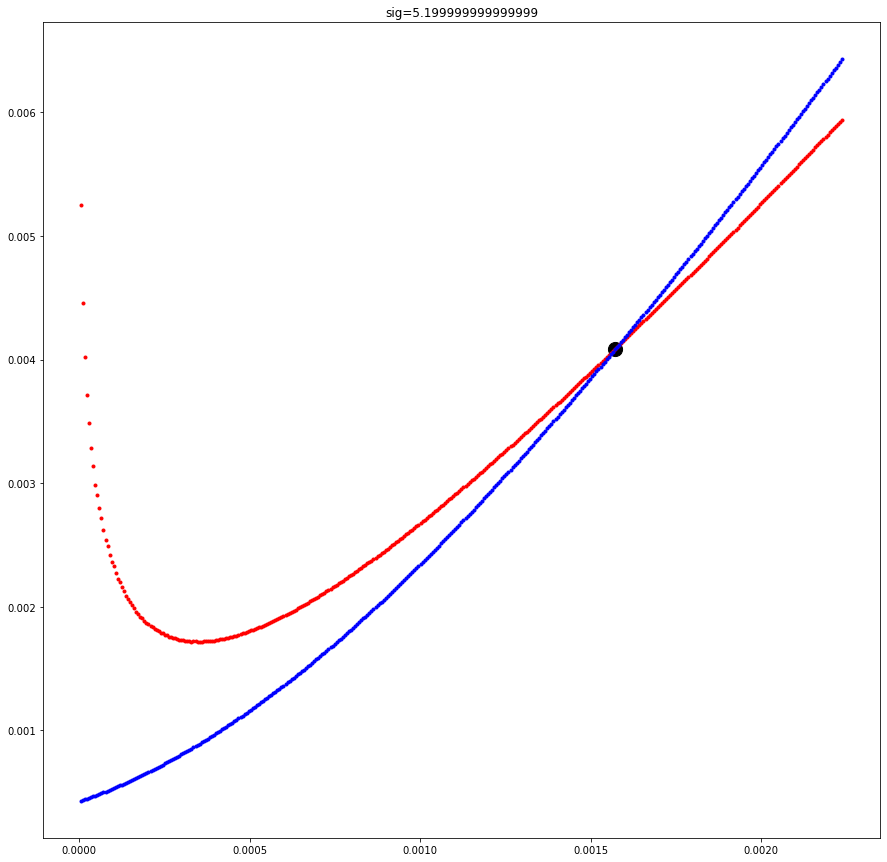

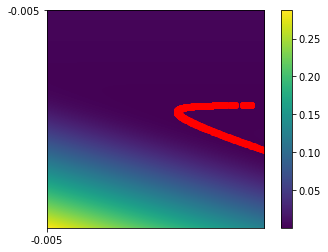

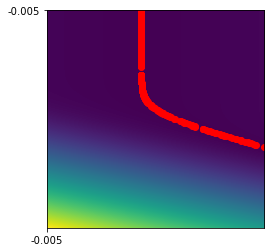

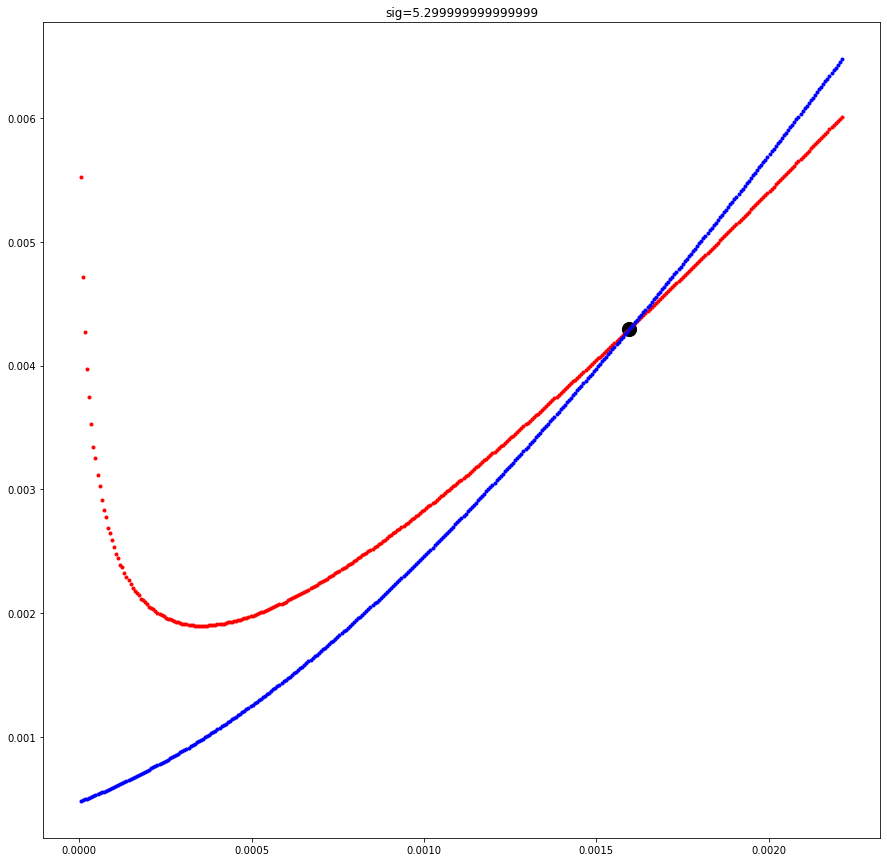

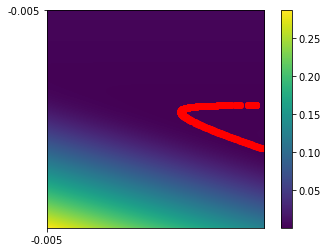

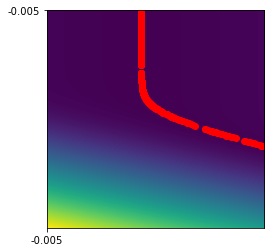

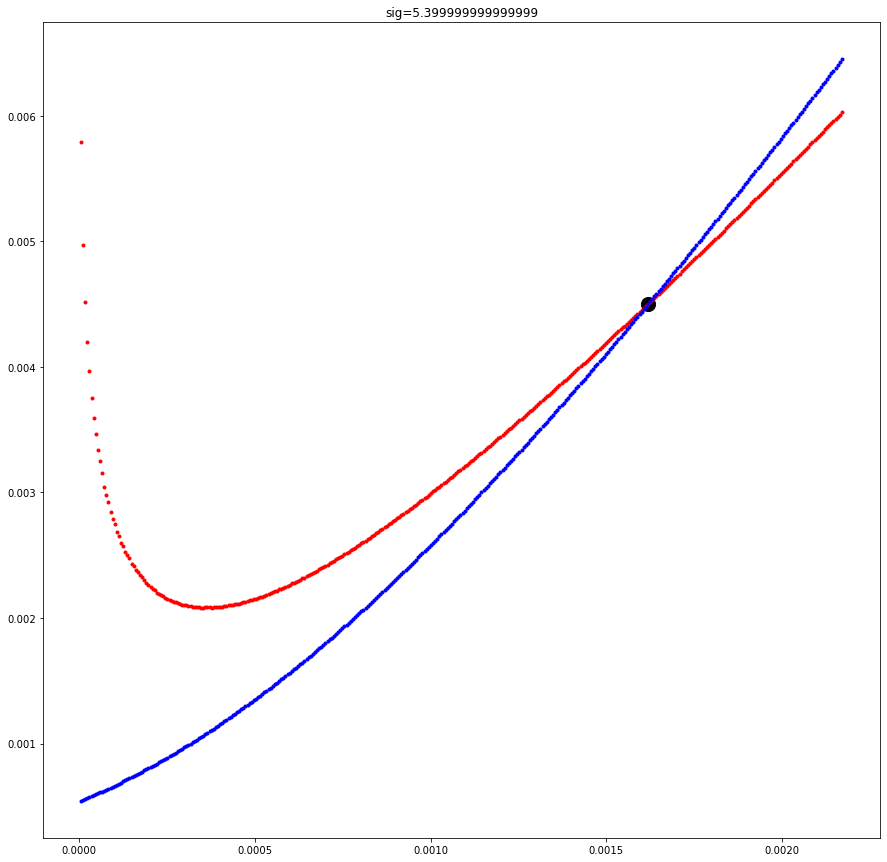

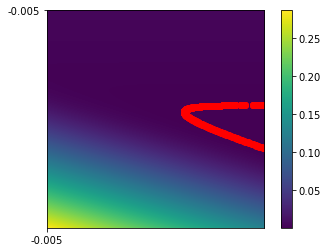

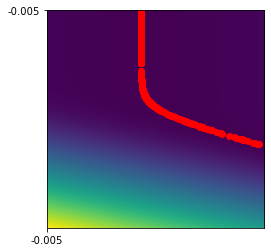

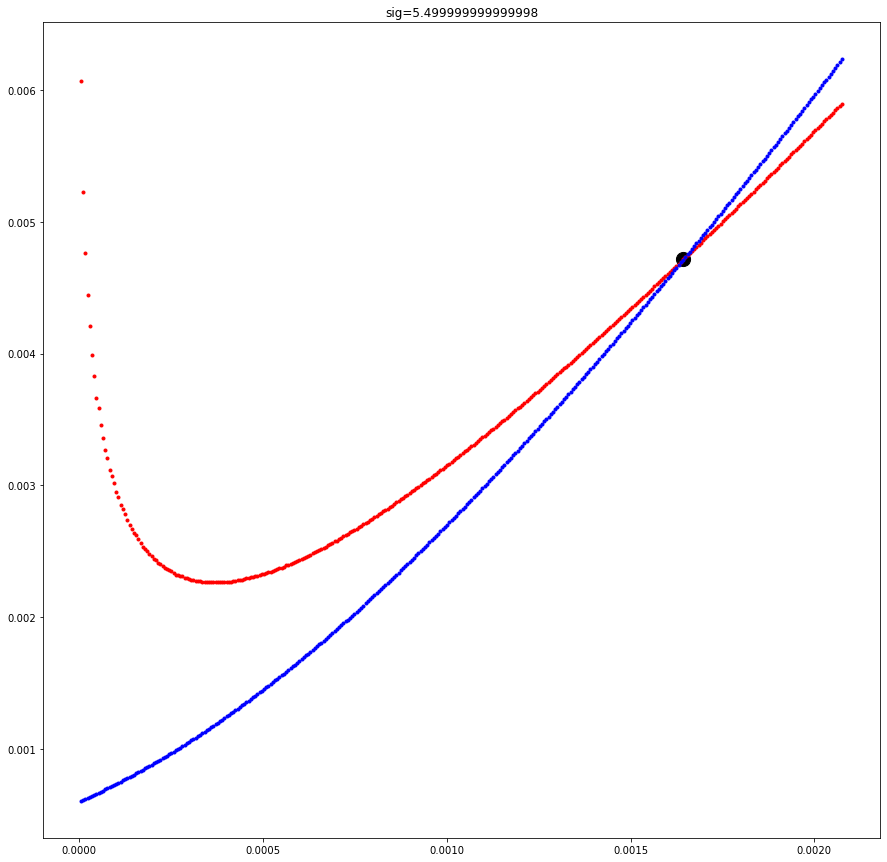

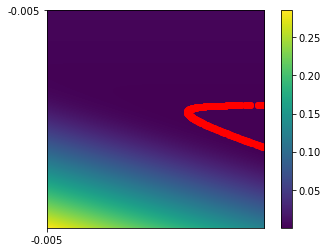

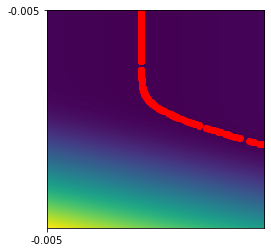

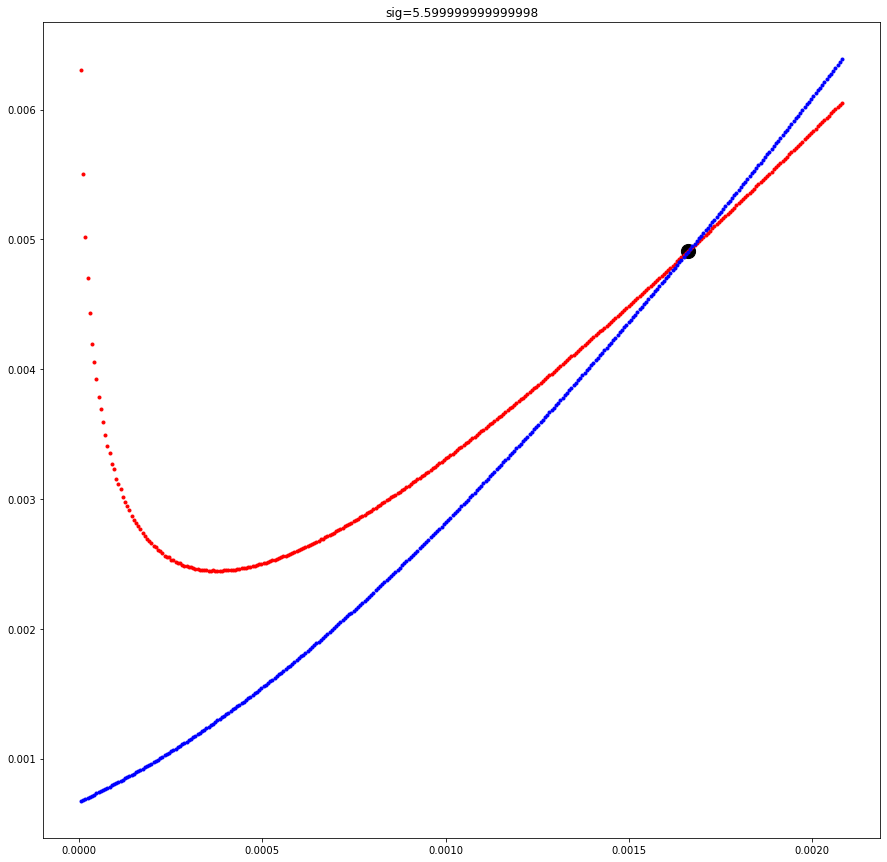

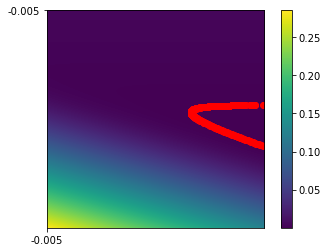

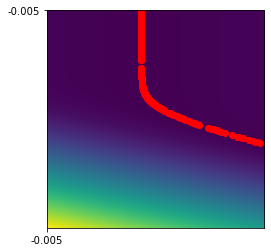

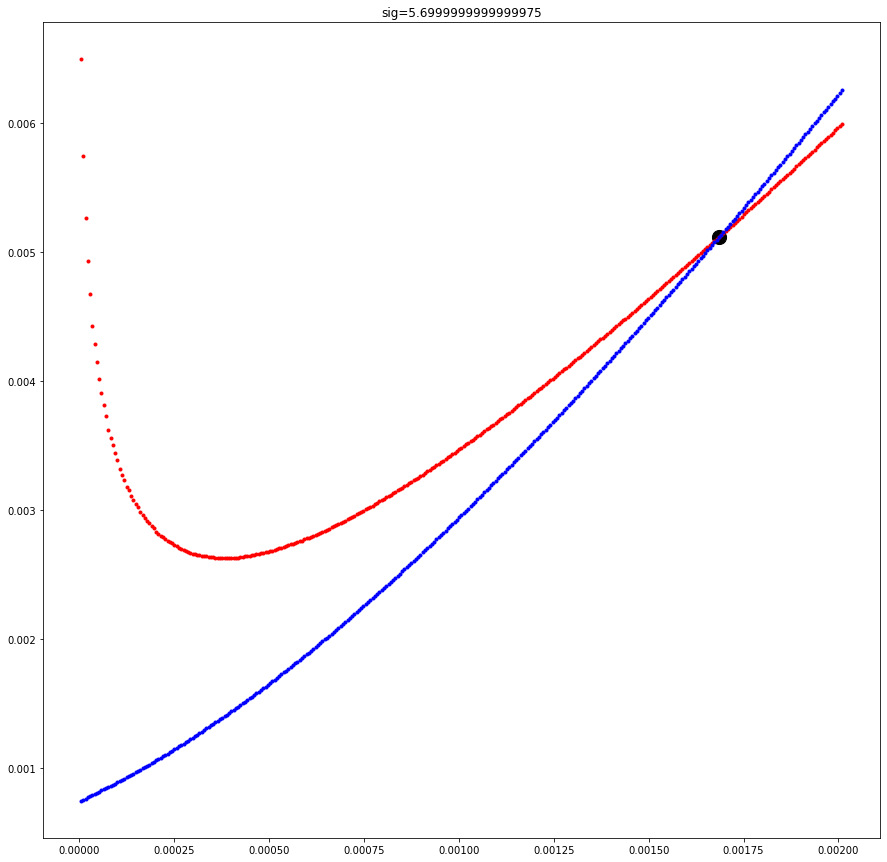

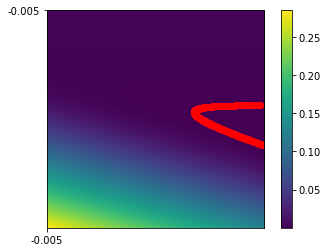

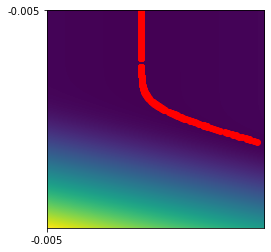

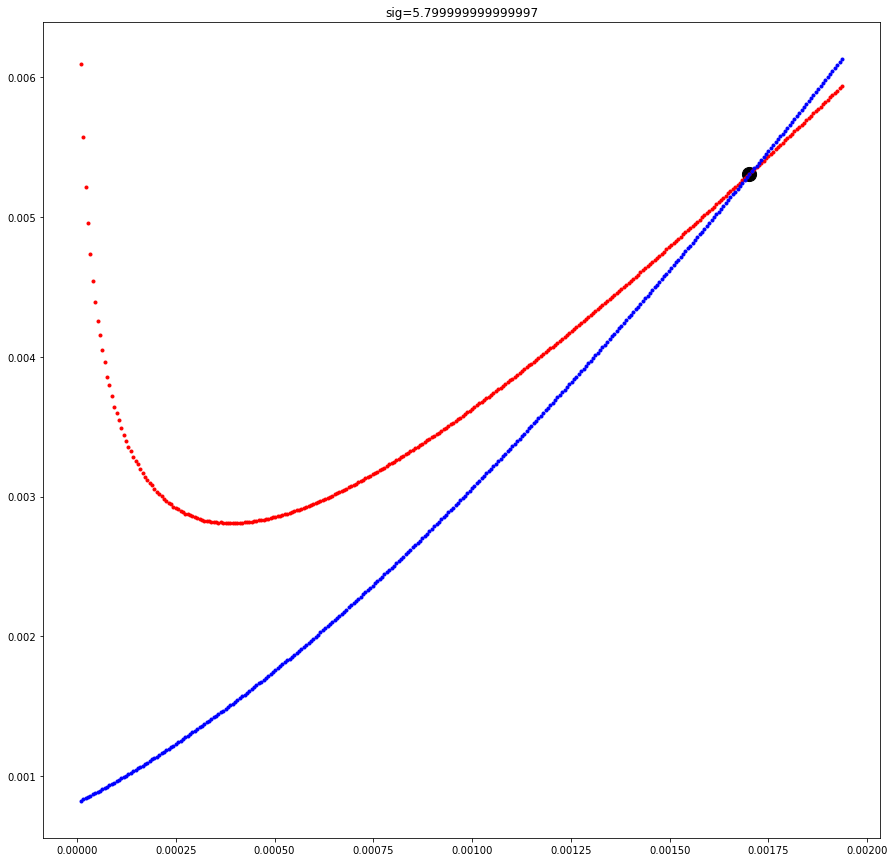

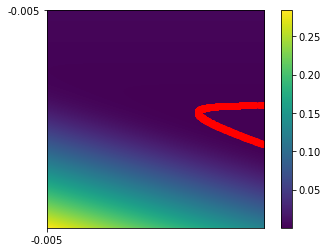

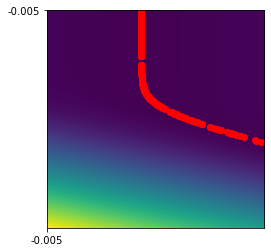

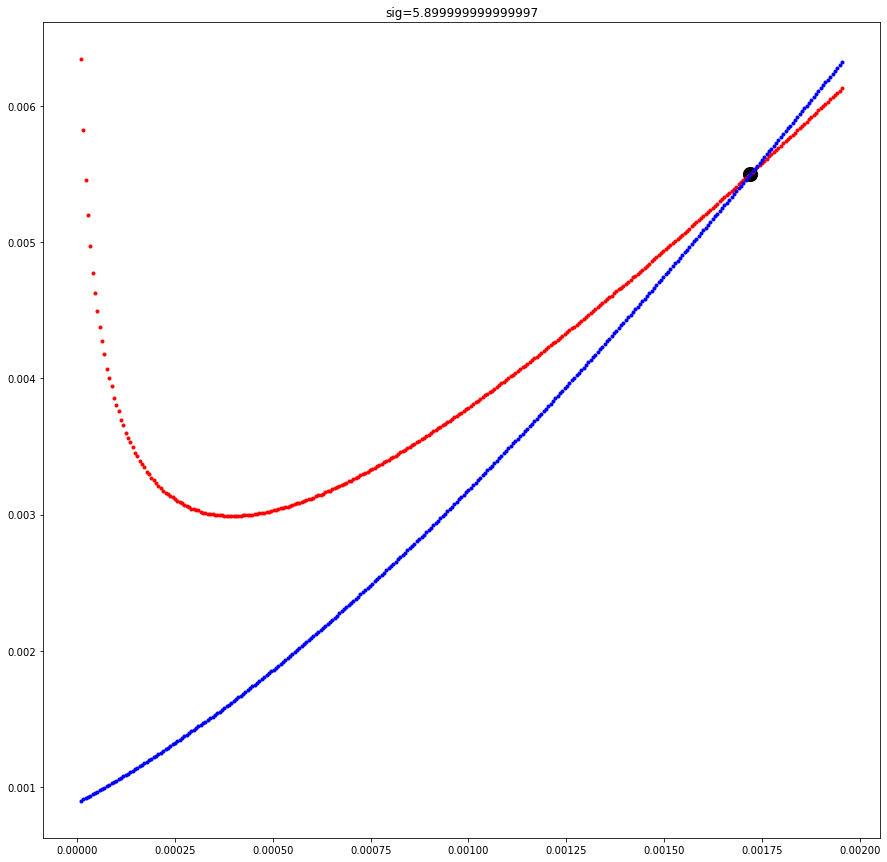

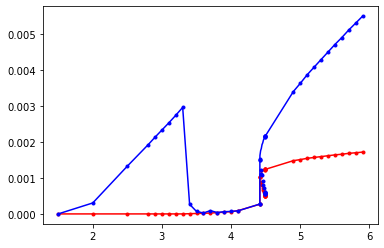

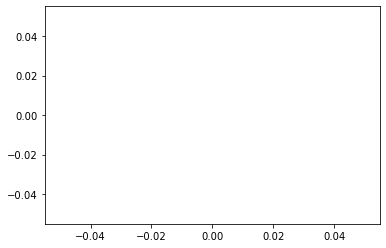

In [277]:
taue = 20; taui = 10
Ne=4000; Ni=1000;th = 20 ; taub = 1; taue=20; taui=10; Jee = 280/Ne*taue; Jei=-70/Ni*taue; Jie=500/Ne*taui; Jii=-100/Ni*taui;
Vli=6.5; Vle=7.6; Vr=14; the = th; thi = th; Nmax = 2
disp = 1; disp2=1

LE = []; LI = []; E0=[]; E02=[]; E1=[]; I0=[]; I02=[];I1=[]

Lsig = np.concatenate([np.arange(1.5,2.8,0.5),np.arange(2.8,4.15,0.1),np.arange(4.415,4.417,0.0005),np.arange(4.417,4.486,0.01),np.arange(4.486,4.4875,0.0001),np.arange(4.9,6,0.1)])
beta = 1
epsilonI = 1e-6
epsilonE = 1e-6
epsilon2 = 6e-6
delta = 5e-6#6e-6
delta2 = 6e-6#1e-8#delta
leng = 0.0065
ini = -0.005
du = 0.025
RE = np.arange(ini,leng,delta)
RI = np.arange(ini,leng,delta)
re = np.array([RE,]*math.ceil((leng-ini)/delta)).transpose()
ri = np.array([RI,]*math.ceil((leng-ini)/delta))
Ka = 600
LSe = []
for sig in Lsig:
    print(sig)
    Se=0; Si = 0
    for u in np.arange(1e-200,Nmax,du):
            #print(u)
            mue = Vle+Ne*Jee*re*taub+Ni*Jei*ri*taub - Ka*beta*re
            Se += du*np.exp(-u**2)/u*(np.exp((th-mue)*2*u/sig)-np.exp((Vr-mue)*2*u/sig))
            #LSe.append(np.min(Se))
            mui = Vli+Ne*Jie*re*taub+Ni*Jii*ri*taub 
            Si += du*np.exp(-u**2)/u*(np.exp((th-mui)*2*u/sig)-np.exp((Vr-mui)*2*u/sig))
        
    Ge = 1/(taue*Se)
    Gi = 1/(taui*Si)
    E = np.abs(re-Ge)
    I = np.abs(ri-Gi)
    idxe = np.nonzero(E<epsilonE)
    idxi = np.nonzero(I<epsilonI)

    if disp == 1:
        fig, ax = plt.subplots()
        pos = ax.imshow(E)
        ax.set_xticks([0,len(re)])
        ax.set_xticklabels([ini,leng])
        ax.set_yticks([0,len(re)])
        ax.set_yticklabels([ini,leng])
        fig.colorbar(pos,ax=ax)
        ax.scatter(idxe[1][:],idxe[0][:],color='r')

        fig, ax = plt.subplots()
        ax.imshow(I)
        ax.set_xticks([0,len(re)])
        ax.set_xticklabels([ini,leng])
        ax.set_yticks([0,len(re)])
        ax.set_yticklabels([ini,leng])
        ax.scatter(idxi[1][:],idxi[0][:],color='r')
    if disp2==1:        
        plt.figure(figsize=(15,15))
        fe = interpolate.interp1d(re[idxe], ri[idxe])
        Xre = np.arange(max(re[idxe][0],re[idxi][0]), min(re[idxe][-1],re[idxi][-1]), delta2)
        YriE = fe(Xre)
        plt.plot(Xre,YriE,'.r')
        
        fi = interpolate.interp1d(re[idxi], ri[idxi])
        YriI = fi(Xre)
        plt.plot(Xre,YriI,'.b')
        
        #L2 = np.nonzero(np.abs(YriE-YriI)<epsilon2)
        
        L = np.argwhere(np.diff(np.sign(YriE-YriI))).flatten()
        #LB = np.concatenate([L,L2[0]])
        plt.scatter(Xre[L],YriE[L],color='k',s=200)
        print(Xre[L],YriE[L])
        plt.title('sig='+str(sig))
        
        if len(Xre[L])==1:
            E02.append(Xre[L][-1])
            I02.append(YriE[L][-1])
            E1.append(Xre[L][-1])
            I1.append(YriE[L][-1])
            E0.append(Xre[L][-1])
            I0.append(YriE[L][-1])
            
        elif len(Xre[L])>=2:
            E02.append(Xre[L][-1])
            E1.append(Xre[L][int(len(Xre[L])/2)]) 
            I02.append(YriE[L][-1])
            I1.append(YriE[L][int(len(Xre[L])/2)])
            E0.append(Xre[L][0])
            I0.append(YriE[L][0])
            
        else:
            E02.append(0)
            E1.append(0)
            I02.append(0)
            I1.append(0)
            E0.append(0)
            I0.append(0)

plt.figure()
plt.plot(Lsig,E02,'r')
plt.plot(Lsig,E1,'.r')

plt.plot(Lsig,I02,'b')
plt.plot(Lsig,I1,'.b')


plt.figure()
plt.plot(LSe)


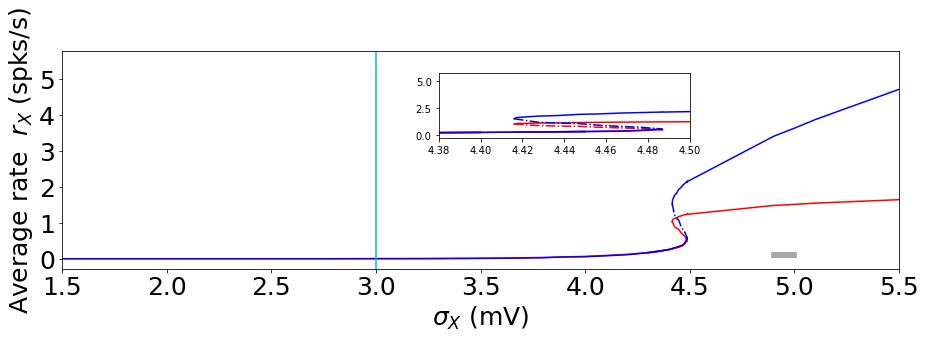

In [395]:
# figure 
fig, ax = plt.subplots(figsize=(15,4))
axin = ax.inset_axes([0.45, 0.6, 0.3, 0.3])

begg = 19; end = -17
axin.plot(Lsig[begg:end],np.array(E0[begg:end])*1000,'r')
axin.plot(Lsig[begg:],np.array(E02[begg:])*1000,'r')
axin.plot(Lsig[begg:end],np.array(E1[begg:end])*1000,'-.r')
axin.plot(Lsig[begg:],np.array(I02[begg:])*1000,'b')
axin.plot(Lsig[begg:end],np.array(I0[begg:end])*1000,'b')
axin.plot(Lsig[begg:end],np.array(I1[begg:end])*1000,'-.b')
axin.plot(Lsigb,np.array(E0b)*1000,'r')
axin.plot(LsigB,np.array(E0B)*1000,'r')
axin.plot(Lsigb,np.array(I0b)*1000,'b')
axin.plot(LsigB,np.array(I0B)*1000,'b')
axin.set_xlim(4.38,4.5)

begg = 19; end = -17; 
plt.plot(Lsig[begg:end],np.array(E0[begg:end])*1000,'r')
plt.plot(Lsig[begg:],np.array(E02[begg:])*1000,'r')
plt.plot(Lsig[begg:end],np.array(E1[begg:end])*1000,'r')
plt.plot(Lsig[begg:],np.array(I02[begg:])*1000,'b')
plt.plot(Lsig[begg:end],np.array(I0[begg:end])*1000,'b')
plt.plot(Lsig[begg:end],np.array(I1[begg:end])*1000,'-.b')

plt.plot(Lsigb,np.array(E0b)*1000,'r')
plt.plot(LsigB,np.array(E0B)*1000,'r')
plt.plot(Lsigb,np.array(I0b)*1000,'b')
plt.plot(LsigB,np.array(I0B)*1000,'b')

plt.axvline([3],color='c')
plt.plot([4.9,5],[0.1,0.1],color='darkgray',linewidth=6)#,linestyle= (0, (1, 10)))
plt.xlim(1.5,5.5)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'$\sigma_X$ (mV)', fontsize=25)
plt.ylabel('Average rate  $r_X$ (spks/s)', fontsize=25)

plt.savefig('./figures2000A/FP_woastro_2000A.pdf',bbox_inches='tight')